# NEO

## Libraries

In [14]:
import pandas as pd
import seaborn as sns
import sys
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score, f1_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier
from joblib import dump, load
import numpy as np
from imblearn.under_sampling import RandomUnderSampler
from sklearn.model_selection import train_test_split

# Append the directory
sys.path.append('/Users/patrickbustamante/Library/CloudStorage/GoogleDrive-p317694@uach.mx/My Drive/Main/GitHub/NEO/NEO/API_test')

import dataprocess2 as dp


## 5 features

#### SMOTE

In [2]:
#df = pd.read_csv('/Volumes/Maestria/GitHub/NEO/NEO/API_test/CSV/nearest-earth-objects(1910-2024).csv')
df = pd.read_csv('/Users/patrickbustamante/Library/CloudStorage/GoogleDrive-p317694@uach.mx/My Drive/Main/GitHub/NEO/NEO/API_test/CSV/nearest-earth-objects(1910-2024).csv')
df = dp.OverallProcessor(df).clean3()
df

absolute_magnitude  estimated_diameter_min  estimated_diameter_max  \
0                   19.140                0.394962                0.883161   
1                   18.500                0.530341                1.185878   
2                   21.450                0.136319                0.304818   
3                   20.630                0.198863                0.444672   
4                   22.700                0.076658                0.171412   
...                    ...                     ...                     ...   
338194              28.580                0.005112                0.011430   
338195              28.690                0.004859                0.010865   
338196              21.919                0.109839                0.245607   
338197              23.887                0.044377                0.099229   
338198              22.951                0.068290                0.152700   

        relative_velocity  miss_distance  is_hazardous  
0            71745.401048   5.814362e+07         False  
1           109949.757148   5.580105e+07          True  
2            24865.506798   6.720689e+07         False  
3            78890.076805   3.039644e+07         False  
4            56036.519484   6.311863e+07         False  
...                   ...            ...           ...  
338194       56646.985988   6.406548e+07         False  
338195       21130.768947   2.948883e+07         False  
338196       11832.041031   5.346078e+07         False  
338197       56198.382733   5.184742e+06         False  
338198       42060.357830   7.126682e+06         False  

[338171 rows x 6 columns]

In [3]:
#Count is hazardoues 
a = df['is_hazardous'].value_counts()
a

is_hazardous
False    295009
True      43162
Name: count, dtype: int64

In [3]:
# 5 feature Columns
#df = dp.OverallProcessor(df).smote()
spt = dp.scalesplit(df)

X_train, X_test, y_train, y_test = spt.ttsplitsmote()

X_train.shape

(471842, 5)

In [32]:
samplesize = 0.3


X_train, _, y_train, _, = train_test_split(X_train, y_train, train_size= samplesize, stratify=y_train, random_state=42)

print(len(X_train), len(y_train))

141552 141552


##### Models

c:\Users\LIR3060\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py:528: FitFailedWarning: 
1800 fits failed out of a total of 2880.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
160 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\LIR3060\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\LIR3060\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py", line 1382, in wrapper
    estimator._validate_params()
  File "c:\Users\LIR3060\AppData\Local\Programs\Python\Python312\Lib\site-packages\sk

Best parameters: {'C': 0.001, 'fit_intercept': True, 'n_jobs': 8, 'penalty': 'l1', 'random_state': 42, 'solver': 'liblinear', 'warm_start': True}
Best Score: 0.8063821084180539
Best Estimator: LogisticRegression(C=0.001, n_jobs=8, penalty='l1', random_state=42,
                   solver='liblinear', warm_start=True) 
The accuracy score is 0.7276410142677607
 The recall score is 0.30536939209966096
 The f1 score is 0.456815970276885
 The ROC AUC score is 0.8040418051587831

Classification Report: 
               precision    recall  f1-score   support

           0       0.98      0.70      0.82     59088
           1       0.31      0.91      0.46      8547

    accuracy                           0.73     67635
   macro avg       0.64      0.80      0.64     67635
weighted avg       0.90      0.73      0.77     67635


Cross validation score: [0.22887821 0.23057361 0.22825856 0.22006358 0.21808548 0.21158601
 0.21921582 0.231367   0.19123984 0.23277993]

Mean cross validation score: 0.

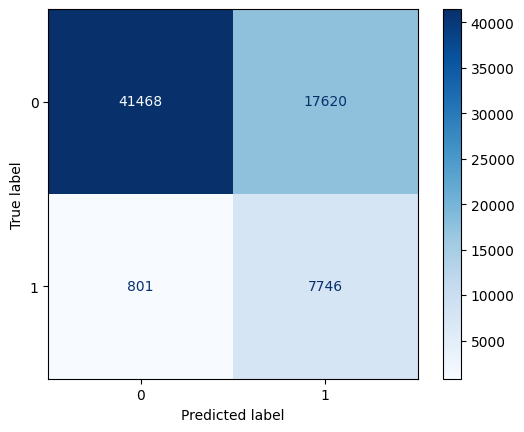

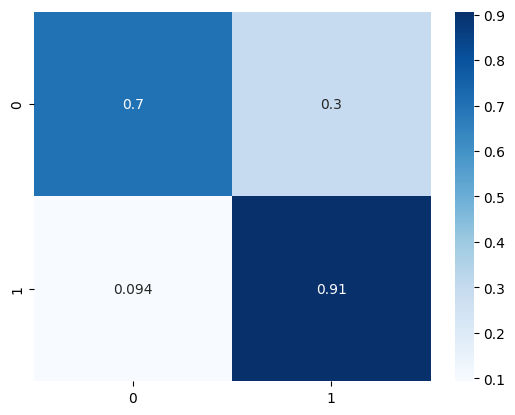

In [33]:
log_reg = dp.LogRegression(X_train, X_test, y_train, y_test)

log_reg.fit()

Fitting 5 folds for each of 270 candidates, totalling 1350 fits
Best parameters: {'alpha': 0.01, 'eta0': 0.1, 'learning_rate': 'constant', 'loss': 'log_loss', 'penalty': 'l1'}
Best Score: 0.8157002644630357
Best Estimator: SGDClassifier(alpha=0.01, eta0=0.1, learning_rate='constant', loss='log_loss',
              penalty='l1', random_state=42) 
The accuracy score is 0.7364086641531752
 The recall score is 0.3065249114029602
 The f1 score is 0.45198573712037377
 The ROC AUC score is 0.7893447317442037

Classification Report: 
               precision    recall  f1-score   support

           0       0.97      0.72      0.83     59088
           1       0.31      0.86      0.45      8547

    accuracy                           0.74     67635
   macro avg       0.64      0.79      0.64     67635
weighted avg       0.89      0.74      0.78     67635


Cross validation score: [ 0.05651314  0.26250353  0.21243377 -0.05206641  0.07792299  0.30653479
  0.19237018  0.2788414   0.14122218  0.19

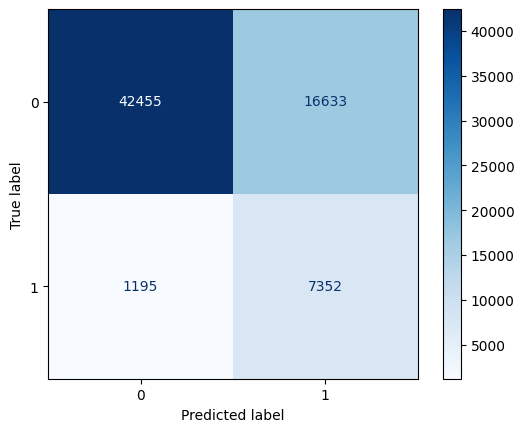

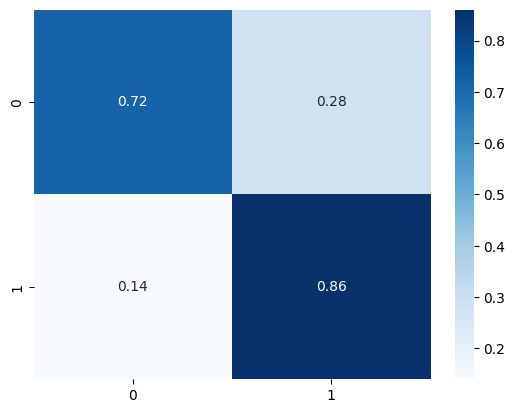

In [34]:
svm = dp.supportvm(X_train, X_test, y_train, y_test)

svm.fit()

Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters: {'bootstrap': True, 'criterion': 'entropy', 'max_features': 'sqrt'}
Best Score: 0.9199304882299583
Best Estimator: RandomForestClassifier(criterion='entropy', random_state=42) 
The accuracy score is 0.8776373179566792
 The recall score is 0.5108373990242342
 The f1 score is 0.6068408551068883
 The ROC AUC score is 0.8218865565534941

Classification Report: 
               precision    recall  f1-score   support

           0       0.96      0.90      0.93     59088
           1       0.51      0.75      0.61      8547

    accuracy                           0.88     67635
   macro avg       0.74      0.82      0.77     67635
weighted avg       0.90      0.88      0.89     67635


Cross validation score: [0.70076293 0.69228596 0.68972095 0.67785235 0.68435182 0.69113387
 0.68209113 0.69480749 0.68548216 0.68548216]

Mean cross validation score: 0.6883970807054665



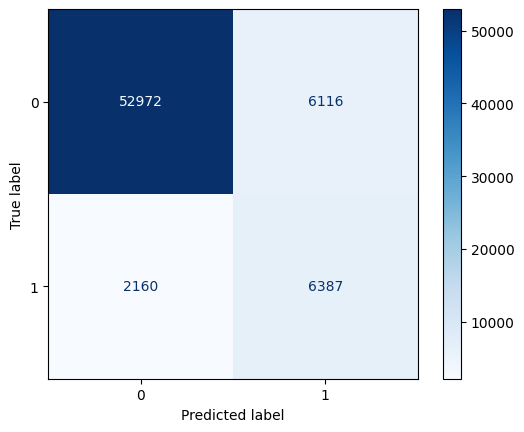

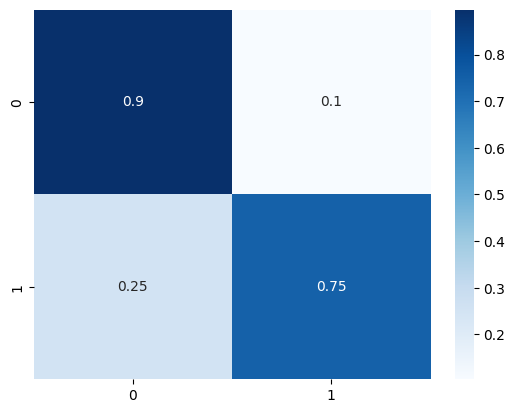

In [35]:
random_forest = dp.RandomForest(X_train, X_test, y_train, y_test)

random_forest.fit()

Fitting 5 folds for each of 243 candidates, totalling 1215 fits
Best parameters: {'gamma': 0, 'learning_rate': 0.2, 'max_depth': 7, 'min_child_weight': 1, 'n_estimators': 300}
Best Score: 0.8694048806264366
Best Estimator: XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.2, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=7, max_leaves=None,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=300, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...) 
The accuracy score is 0.7942485

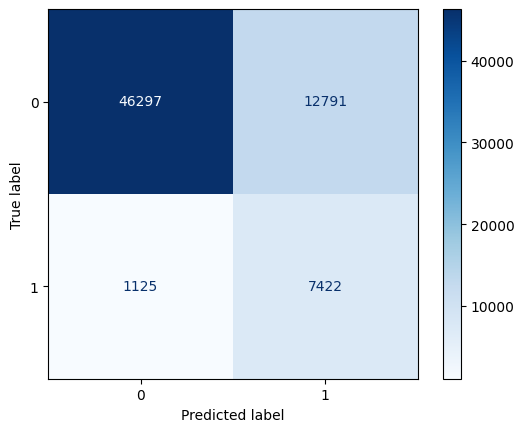

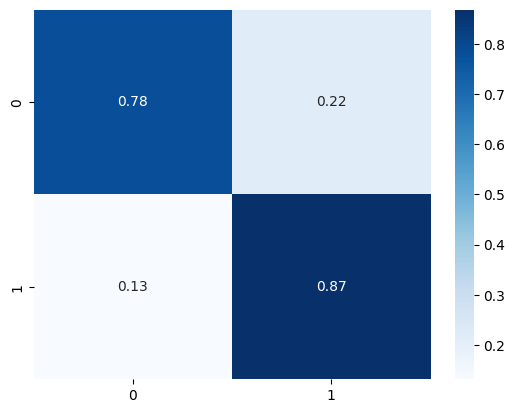

In [36]:
xgboost = dp.xgbClassifier(X_train, X_test, y_train, y_test)

xgboost.fit()

Fitting 5 folds for each of 81 candidates, totalling 405 fits
Best parameters: {'learning_rate': 0.2, 'max_depth': 7, 'max_features': 'sqrt', 'n_estimators': 300}
Best Score: 0.905879119470334
Best Estimator: GradientBoostingClassifier(learning_rate=0.2, max_depth=7, max_features='sqrt',
                           n_estimators=300, random_state=42) 
The accuracy score is 0.8533008057958158
 The recall score is 0.45508590840791796
 The f1 score is 0.5840529890165171
 The ROC AUC score is 0.836930240438567

Classification Report: 
               precision    recall  f1-score   support

           0       0.97      0.86      0.91     59088
           1       0.46      0.82      0.58      8547

    accuracy                           0.85     67635
   macro avg       0.71      0.84      0.75     67635
weighted avg       0.90      0.85      0.87     67635


Cross validation score: [0.63294716 0.61684092 0.63405157 0.62896503 0.61709643 0.62303073
 0.63094313 0.63009537 0.61879194 0.62670434]

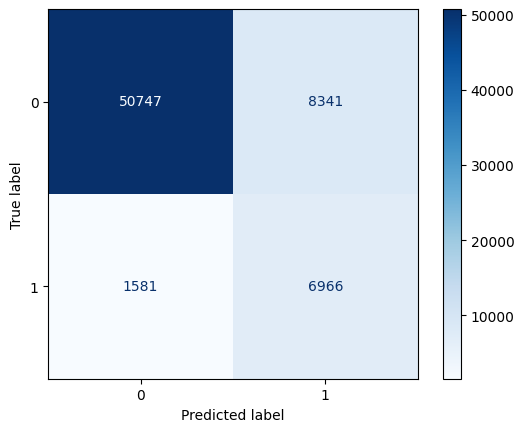

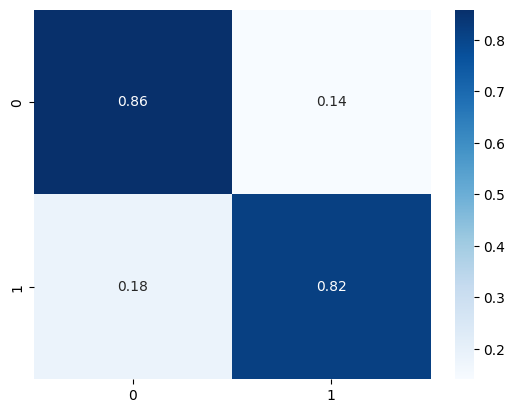

In [37]:
gb = dp.GradientBoost(X_train, X_test, y_train, y_test)

gb.fit()

Fitting 5 folds for each of 24 candidates, totalling 120 fits


c:\Users\LIR3060\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py:528: FitFailedWarning: 
60 fits failed out of a total of 120.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
60 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\LIR3060\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\LIR3060\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py", line 1382, in wrapper
    estimator._validate_params()
  File "c:\Users\LIR3060\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklear

Best parameters: {'algorithm': 'SAMME', 'learning_rate': 0.01, 'n_estimators': 50}
Best Score: 0.9199587395592635
Best Estimator: AdaBoostClassifier(algorithm='SAMME',
                   estimator=RandomForestClassifier(class_weight='balanced_subsample',
                                                    criterion='entropy',
                                                    random_state=42),
                   learning_rate=0.01, random_state=42) 


c:\Users\LIR3060\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The parameter 'algorithm' is deprecated in 1.6 and has no effect. It will be removed in version 1.8.
  warnings.warn(


The accuracy score is 0.8784948621275966
 The recall score is 0.5131505316172356
 The f1 score is 0.6097074468085106
 The ROC AUC score is 0.8239785692567984

Classification Report: 
               precision    recall  f1-score   support

           0       0.96      0.90      0.93     59088
           1       0.51      0.75      0.61      8547

    accuracy                           0.88     67635
   macro avg       0.74      0.82      0.77     67635
weighted avg       0.90      0.88      0.89     67635




c:\Users\LIR3060\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The parameter 'algorithm' is deprecated in 1.6 and has no effect. It will be removed in version 1.8.
  warnings.warn(
c:\Users\LIR3060\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The parameter 'algorithm' is deprecated in 1.6 and has no effect. It will be removed in version 1.8.
  warnings.warn(
c:\Users\LIR3060\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The parameter 'algorithm' is deprecated in 1.6 and has no effect. It will be removed in version 1.8.
  warnings.warn(
c:\Users\LIR3060\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The parameter 'algorithm' is deprecated in 1.6 and has no effect. It will be removed in version 1.8.
  warnings.warn(


Cross validation score: [0.69228596 0.69228596 0.6925468  0.67615683 0.67304839 0.6866125
 0.68209113 0.6925468  0.6945249  0.6846344 ]

Mean cross validation score: 0.6866733680693098



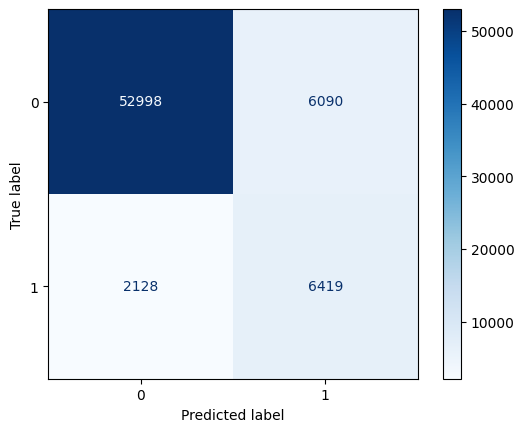

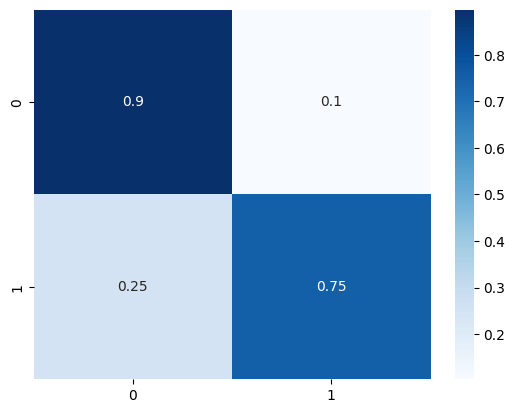

In [38]:
ada = dp.AdaBoost(X_train, X_test, y_train, y_test)

ada.fit()

Fitting 5 folds for each of 81 candidates, totalling 405 fits


c:\Users\LIR3060\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py:528: FitFailedWarning: 
204 fits failed out of a total of 405.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
204 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\LIR3060\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\LIR3060\AppData\Local\Programs\Python\Python312\Lib\site-packages\ngboost\ngboost.py", line 254, in fit
    return self.partial_fit(
           ^^^^^^^^^^^^^^^^^
  File "c:\Users\LIR3060\AppData\Local\Programs\Python\Python312

[iter 0] loss=0.6931 val_loss=0.0000 scale=4.0000 norm=8.0000
Best parameters: {'learning_rate': 0.01, 'max_depth': 5, 'minibatch_frac': 1.0, 'n_estimators': 100}
Best Score: 0.3573461431059405
Best Estimator: NGBClassifier(n_estimators=100,
              random_state=RandomState(MT19937) at 0x13327C74740) 


c:\Users\LIR3060\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[iter 0] loss=0.6931 val_loss=0.0000 scale=4.0000 norm=8.0000


c:\Users\LIR3060\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\LIR3060\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


The accuracy score is 0.7253640866415317
 The recall score is 0.31361980521894284
 The f1 score is 0.4760077858331688
 The ROC AUC score is 0.8373149935649935

Classification Report: 
               precision    recall  f1-score   support

           0       1.00      0.69      0.81     59088
           1       0.31      0.99      0.48      8547

    accuracy                           0.73     67635
   macro avg       0.66      0.84      0.64     67635
weighted avg       0.91      0.73      0.77     67635




c:\Users\LIR3060\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[iter 0] loss=0.6931 val_loss=0.0000 scale=4.0000 norm=8.0000


c:\Users\LIR3060\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\LIR3060\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\LIR3060\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[iter 0] loss=0.6931 val_loss=0.0000 scale=4.0000 norm=8.0000


c:\Users\LIR3060\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\LIR3060\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\LIR3060\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[iter 0] loss=0.6931 val_loss=0.0000 scale=4.0000 norm=8.0000


c:\Users\LIR3060\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\LIR3060\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\LIR3060\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[iter 0] loss=0.6931 val_loss=0.0000 scale=4.0000 norm=8.0000


c:\Users\LIR3060\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\LIR3060\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\LIR3060\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[iter 0] loss=0.6931 val_loss=0.0000 scale=4.0000 norm=8.0000


c:\Users\LIR3060\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\LIR3060\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\LIR3060\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[iter 0] loss=0.6931 val_loss=0.0000 scale=4.0000 norm=8.0000


c:\Users\LIR3060\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\LIR3060\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\LIR3060\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[iter 0] loss=0.6931 val_loss=0.0000 scale=4.0000 norm=8.0000


c:\Users\LIR3060\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\LIR3060\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\LIR3060\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[iter 0] loss=0.6931 val_loss=0.0000 scale=4.0000 norm=8.0000


c:\Users\LIR3060\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\LIR3060\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\LIR3060\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[iter 0] loss=0.6931 val_loss=0.0000 scale=4.0000 norm=8.0000


c:\Users\LIR3060\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\LIR3060\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\LIR3060\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[iter 0] loss=0.6931 val_loss=0.0000 scale=4.0000 norm=8.0000
Cross validation score: [0.37072619 0.36111896 0.35457435 0.34892264 0.34694454 0.36503002
 0.36135641 0.35683504 0.34864005 0.36389968]

Mean cross validation score: 0.35780478834863094



c:\Users\LIR3060\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\LIR3060\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


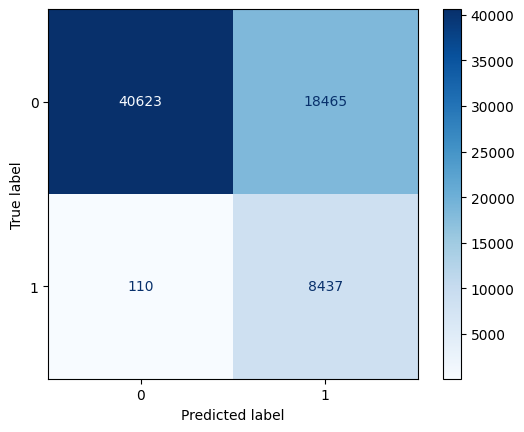

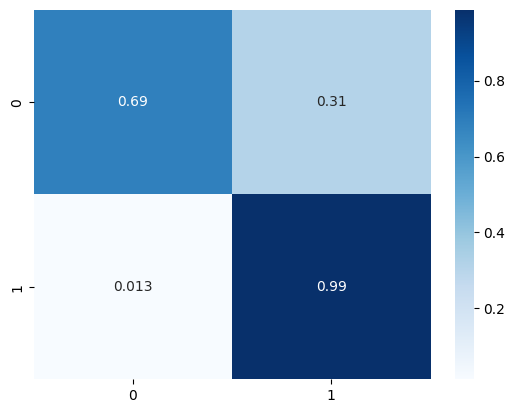

In [39]:
ngb = dp.ngboost(X_train, X_test, y_train, y_test)

ngb.fit()

The accuracy score is 0.7303762844681009
 The recall score is 0.3170298749858368
 The f1 score is 0.4793284604842394
 The ROC AUC score is 0.8380319578786273

Classification Report: 
               precision    recall  f1-score   support

           0       1.00      0.69      0.82     59088
           1       0.32      0.98      0.48      8547

    accuracy                           0.73     67635
   macro avg       0.66      0.84      0.65     67635
weighted avg       0.91      0.73      0.78     67635


Cross validation score: [0.37100876 0.36253179 0.35598728 0.35118332 0.34807488 0.36842105
 0.36163899 0.36079124 0.34553161 0.36503002]

Mean cross validation score: 0.3590198947092419



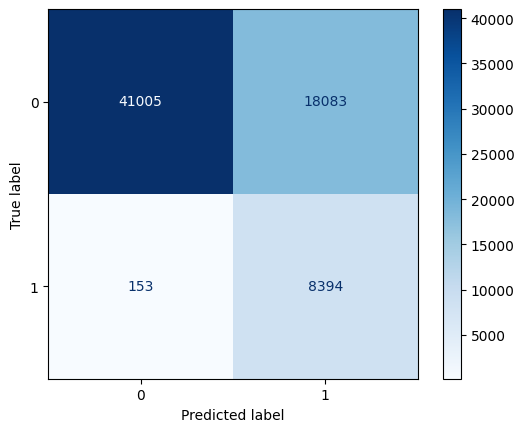

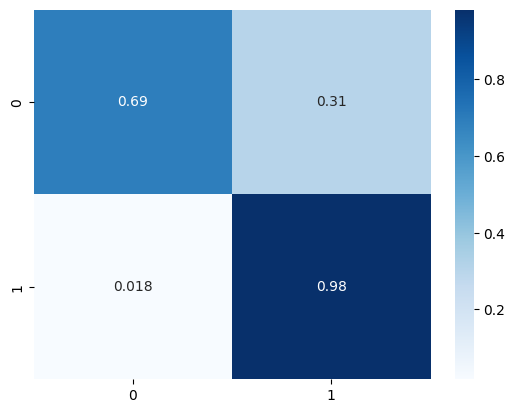

In [40]:
mlp = dp.ANN(X_train, X_test, y_train, y_test)

mlp.fit()

#### ADASYN

In [41]:
df = pd.read_csv('C:\\Users\\LIR3060\\Desktop\\Patricio\\NEO\\NEO\\API_test\\CSV\\nearest-earth-objects(1910-2024).csv')
df = dp.OverallProcessor(df).clean3()
df

absolute_magnitude  estimated_diameter_min  estimated_diameter_max  \
0                   19.140                0.394962                0.883161   
1                   18.500                0.530341                1.185878   
2                   21.450                0.136319                0.304818   
3                   20.630                0.198863                0.444672   
4                   22.700                0.076658                0.171412   
...                    ...                     ...                     ...   
338194              28.580                0.005112                0.011430   
338195              28.690                0.004859                0.010865   
338196              21.919                0.109839                0.245607   
338197              23.887                0.044377                0.099229   
338198              22.951                0.068290                0.152700   

        relative_velocity  miss_distance  is_hazardous  
0            71745.401048   5.814362e+07         False  
1           109949.757148   5.580105e+07          True  
2            24865.506798   6.720689e+07         False  
3            78890.076805   3.039644e+07         False  
4            56036.519484   6.311863e+07         False  
...                   ...            ...           ...  
338194       56646.985988   6.406548e+07         False  
338195       21130.768947   2.948883e+07         False  
338196       11832.041031   5.346078e+07         False  
338197       56198.382733   5.184742e+06         False  
338198       42060.357830   7.126682e+06         False  

[338171 rows x 6 columns]

In [42]:
# 5 feature Columns
#df = dp.OverallProcessor(df).smote()
spt = dp.scalesplit(df)

X_train, X_test, y_train, y_test = spt.ttsplitadasyn()

X_train

array([[-1.45404797,  1.00029444,  1.00029444,  2.94828885,  0.99407991],
       [-0.0623231 , -0.25558438, -0.25558438, -0.46849131, -1.16590105],
       [ 1.35001992, -0.45106847, -0.45106847, -0.82729836,  0.3156564 ],
       ...,
       [-0.52015275, -0.06039604, -0.06039604, -1.09064189,  1.23799834],
       [-0.51666325, -0.06239603, -0.06239603, -1.07397814,  1.26728867],
       [-0.52359604, -0.05852162, -0.05852162, -1.03655663,  1.22766022]])

In [43]:
samplesize = 0.3


X_train, _, y_train, _, = train_test_split(X_train, y_train, train_size= samplesize, stratify=y_train, random_state=42)

print(len(X_train), len(y_train))

139816 139816


##### Models

c:\Users\LIR3060\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py:528: FitFailedWarning: 
1800 fits failed out of a total of 2880.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
150 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\LIR3060\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\LIR3060\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py", line 1382, in wrapper
    estimator._validate_params()
  File "c:\Users\LIR3060\AppData\Local\Programs\Python\Python312\Lib\site-packages\sk

Best parameters: {'C': 0.001, 'fit_intercept': True, 'n_jobs': 8, 'penalty': 'l1', 'random_state': 0, 'solver': 'liblinear', 'warm_start': True}
Best Score: 0.8050151685258449
Best Estimator: LogisticRegression(C=0.001, n_jobs=8, penalty='l1', random_state=0,
                   solver='liblinear', warm_start=True) 
The accuracy score is 0.7275818732904561
 The recall score is 0.3077012926335462
 The f1 score is 0.46174520171774125
 The ROC AUC score is 0.8118639395802272

Classification Report: 
               precision    recall  f1-score   support

           0       0.98      0.70      0.82     59088
           1       0.31      0.92      0.46      8547

    accuracy                           0.73     67635
   macro avg       0.65      0.81      0.64     67635
weighted avg       0.90      0.73      0.77     67635


Cross validation score: [0.18997611 0.21286623 0.22745867 0.24233725 0.22831705 0.21114947
 0.21252516 0.23885063 0.21023599 0.21052214]

Mean cross validation score: 0.2

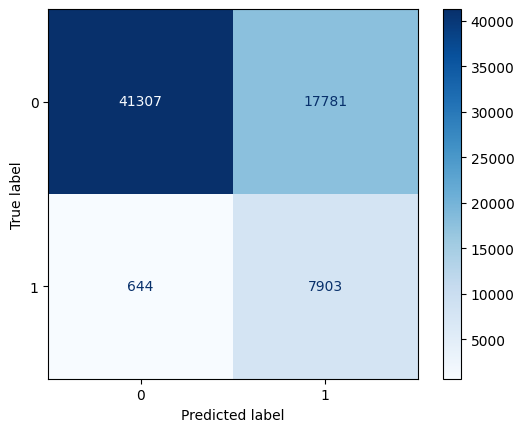

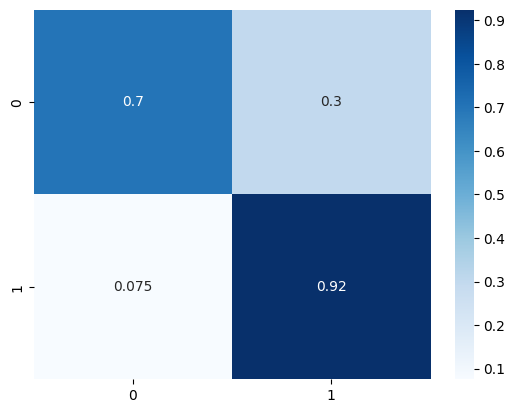

In [44]:
log_reg = dp.LogRegression(X_train, X_test, y_train, y_test)

log_reg.fit()

In [45]:
# svm = dp.supportvm(X_train, X_test, y_train, y_test)

# svm.fit()

Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters: {'bootstrap': False, 'criterion': 'entropy', 'max_features': 'sqrt'}
Best Score: 0.9157750090640496
Best Estimator: RandomForestClassifier(bootstrap=False, criterion='entropy', random_state=42) 
The accuracy score is 0.8818067568566571
 The recall score is 0.5237115170225538
 The f1 score is 0.6044140934283452
 The ROC AUC score is 0.8102621589116309

Classification Report: 
               precision    recall  f1-score   support

           0       0.96      0.91      0.93     59088
           1       0.52      0.71      0.60      8547

    accuracy                           0.88     67635
   macro avg       0.74      0.81      0.77     67635
weighted avg       0.90      0.88      0.89     67635


Cross validation score: [0.6663766  0.67696327 0.67896616 0.67553264 0.67868003 0.66351533
 0.67808532 0.69382337 0.66463644 0.6840944 ]

Mean cross validation score: 0.6760673573250386



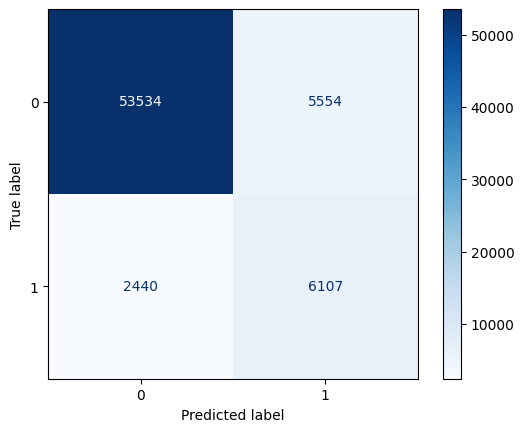

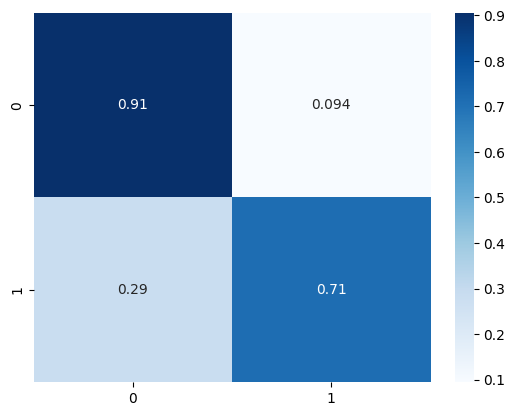

In [46]:
random_forest = dp.RandomForest(X_train, X_test, y_train, y_test)

random_forest.fit()

Fitting 5 folds for each of 243 candidates, totalling 1215 fits
Best parameters: {'gamma': 0, 'learning_rate': 0.2, 'max_depth': 7, 'min_child_weight': 1, 'n_estimators': 300}
Best Score: 0.863313205176264
Best Estimator: XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.2, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=7, max_leaves=None,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=300, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...) 
The accuracy score is 0.78494862

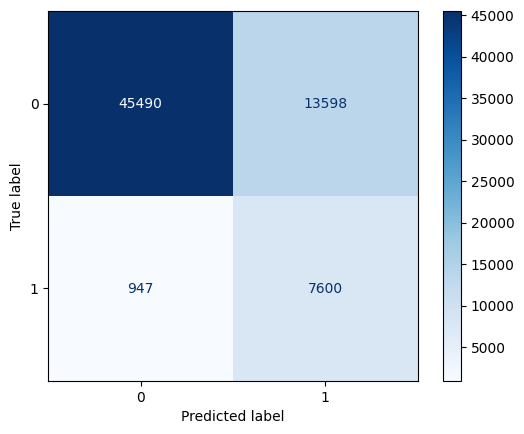

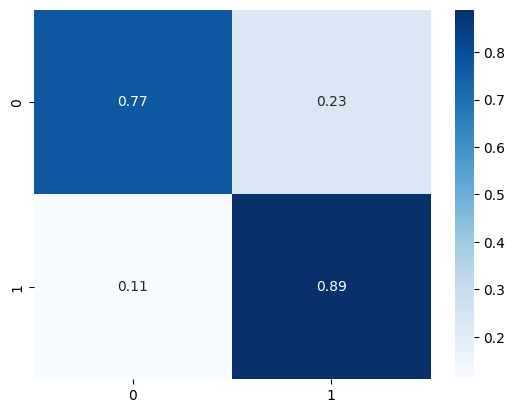

In [47]:
xgboost = dp.xgbClassifier(X_train, X_test, y_train, y_test)

xgboost.fit()

Fitting 5 folds for each of 81 candidates, totalling 405 fits
Best parameters: {'learning_rate': 0.2, 'max_depth': 7, 'max_features': 'sqrt', 'n_estimators': 300}
Best Score: 0.9018209725028832
Best Estimator: GradientBoostingClassifier(learning_rate=0.2, max_depth=7, max_features='sqrt',
                           n_estimators=300, random_state=42) 
The accuracy score is 0.8460116803430177
 The recall score is 0.4411245587493696
 The f1 score is 0.5733480807832535
 The ROC AUC score is 0.8343597159092692

Classification Report: 
               precision    recall  f1-score   support

           0       0.97      0.85      0.91     59088
           1       0.44      0.82      0.57      8547

    accuracy                           0.85     67635
   macro avg       0.71      0.83      0.74     67635
weighted avg       0.90      0.85      0.86     67635


Cross validation score: [0.61344321 0.60943744 0.61172645 0.6263189  0.622027   0.60085365
 0.61942531 0.63144346 0.60425956 0.60483185

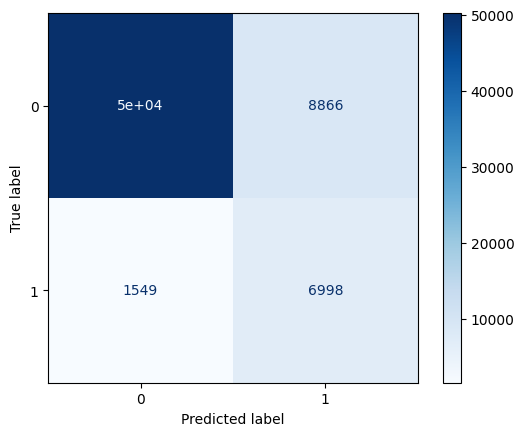

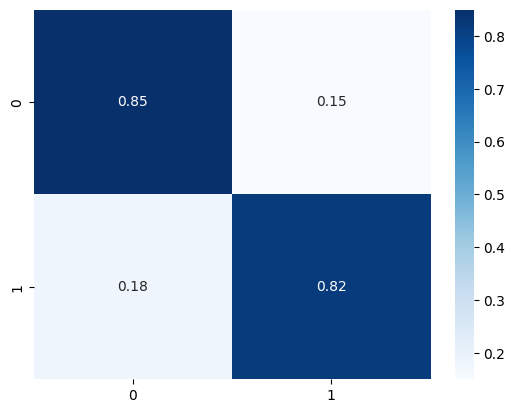

In [48]:
gb = dp.GradientBoost(X_train, X_test, y_train, y_test)

gb.fit()

Fitting 5 folds for each of 24 candidates, totalling 120 fits


c:\Users\LIR3060\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py:528: FitFailedWarning: 
60 fits failed out of a total of 120.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
60 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\LIR3060\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\LIR3060\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py", line 1382, in wrapper
    estimator._validate_params()
  File "c:\Users\LIR3060\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklear

Best parameters: {'algorithm': 'SAMME', 'learning_rate': 1.0, 'n_estimators': 50}
Best Score: 0.9162756849756095
Best Estimator: AdaBoostClassifier(algorithm='SAMME',
                   estimator=RandomForestClassifier(class_weight='balanced_subsample',
                                                    criterion='entropy',
                                                    random_state=42),
                   random_state=42) 


c:\Users\LIR3060\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The parameter 'algorithm' is deprecated in 1.6 and has no effect. It will be removed in version 1.8.
  warnings.warn(


The accuracy score is 0.8743254232276189
 The recall score is 0.5018100593083262
 The f1 score is 0.6052020436600093
 The ROC AUC score is 0.8263959558638682

Classification Report: 
               precision    recall  f1-score   support

           0       0.96      0.89      0.93     59088
           1       0.50      0.76      0.61      8547

    accuracy                           0.87     67635
   macro avg       0.73      0.83      0.77     67635
weighted avg       0.90      0.87      0.88     67635




c:\Users\LIR3060\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The parameter 'algorithm' is deprecated in 1.6 and has no effect. It will be removed in version 1.8.
  warnings.warn(
c:\Users\LIR3060\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The parameter 'algorithm' is deprecated in 1.6 and has no effect. It will be removed in version 1.8.
  warnings.warn(
c:\Users\LIR3060\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The parameter 'algorithm' is deprecated in 1.6 and has no effect. It will be removed in version 1.8.
  warnings.warn(
c:\Users\LIR3060\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The parameter 'algorithm' is deprecated in 1.6 and has no effect. It will be removed in version 1.8.
  warnings.warn(


Cross validation score: [0.6761049  0.68411644 0.67696327 0.68840833 0.6826858  0.66065407
 0.68237752 0.68924503 0.67064552 0.67465156]

Mean cross validation score: 0.6785852438437041



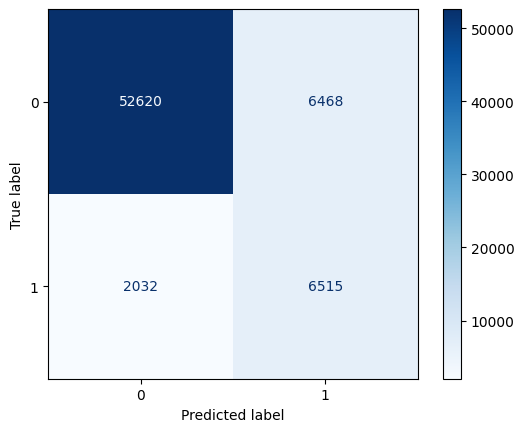

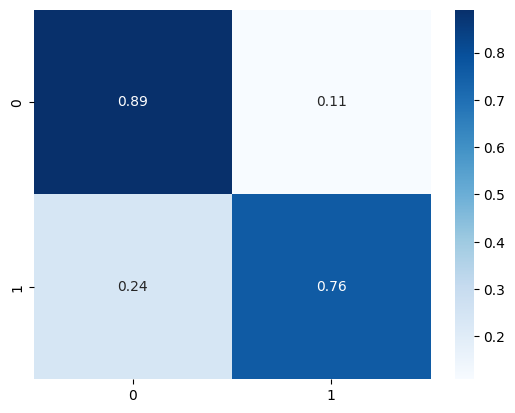

In [49]:
ada = dp.AdaBoost(X_train, X_test, y_train, y_test)

ada.fit()

# dump(ada, '/Volumes/Maestria/GitHub/NEO/NEO/Exports/API/best_model_5.sav' )

Fitting 5 folds for each of 81 candidates, totalling 405 fits


c:\Users\LIR3060\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py:528: FitFailedWarning: 
160 fits failed out of a total of 405.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
160 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\LIR3060\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\LIR3060\AppData\Local\Programs\Python\Python312\Lib\site-packages\ngboost\ngboost.py", line 254, in fit
    return self.partial_fit(
           ^^^^^^^^^^^^^^^^^
  File "c:\Users\LIR3060\AppData\Local\Programs\Python\Python312

[iter 0] loss=0.6930 val_loss=0.0000 scale=4.0000 norm=7.9998
Best parameters: {'learning_rate': 0.01, 'max_depth': 5, 'minibatch_frac': 0.7, 'n_estimators': 100}
Best Score: 0.37395257345261507
Best Estimator: NGBClassifier(minibatch_frac=0.7, n_estimators=100,
              random_state=RandomState(MT19937) at 0x13327514640) 


c:\Users\LIR3060\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[iter 0] loss=0.6931 val_loss=0.0000 scale=4.0000 norm=8.0001


c:\Users\LIR3060\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\LIR3060\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


The accuracy score is 0.7250831669993346
 The recall score is 0.31328749303103515
 The f1 score is 0.47551619090601377
 The ROC AUC score is 0.836753911591442

Classification Report: 
               precision    recall  f1-score   support

           0       1.00      0.69      0.81     59088
           1       0.31      0.99      0.48      8547

    accuracy                           0.73     67635
   macro avg       0.66      0.84      0.64     67635
weighted avg       0.91      0.73      0.77     67635




c:\Users\LIR3060\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[iter 0] loss=0.6931 val_loss=0.0000 scale=4.0000 norm=8.0002


c:\Users\LIR3060\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\LIR3060\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\LIR3060\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[iter 0] loss=0.6931 val_loss=0.0000 scale=4.0000 norm=8.0002


c:\Users\LIR3060\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\LIR3060\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\LIR3060\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[iter 0] loss=0.6930 val_loss=0.0000 scale=4.0000 norm=7.9998


c:\Users\LIR3060\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\LIR3060\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\LIR3060\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[iter 0] loss=0.6931 val_loss=0.0000 scale=4.0000 norm=7.9998


c:\Users\LIR3060\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\LIR3060\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\LIR3060\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[iter 0] loss=0.6931 val_loss=0.0000 scale=4.0000 norm=7.9999


c:\Users\LIR3060\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\LIR3060\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\LIR3060\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[iter 0] loss=0.6931 val_loss=0.0000 scale=4.0000 norm=8.0003


c:\Users\LIR3060\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\LIR3060\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\LIR3060\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[iter 0] loss=0.6931 val_loss=0.0000 scale=4.0000 norm=8.0001


c:\Users\LIR3060\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\LIR3060\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\LIR3060\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[iter 0] loss=0.6931 val_loss=0.0000 scale=4.0000 norm=8.0001


c:\Users\LIR3060\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\LIR3060\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\LIR3060\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[iter 0] loss=0.6930 val_loss=0.0000 scale=4.0000 norm=7.9996


c:\Users\LIR3060\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\LIR3060\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\LIR3060\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[iter 0] loss=0.6931 val_loss=0.0000 scale=4.0000 norm=8.0003
Cross validation score: [0.32159426 0.32760292 0.36222422 0.35850457 0.34963465 0.32531391
 0.32927288 0.35388147 0.33642654 0.34243562]

Mean cross validation score: 0.3406891049682813



c:\Users\LIR3060\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\LIR3060\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


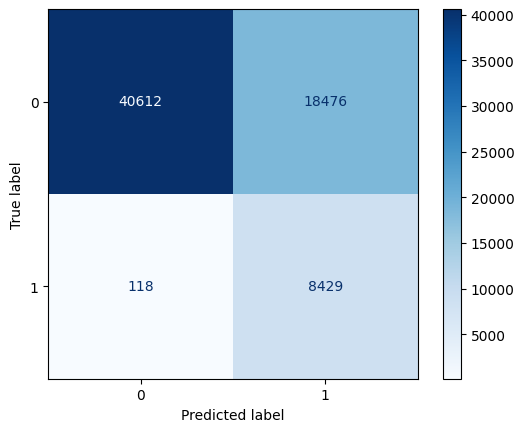

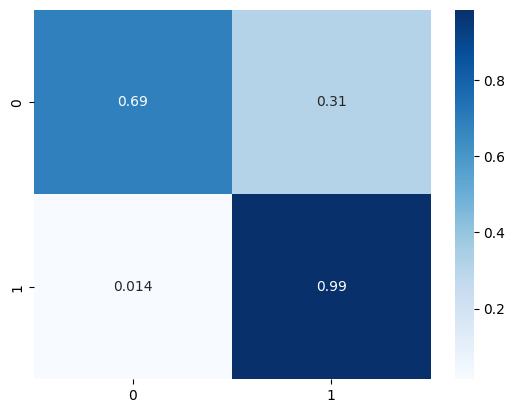

In [50]:
ngb = dp.ngboost(X_train, X_test, y_train, y_test)

ngb.fit()

The accuracy score is 0.7284689879500259
 The recall score is 0.31581119615788683
 The f1 score is 0.47825222307451914
 The ROC AUC score is 0.8380912420565142

Classification Report: 
               precision    recall  f1-score   support

           0       1.00      0.69      0.82     59088
           1       0.32      0.98      0.48      8547

    accuracy                           0.73     67635
   macro avg       0.66      0.84      0.65     67635
weighted avg       0.91      0.73      0.77     67635


Cross validation score: [0.32388328 0.32445553 0.36508548 0.36651611 0.35421268 0.32674454
 0.32984518 0.35760137 0.33327893 0.34844469]

Mean cross validation score: 0.3430067788568235



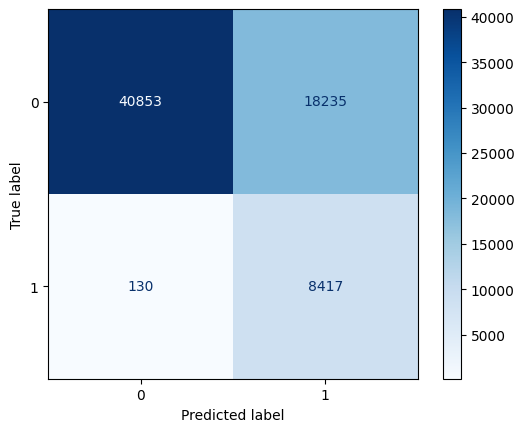

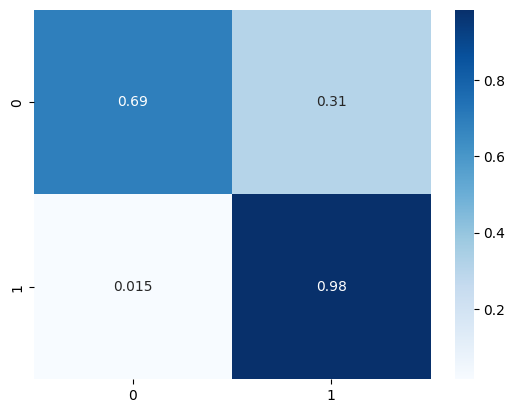

In [51]:
mlp = dp.ANN(X_train, X_test, y_train, y_test)

mlp.fit()

#### Random Under Sample

In [5]:
df = pd.read_csv('/Users/patrickbustamante/Library/CloudStorage/GoogleDrive-p317694@uach.mx/My Drive/Main/GitHub/NEO/NEO/API_test/CSV/nearest-earth-objects(1910-2024).csv')
df = dp.OverallProcessor(df).clean3()
df

absolute_magnitude  estimated_diameter_min  estimated_diameter_max  \
0                   19.140                0.394962                0.883161   
1                   18.500                0.530341                1.185878   
2                   21.450                0.136319                0.304818   
3                   20.630                0.198863                0.444672   
4                   22.700                0.076658                0.171412   
...                    ...                     ...                     ...   
338194              28.580                0.005112                0.011430   
338195              28.690                0.004859                0.010865   
338196              21.919                0.109839                0.245607   
338197              23.887                0.044377                0.099229   
338198              22.951                0.068290                0.152700   

        relative_velocity  miss_distance  is_hazardous  
0            71745.401048   5.814362e+07         False  
1           109949.757148   5.580105e+07          True  
2            24865.506798   6.720689e+07         False  
3            78890.076805   3.039644e+07         False  
4            56036.519484   6.311863e+07         False  
...                   ...            ...           ...  
338194       56646.985988   6.406548e+07         False  
338195       21130.768947   2.948883e+07         False  
338196       11832.041031   5.346078e+07         False  
338197       56198.382733   5.184742e+06         False  
338198       42060.357830   7.126682e+06         False  

[338171 rows x 6 columns]

In [8]:
#Count the hazardous
a = df['is_hazardous'].value_counts()
a

is_hazardous
False    295009
True      43162
Name: count, dtype: int64

In [27]:
# 5 feature Columns
#df = dp.OverallProcessor(df).smote()
spt = dp.scalesplit(df)

X_train, X_test, y_train, y_test = spt.ttsplitrus()

X_train.shape

(69230, 5)

In [28]:
samplesize = 0.3


X_train, _, y_train, _, = train_test_split(X_train, y_train, train_size= samplesize, stratify=y_train, random_state=42)

print(len(X_train), len(y_train))

20769 20769


##### Models

In [23]:
print(len(X_test), len(y_test))

67635 67635


In [24]:
rus = RandomUnderSampler(random_state=42)
X_test, y_test = rus.fit_resample(X_test, y_test)

print(len(X_test), len(y_test))

17094 17094


/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1216: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 8.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1216: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 8.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1216: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 8.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1216: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 8.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1216: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. 

Best parameters: {'C': 0.01, 'fit_intercept': True, 'n_jobs': 8, 'penalty': 'l1', 'random_state': 0, 'solver': 'liblinear', 'warm_start': True}
Best Score: 0.8029756378002177
Best Estimator: LogisticRegression(C=0.01, n_jobs=8, penalty='l1', random_state=0,
                   solver='liblinear', warm_start=True) 
The accuracy score is 0.7290012567457678
 The recall score is 0.30609736758642564
 The f1 score is 0.45725622575582603
 The ROC AUC score is 0.8035693524371429

Classification Report: 
               precision    recall  f1-score   support

           0       0.98      0.70      0.82     59088
           1       0.31      0.90      0.46      8547

    accuracy                           0.73     67635
   macro avg       0.64      0.80      0.64     67635
weighted avg       0.90      0.73      0.77     67635


Cross validation score: [0.20847358 0.18921503 0.17958575 0.16610477 0.25661995 0.20462187
 0.22388042 0.24891653 0.18343746 0.23699422]

Mean cross validation score: 0.20

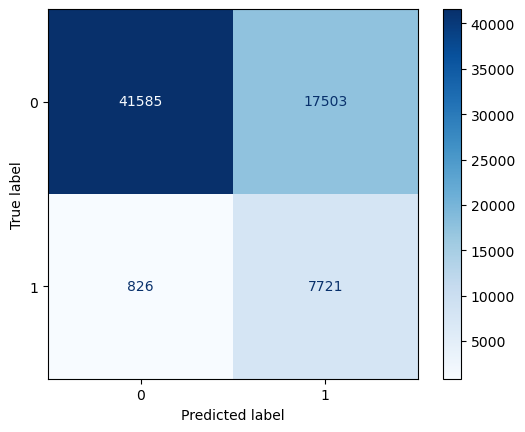

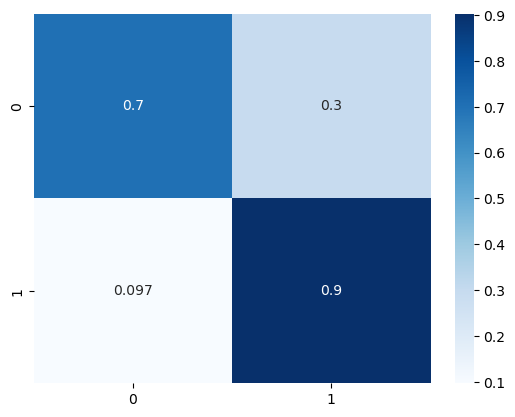

In [29]:
log_reg = dp.LogRegression(X_train, X_test, y_train, y_test)

log_reg.fit()

In [56]:
# svm = dp.supportvm(X_train, X_test, y_train, y_test)

# svm.fit()

Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters: {'bootstrap': True, 'criterion': 'gini', 'max_features': 'sqrt'}
Best Score: 0.8454425286243644
Best Estimator: RandomForestClassifier(random_state=42) 
The accuracy score is 0.7904043764323205
 The recall score is 0.36806825106642294
 The f1 score is 0.5255689424364123
 The ROC AUC score is 0.8452668433121315

Classification Report: 
               precision    recall  f1-score   support

           0       0.98      0.77      0.87     59088
           1       0.37      0.92      0.53      8547

    accuracy                           0.79     67635
   macro avg       0.68      0.85      0.70     67635
weighted avg       0.91      0.79      0.82     67635


Cross validation score: [0.39142981 0.35483856 0.37217126 0.33365415 0.41839178 0.39335566
 0.36254198 0.44920546 0.33365415 0.4238921 ]

Mean cross validation score: 0.38331349062849446



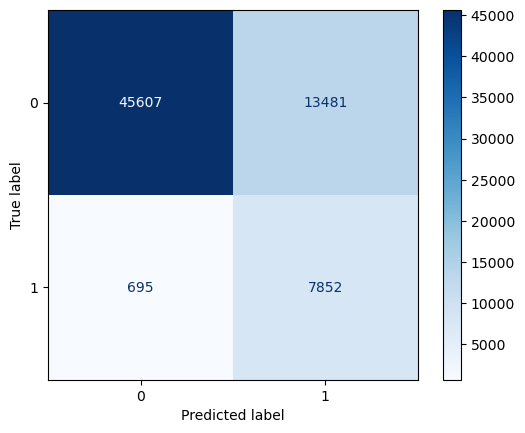

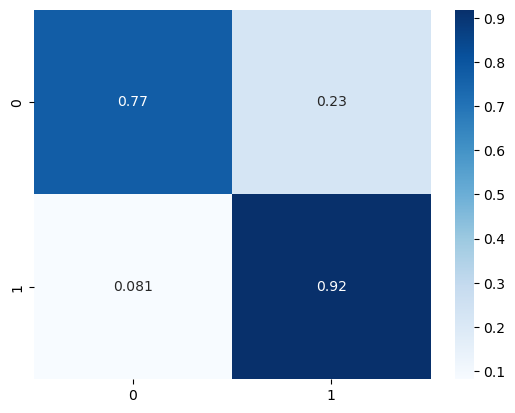

In [30]:
random_forest = dp.RandomForest(X_train, X_test, y_train, y_test)

random_forest.fit()

Fitting 5 folds for each of 243 candidates, totalling 1215 fits
Best parameters: {'gamma': 0.2, 'learning_rate': 0.01, 'max_depth': 5, 'min_child_weight': 1, 'n_estimators': 300}
Best Score: 0.8390390041203226
Best Estimator: XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0.2, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.01, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=300, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...) 
The accuracy score is 0.7

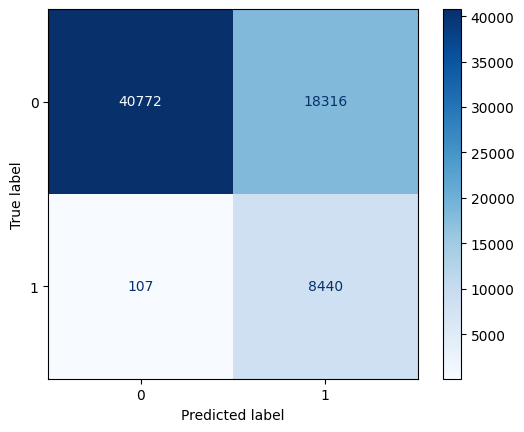

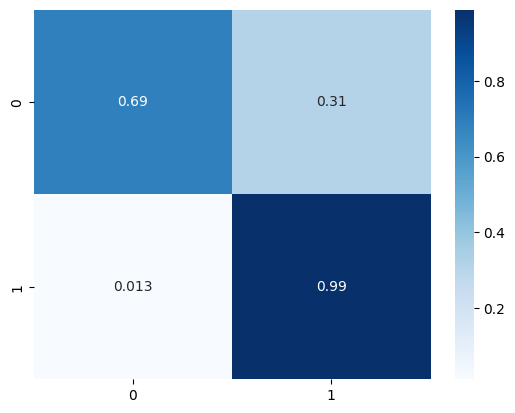

In [58]:
xgboost = dp.xgbClassifier(X_train, X_test, y_train, y_test)

xgboost.fit()

Fitting 5 folds for each of 81 candidates, totalling 405 fits
Best parameters: {'learning_rate': 0.1, 'max_depth': 7, 'max_features': 'sqrt', 'n_estimators': 300}
Best Score: 0.8471278021085858
Best Estimator: GradientBoostingClassifier(max_depth=7, max_features='sqrt', n_estimators=300,
                           random_state=42) 
The accuracy score is 0.7732091372809936
 The recall score is 0.3532665053577601
 The f1 score is 0.5159824555867597
 The ROC AUC score is 0.8516379351066597

Classification Report: 
               precision    recall  f1-score   support

           0       0.99      0.75      0.85     59088
           1       0.35      0.96      0.52      8547

    accuracy                           0.77     67635
   macro avg       0.67      0.85      0.68     67635
weighted avg       0.91      0.77      0.81     67635


Cross validation score: [0.38180053 0.37217126 0.34328343 0.34520928 0.43187276 0.41839178
 0.35676442 0.4087625  0.37217126 0.45086705]

Mean cross valid

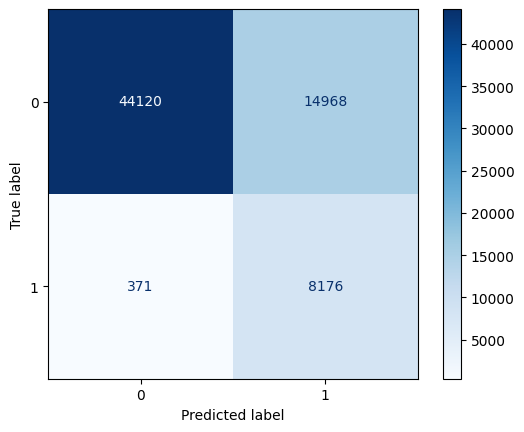

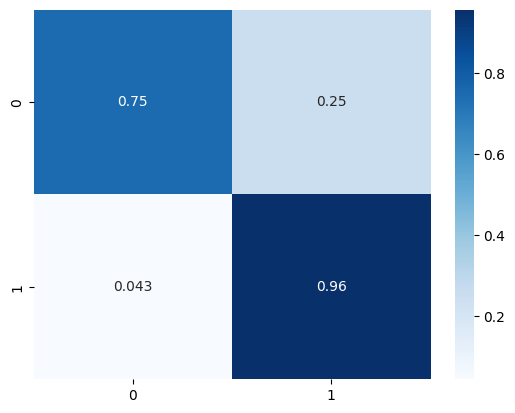

In [59]:
gb = dp.GradientBoost(X_train, X_test, y_train, y_test)

gb.fit()

Fitting 5 folds for each of 24 candidates, totalling 120 fits


c:\Users\LIR3060\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py:528: FitFailedWarning: 
60 fits failed out of a total of 120.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
60 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\LIR3060\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\LIR3060\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py", line 1382, in wrapper
    estimator._validate_params()
  File "c:\Users\LIR3060\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklear

Best parameters: {'algorithm': 'SAMME', 'learning_rate': 0.5, 'n_estimators': 50}
Best Score: 0.8458277691028788
Best Estimator: AdaBoostClassifier(algorithm='SAMME',
                   estimator=RandomForestClassifier(class_weight='balanced_subsample',
                                                    criterion='entropy',
                                                    random_state=42),
                   learning_rate=0.5, random_state=42) 


c:\Users\LIR3060\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The parameter 'algorithm' is deprecated in 1.6 and has no effect. It will be removed in version 1.8.
  warnings.warn(


The accuracy score is 0.786619353884823
 The recall score is 0.36416932096200894
 The f1 score is 0.522277391592188
 The ROC AUC score is 0.8449519926469562

Classification Report: 
               precision    recall  f1-score   support

           0       0.99      0.77      0.86     59088
           1       0.36      0.92      0.52      8547

    accuracy                           0.79     67635
   macro avg       0.67      0.84      0.69     67635
weighted avg       0.91      0.79      0.82     67635




c:\Users\LIR3060\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The parameter 'algorithm' is deprecated in 1.6 and has no effect. It will be removed in version 1.8.
  warnings.warn(
c:\Users\LIR3060\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The parameter 'algorithm' is deprecated in 1.6 and has no effect. It will be removed in version 1.8.
  warnings.warn(
c:\Users\LIR3060\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The parameter 'algorithm' is deprecated in 1.6 and has no effect. It will be removed in version 1.8.
  warnings.warn(
c:\Users\LIR3060\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The parameter 'algorithm' is deprecated in 1.6 and has no effect. It will be removed in version 1.8.
  warnings.warn(


Cross validation score: [0.38372639 0.36254198 0.36446784 0.34135757 0.4260952  0.41261421
 0.38372639 0.42031763 0.35676442 0.4238921 ]

Mean cross validation score: 0.3875503717261855



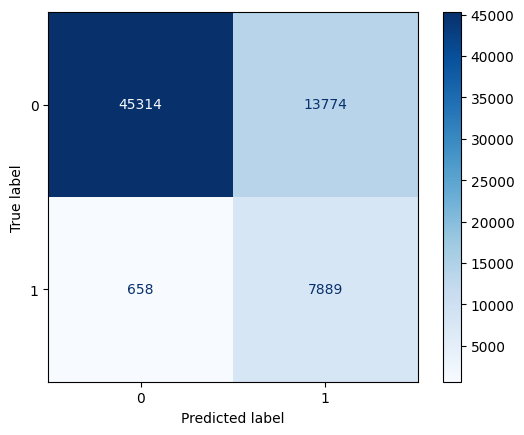

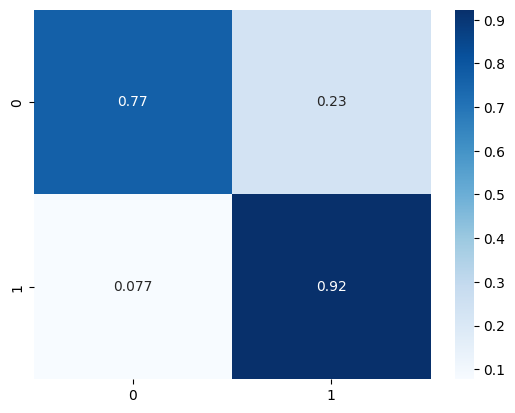

In [60]:
ada = dp.AdaBoost(X_train, X_test, y_train, y_test)

ada.fit()

Fitting 5 folds for each of 81 candidates, totalling 405 fits


c:\Users\LIR3060\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py:528: FitFailedWarning: 
165 fits failed out of a total of 405.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
165 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\LIR3060\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\LIR3060\AppData\Local\Programs\Python\Python312\Lib\site-packages\ngboost\ngboost.py", line 254, in fit
    return self.partial_fit(
           ^^^^^^^^^^^^^^^^^
  File "c:\Users\LIR3060\AppData\Local\Programs\Python\Python312

[iter 0] loss=0.6931 val_loss=0.0000 scale=4.0000 norm=8.0000
[iter 100] loss=0.3500 val_loss=0.0000 scale=0.0002 norm=0.0004
[iter 200] loss=0.3500 val_loss=0.0000 scale=0.0002 norm=0.0004
Best parameters: {'learning_rate': 0.2, 'max_depth': 5, 'minibatch_frac': 1.0, 'n_estimators': 300}
Best Score: 0.3626950467479266
Best Estimator: NGBClassifier(learning_rate=0.2, n_estimators=300,
              random_state=RandomState(MT19937) at 0x13327514940) 
[iter 0] loss=0.6931 val_loss=0.0000 scale=4.0000 norm=8.0000


c:\Users\LIR3060\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[iter 100] loss=0.3500 val_loss=0.0000 scale=0.0002 norm=0.0004
[iter 200] loss=0.3500 val_loss=0.0000 scale=0.0002 norm=0.0004


c:\Users\LIR3060\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\LIR3060\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


The accuracy score is 0.7255858653064242
 The recall score is 0.31385015802193716
 The f1 score is 0.47632752102025844
 The ROC AUC score is 0.8376420753045447

Classification Report: 
               precision    recall  f1-score   support

           0       1.00      0.69      0.81     59088
           1       0.31      0.99      0.48      8547

    accuracy                           0.73     67635
   macro avg       0.66      0.84      0.65     67635
weighted avg       0.91      0.73      0.77     67635


[iter 0] loss=0.6931 val_loss=0.0000 scale=4.0000 norm=8.0000


c:\Users\LIR3060\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[iter 100] loss=0.3475 val_loss=0.0000 scale=0.0002 norm=0.0004
[iter 200] loss=0.3475 val_loss=0.0000 scale=0.0002 norm=0.0004


c:\Users\LIR3060\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\LIR3060\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\LIR3060\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[iter 0] loss=0.6931 val_loss=0.0000 scale=4.0000 norm=8.0000
[iter 100] loss=0.3491 val_loss=0.0000 scale=0.0002 norm=0.0004
[iter 200] loss=0.3491 val_loss=0.0000 scale=0.0002 norm=0.0004


c:\Users\LIR3060\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\LIR3060\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\LIR3060\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[iter 0] loss=0.6931 val_loss=0.0000 scale=4.0000 norm=8.0000
[iter 100] loss=0.3476 val_loss=0.0000 scale=0.0002 norm=0.0004
[iter 200] loss=0.3476 val_loss=0.0000 scale=0.0002 norm=0.0004


c:\Users\LIR3060\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\LIR3060\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\LIR3060\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[iter 0] loss=0.6931 val_loss=0.0000 scale=4.0000 norm=8.0000
[iter 100] loss=0.3463 val_loss=0.0000 scale=0.0002 norm=0.0004
[iter 200] loss=0.3463 val_loss=0.0000 scale=0.0002 norm=0.0004


c:\Users\LIR3060\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\LIR3060\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\LIR3060\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[iter 0] loss=0.6931 val_loss=0.0000 scale=4.0000 norm=8.0000
[iter 100] loss=0.3519 val_loss=0.0000 scale=0.0002 norm=0.0004
[iter 200] loss=0.3519 val_loss=0.0000 scale=0.0002 norm=0.0004


c:\Users\LIR3060\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\LIR3060\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\LIR3060\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[iter 0] loss=0.6931 val_loss=0.0000 scale=4.0000 norm=8.0000
[iter 100] loss=0.3514 val_loss=0.0000 scale=0.0002 norm=0.0004
[iter 200] loss=0.3514 val_loss=0.0000 scale=0.0002 norm=0.0004


c:\Users\LIR3060\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\LIR3060\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\LIR3060\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[iter 0] loss=0.6931 val_loss=0.0000 scale=4.0000 norm=8.0000
[iter 100] loss=0.3491 val_loss=0.0000 scale=0.0002 norm=0.0004
[iter 200] loss=0.3491 val_loss=0.0000 scale=0.0002 norm=0.0004


c:\Users\LIR3060\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\LIR3060\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\LIR3060\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[iter 0] loss=0.6931 val_loss=0.0000 scale=4.0000 norm=8.0000
[iter 100] loss=0.3519 val_loss=0.0000 scale=0.0002 norm=0.0004
[iter 200] loss=0.3519 val_loss=0.0000 scale=0.0002 norm=0.0004


c:\Users\LIR3060\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\LIR3060\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\LIR3060\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[iter 0] loss=0.6931 val_loss=0.0000 scale=4.0000 norm=8.0000
[iter 100] loss=0.3488 val_loss=0.0000 scale=0.0002 norm=0.0004
[iter 200] loss=0.3488 val_loss=0.0000 scale=0.0002 norm=0.0004


c:\Users\LIR3060\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\LIR3060\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\LIR3060\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[iter 0] loss=0.6931 val_loss=0.0000 scale=4.0000 norm=8.0000
[iter 100] loss=0.3521 val_loss=0.0000 scale=0.5000 norm=0.8146
[iter 200] loss=0.3519 val_loss=0.0000 scale=0.0002 norm=0.0004
Cross validation score: [0.32017317 0.33558001 0.32017317 0.31054389 0.40683665 0.38950395
 0.35676442 0.37602297 0.30861804 0.39306358]

Mean cross validation score: 0.35172798433353547



c:\Users\LIR3060\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\LIR3060\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


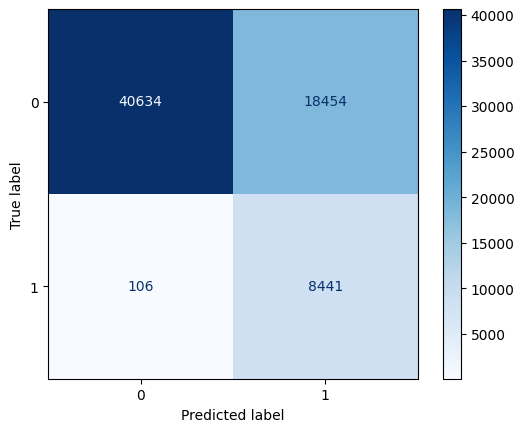

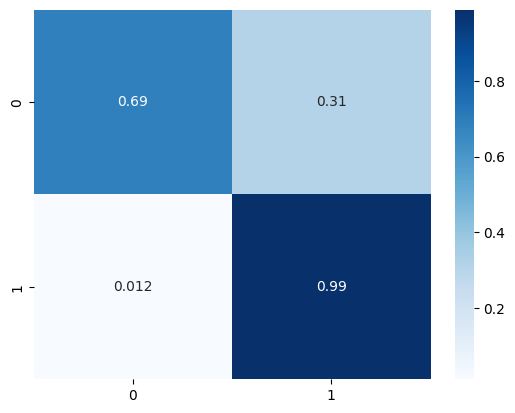

In [61]:
ngb = dp.ngboost(X_train, X_test, y_train, y_test)

ngb.fit()

The accuracy score is 0.7281880683078288
 The recall score is 0.3154339750084431
 The f1 score is 0.4776679168087283
 The ROC AUC score is 0.8373800457726128

Classification Report: 
               precision    recall  f1-score   support

           0       1.00      0.69      0.82     59088
           1       0.32      0.98      0.48      8547

    accuracy                           0.73     67635
   macro avg       0.66      0.84      0.65     67635
weighted avg       0.91      0.73      0.77     67635


Cross validation score: [0.33558001 0.33943172 0.31246975 0.31054389 0.39720737 0.3875781
 0.35483856 0.37987468 0.30476633 0.39306358]

Mean cross validation score: 0.35153539882909496



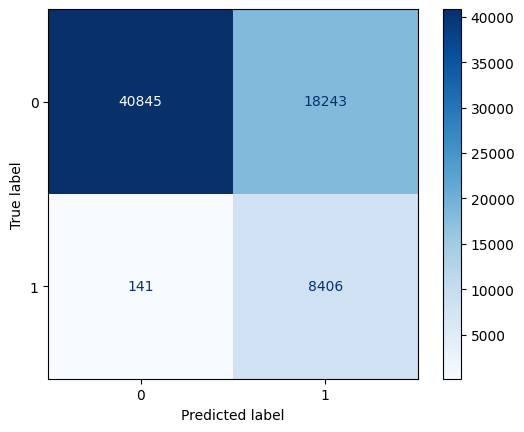

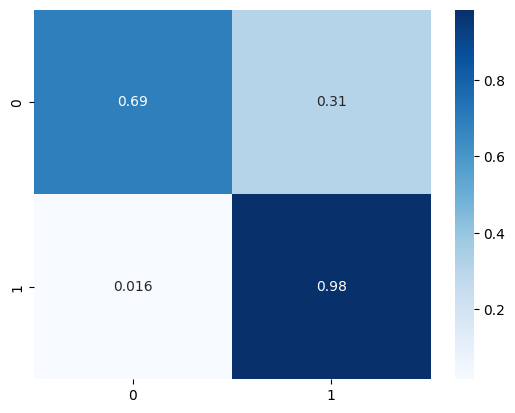

In [62]:
mlp = dp.ANN(X_train, X_test, y_train, y_test)

mlp.fit()

#### Imbalanced

In [63]:
df = pd.read_csv('C:\\Users\\LIR3060\\Desktop\\Patricio\\NEO\\NEO\\API_test\\CSV\\nearest-earth-objects(1910-2024).csv')
df = dp.OverallProcessor(df).clean3()
df

absolute_magnitude  estimated_diameter_min  estimated_diameter_max  \
0                   19.140                0.394962                0.883161   
1                   18.500                0.530341                1.185878   
2                   21.450                0.136319                0.304818   
3                   20.630                0.198863                0.444672   
4                   22.700                0.076658                0.171412   
...                    ...                     ...                     ...   
338194              28.580                0.005112                0.011430   
338195              28.690                0.004859                0.010865   
338196              21.919                0.109839                0.245607   
338197              23.887                0.044377                0.099229   
338198              22.951                0.068290                0.152700   

        relative_velocity  miss_distance  is_hazardous  
0            71745.401048   5.814362e+07         False  
1           109949.757148   5.580105e+07          True  
2            24865.506798   6.720689e+07         False  
3            78890.076805   3.039644e+07         False  
4            56036.519484   6.311863e+07         False  
...                   ...            ...           ...  
338194       56646.985988   6.406548e+07         False  
338195       21130.768947   2.948883e+07         False  
338196       11832.041031   5.346078e+07         False  
338197       56198.382733   5.184742e+06         False  
338198       42060.357830   7.126682e+06         False  

[338171 rows x 6 columns]

In [64]:
# 5 feature Columns
#df = dp.OverallProcessor(df).smote()
spt = dp.scalesplit(df)

X_train, X_test, y_train, y_test = spt.ttsplitimbalance()

X_train

array([[-1.45404797,  1.00029444,  1.00029444,  2.94828885,  0.99407991],
       [-0.0623231 , -0.25558438, -0.25558438, -0.46849131, -1.16590105],
       [ 1.35001992, -0.45106847, -0.45106847, -0.82729836,  0.3156564 ],
       ...,
       [-0.49874053, -0.07266834, -0.07266834, -1.06775914,  1.26553828],
       [ 1.56994682, -0.45992017, -0.45992017, -1.10872422,  0.68628737],
       [ 1.39812893, -0.45323358, -0.45323358,  0.32798519,  1.29980553]])

In [65]:
samplesize = 0.3


X_train, _, y_train, _, = train_test_split(X_train, y_train, train_size= samplesize, stratify=y_train, random_state=42)

print(len(X_train), len(y_train))

81160 81160


##### Models

c:\Users\LIR3060\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py:528: FitFailedWarning: 
1800 fits failed out of a total of 2880.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
137 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\LIR3060\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\LIR3060\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py", line 1382, in wrapper
    estimator._validate_params()
  File "c:\Users\LIR3060\AppData\Local\Programs\Python\Python312\Lib\site-packages\sk

Best parameters: {'C': 0.01, 'fit_intercept': True, 'n_jobs': 8, 'penalty': 'l1', 'random_state': 0, 'solver': 'liblinear', 'warm_start': True}
Best Score: 0.87214144898965
Best Estimator: LogisticRegression(C=0.01, n_jobs=8, penalty='l1', random_state=0,
                   solver='liblinear', warm_start=True) 
The accuracy score is 0.873334811857766
 The recall score is 0.49029126213592233
 The f1 score is 0.1054610003132505
 The ROC AUC score is 0.5251000031412297

Classification Report: 
               precision    recall  f1-score   support

           0       0.88      0.99      0.93     59088
           1       0.49      0.06      0.11      8547

    accuracy                           0.87     67635
   macro avg       0.68      0.53      0.52     67635
weighted avg       0.83      0.87      0.83     67635


Cross validation score: [-0.13891888 -0.15659366 -0.13118616 -0.15438431 -0.13891888 -0.13560486
 -0.15233246 -0.14791739 -0.14350232 -0.16668142]

Mean cross validation score

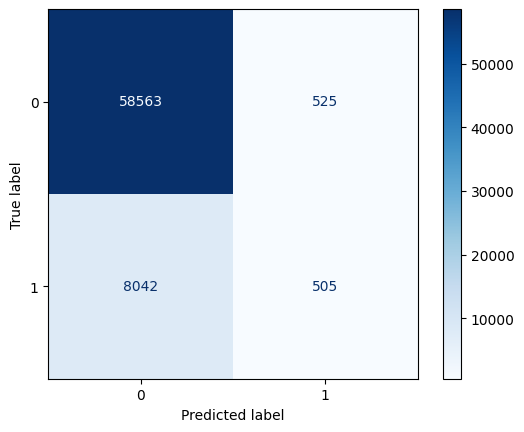

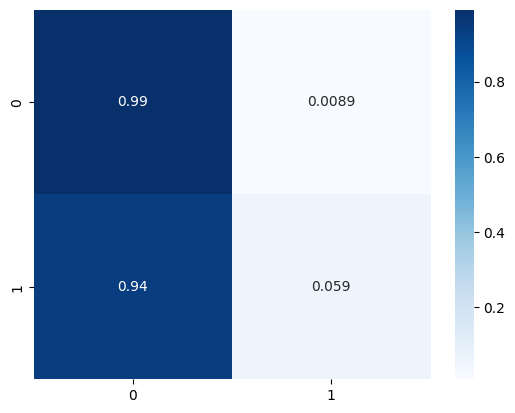

In [66]:
log_reg = dp.LogRegression(X_train, X_test, y_train, y_test)

log_reg.fit()

In [67]:
# svm = dp.supportvm(X_train, X_test, y_train, y_test)

# svm.fit()

Fitting 5 folds for each of 8 candidates, totalling 40 fits


Best parameters: {'bootstrap': True, 'criterion': 'entropy', 'max_features': 'sqrt'}
Best Score: 0.8992237555446032
Best Estimator: RandomForestClassifier(criterion='entropy', random_state=42) 
The accuracy score is 0.9007614400827973
 The recall score is 0.6521306582656275
 The f1 score is 0.5395801893263822
 The ROC AUC score is 0.7123275483856312

Classification Report: 
               precision    recall  f1-score   support

           0       0.93      0.96      0.94     59088
           1       0.65      0.46      0.54      8547

    accuracy                           0.90     67635
   macro avg       0.79      0.71      0.74     67635
weighted avg       0.89      0.90      0.89     67635


Cross validation score: [0.09195798 0.1549244  0.10300472 0.10742342 0.08201592 0.10079538
 0.12802429 0.07062842 0.08939246 0.12140169]

Mean cross validation score: 0.1049568685841414



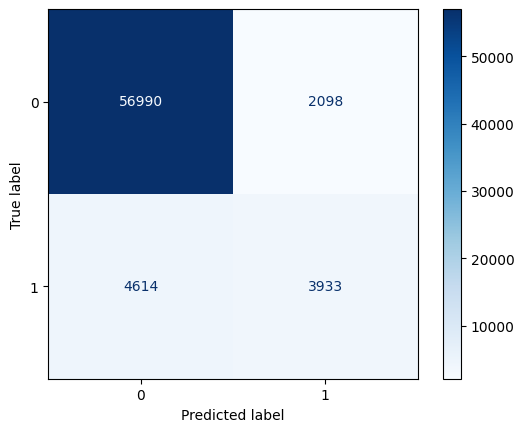

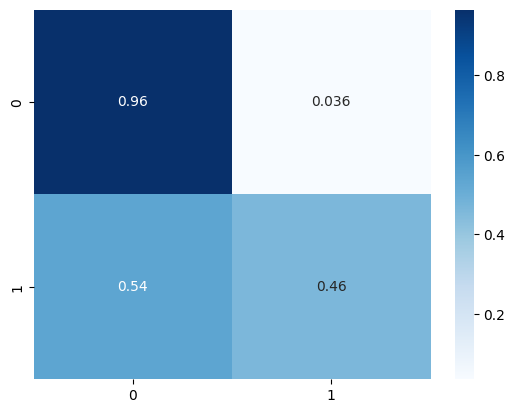

In [68]:
random_forest = dp.RandomForest(X_train, X_test, y_train, y_test)

random_forest.fit()

Fitting 5 folds for each of 243 candidates, totalling 1215 fits
Best parameters: {'gamma': 0.1, 'learning_rate': 0.2, 'max_depth': 7, 'min_child_weight': 1, 'n_estimators': 200}
Best Score: 0.8899950714637752
Best Estimator: XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0.1, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.2, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=7, max_leaves=None,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=200, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...) 
The accuracy score is 0.890

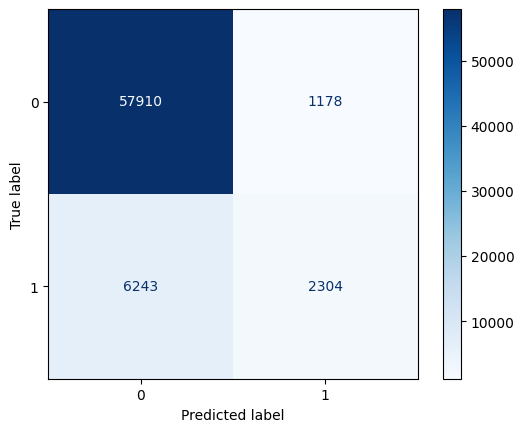

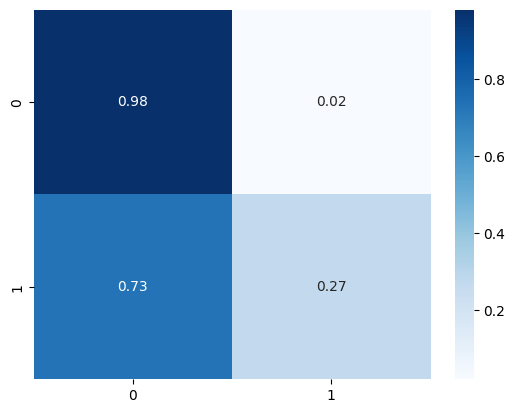

In [69]:
xgboost = dp.xgbClassifier(X_train, X_test, y_train, y_test)

xgboost.fit()

Fitting 5 folds for each of 81 candidates, totalling 405 fits
Best parameters: {'learning_rate': 0.1, 'max_depth': 7, 'max_features': 'sqrt', 'n_estimators': 300}
Best Score: 0.8963898472153771
Best Estimator: GradientBoostingClassifier(max_depth=7, max_features='sqrt', n_estimators=300,
                           random_state=42) 
The accuracy score is 0.8981148813484143
 The recall score is 0.7056631892697467
 The f1 score is 0.4519207826294441
 The ROC AUC score is 0.6561712494643039

Classification Report: 
               precision    recall  f1-score   support

           0       0.91      0.98      0.94     59088
           1       0.71      0.33      0.45      8547

    accuracy                           0.90     67635
   macro avg       0.81      0.66      0.70     67635
weighted avg       0.88      0.90      0.88     67635


Cross validation score: [0.05881776 0.08753929 0.08312059 0.08091124 0.03672429 0.06765516
 0.06290206 0.10263766 0.07173219 0.07725102]

Mean cross valid

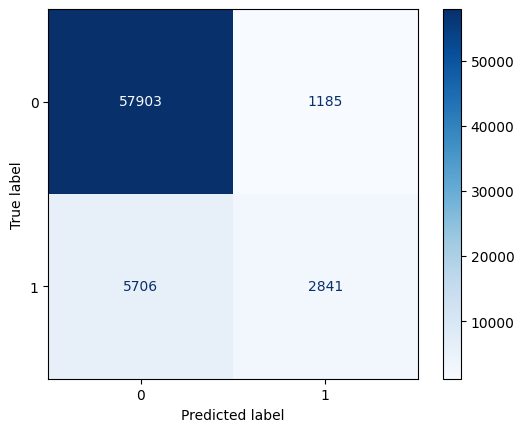

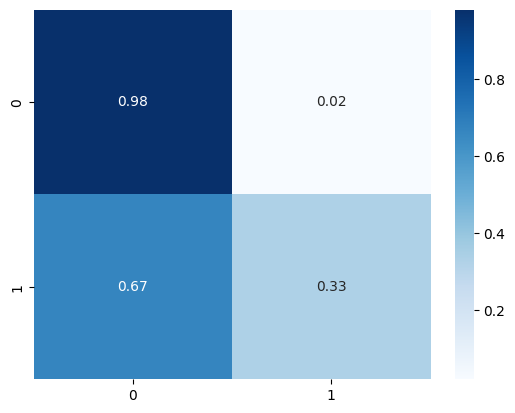

In [70]:
gb = dp.GradientBoost(X_train, X_test, y_train, y_test)

gb.fit()

Fitting 5 folds for each of 24 candidates, totalling 120 fits


c:\Users\LIR3060\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py:528: FitFailedWarning: 
60 fits failed out of a total of 120.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
60 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\LIR3060\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\LIR3060\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py", line 1382, in wrapper
    estimator._validate_params()
  File "c:\Users\LIR3060\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklear

Best parameters: {'algorithm': 'SAMME', 'learning_rate': 0.5, 'n_estimators': 50}
Best Score: 0.8993716116313456
Best Estimator: AdaBoostClassifier(algorithm='SAMME',
                   estimator=RandomForestClassifier(class_weight='balanced_subsample',
                                                    criterion='entropy',
                                                    random_state=42),
                   learning_rate=0.5, random_state=42) 


c:\Users\LIR3060\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The parameter 'algorithm' is deprecated in 1.6 and has no effect. It will be removed in version 1.8.
  warnings.warn(


The accuracy score is 0.9025060989132846
 The recall score is 0.6725569888672911
 The f1 score is 0.535829931015064
 The ROC AUC score is 0.7069712199433971

Classification Report: 
               precision    recall  f1-score   support

           0       0.92      0.97      0.95     59088
           1       0.67      0.45      0.54      8547

    accuracy                           0.90     67635
   macro avg       0.80      0.71      0.74     67635
weighted avg       0.89      0.90      0.89     67635




c:\Users\LIR3060\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The parameter 'algorithm' is deprecated in 1.6 and has no effect. It will be removed in version 1.8.
  warnings.warn(
c:\Users\LIR3060\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The parameter 'algorithm' is deprecated in 1.6 and has no effect. It will be removed in version 1.8.
  warnings.warn(
c:\Users\LIR3060\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The parameter 'algorithm' is deprecated in 1.6 and has no effect. It will be removed in version 1.8.
  warnings.warn(
c:\Users\LIR3060\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The parameter 'algorithm' is deprecated in 1.6 and has no effect. It will be removed in version 1.8.
  warnings.warn(


Cross validation score: [0.09306266 0.12730755 0.09306266 0.11405146 0.09748135 0.11626081
 0.11146779 0.08608116 0.10815649 0.10705272]

Mean cross validation score: 0.1053984659985066



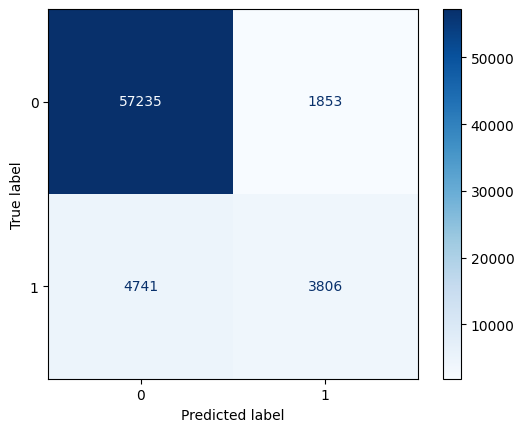

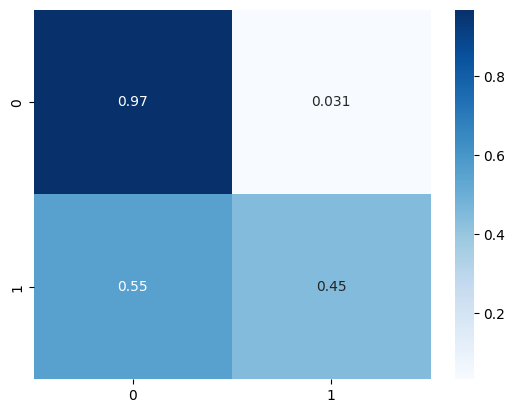

In [71]:
ada = dp.AdaBoost(X_train, X_test, y_train, y_test)

ada.fit()

Fitting 5 folds for each of 81 candidates, totalling 405 fits


c:\Users\LIR3060\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py:528: FitFailedWarning: 
243 fits failed out of a total of 405.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
243 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\LIR3060\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\LIR3060\AppData\Local\Programs\Python\Python312\Lib\site-packages\ngboost\ngboost.py", line 254, in fit
    return self.partial_fit(
           ^^^^^^^^^^^^^^^^^
  File "c:\Users\LIR3060\AppData\Local\Programs\Python\Python312

[iter 0] loss=0.3830 val_loss=0.0000 scale=1.0000 norm=2.0018
Best parameters: {'learning_rate': 0.01, 'max_depth': 3, 'minibatch_frac': 0.5, 'n_estimators': 100}
Best Score: 0.25051325187352813
Best Estimator: NGBClassifier(minibatch_frac=0.5, n_estimators=100,
              random_state=RandomState(MT19937) at 0x13327514640) 
[iter 0] loss=0.3833 val_loss=0.0000 scale=1.0000 norm=2.0030


c:\Users\LIR3060\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\LIR3060\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\LIR3060\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


The accuracy score is 0.8845863827899756
 The recall score is 0.756401384083045
 The f1 score is 0.21877502001601282
 The ROC AUC score is 0.5609619557629306

Classification Report: 
               precision    recall  f1-score   support

           0       0.89      0.99      0.94     59088
           1       0.76      0.13      0.22      8547

    accuracy                           0.88     67635
   macro avg       0.82      0.56      0.58     67635
weighted avg       0.87      0.88      0.85     67635


[iter 0] loss=0.3805 val_loss=0.0000 scale=1.0000 norm=1.9932


c:\Users\LIR3060\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\LIR3060\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\LIR3060\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\LIR3060\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[iter 0] loss=0.3792 val_loss=0.0000 scale=1.0000 norm=1.9887


c:\Users\LIR3060\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\LIR3060\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\LIR3060\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[iter 0] loss=0.3816 val_loss=0.0000 scale=1.0000 norm=1.9969


c:\Users\LIR3060\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\LIR3060\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\LIR3060\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[iter 0] loss=0.3806 val_loss=0.0000 scale=1.0000 norm=1.9934


c:\Users\LIR3060\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\LIR3060\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\LIR3060\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[iter 0] loss=0.3823 val_loss=0.0000 scale=1.0000 norm=1.9995


c:\Users\LIR3060\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\LIR3060\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\LIR3060\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[iter 0] loss=0.3833 val_loss=0.0000 scale=1.0000 norm=2.0027


c:\Users\LIR3060\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\LIR3060\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\LIR3060\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[iter 0] loss=0.3790 val_loss=0.0000 scale=1.0000 norm=1.9879


c:\Users\LIR3060\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\LIR3060\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\LIR3060\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[iter 0] loss=0.3894 val_loss=0.0000 scale=1.0000 norm=2.0240


c:\Users\LIR3060\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\LIR3060\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\LIR3060\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[iter 0] loss=0.3798 val_loss=0.0000 scale=1.0000 norm=1.9910


c:\Users\LIR3060\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\LIR3060\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\LIR3060\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[iter 0] loss=0.3837 val_loss=0.0000 scale=1.0000 norm=2.0045
Cross validation score: [-0.05164963 -0.00967202 -0.0317655  -0.04060289 -0.03728887 -0.04170757
 -0.04968215 -0.05188968 -0.03864448 -0.02208798]

Mean cross validation score: -0.03749907913440513



c:\Users\LIR3060\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\LIR3060\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


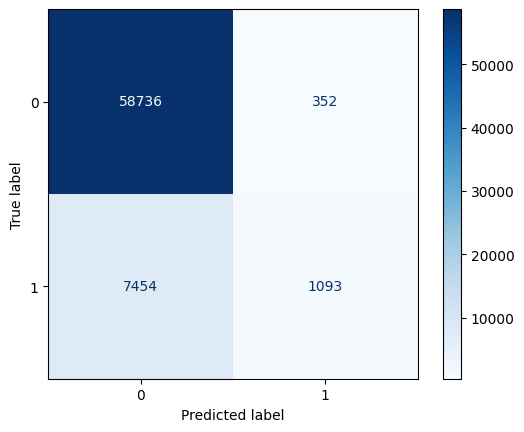

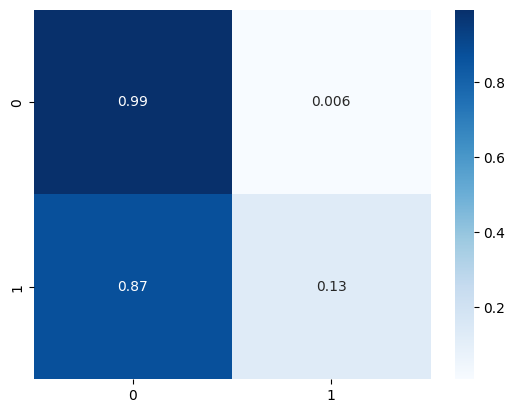

In [72]:
ngb = dp.ngboost(X_train, X_test, y_train, y_test)

ngb.fit()

The accuracy score is 0.8850595106084128
 The recall score is 0.6595130004127115
 The f1 score is 0.29134001823154054
 The ROC AUC score is 0.5865019805667653

Classification Report: 
               precision    recall  f1-score   support

           0       0.89      0.99      0.94     59088
           1       0.66      0.19      0.29      8547

    accuracy                           0.89     67635
   macro avg       0.78      0.59      0.61     67635
weighted avg       0.86      0.89      0.86     67635


Cross validation score: [-0.04391692  0.00137472 -0.02955615 -0.04391692 -0.01630007 -0.01630007
 -0.04195578 -0.02760682 -0.02871058 -0.02319175]

Mean cross validation score: -0.02700803315877648



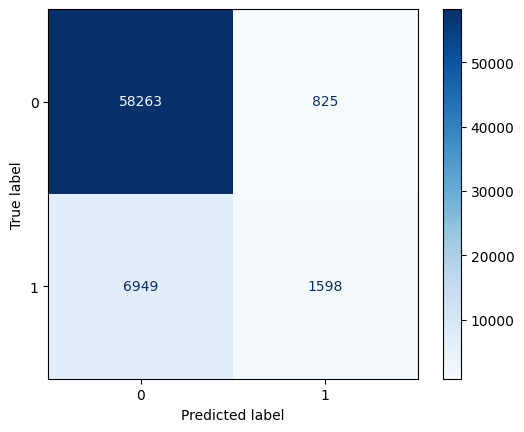

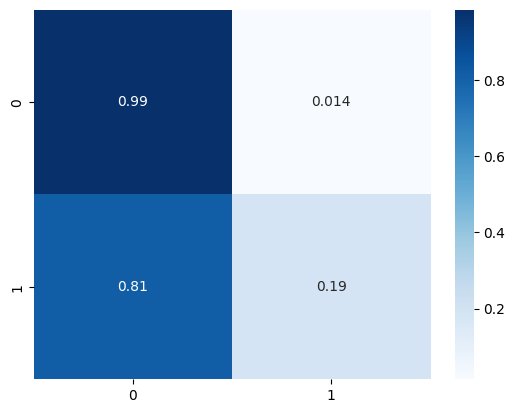

In [73]:
mlp = dp.ANN(X_train, X_test, y_train, y_test)

mlp.fit()

## 11 features

#### SMOTE

In [74]:
# 11 feature Columns

df= pd.read_csv('C:\\Users\\LIR3060\\Desktop\\Patricio\\NEO\\NEO\\API_test\\CSV\\neo_data_copy1.csv')
df = dp.OverallProcessor(df).clean()
df

absolute_magnitude_h  is_hazardous  \
0                      10.41         False   
1                      10.41         False   
2                      10.41         False   
3                      10.41         False   
4                      10.41         False   
...                      ...           ...   
578122                 27.20         False   
578123                 27.20         False   
578124                 27.20         False   
578125                 24.40         False   
578126                 24.70         False   

       relative_velocity.kilometers_per_hour miss_distance.kilometers  \
0                           20083.0290749201       47112732.928149391   
1                           15820.1671985367       70533232.893794475   
2                           17340.4224662258        74687814.59975122   
3                            16545.797587763       53823292.394218643   
4                           21314.9467227704       26040971.835879446   
...                                      ...                      ...   
578122                       64049.911353063       55282851.373088847   
578123                      77378.0309800207       72717145.716631047   
578124                      52630.8755216234       60176184.431457778   
578125                       37385.846126019       14406560.897167653   
578126                      27254.9622379911       11215502.674719137   

        estimated_diameter_min  estimated_diameter_max  \
0                    22.006703               49.208483   
1                    22.006703               49.208483   
2                    22.006703               49.208483   
3                    22.006703               49.208483   
4                    22.006703               49.208483   
...                        ...                     ...   
578122                0.009651                0.021579   
578123                0.009651                0.021579   
578124                0.009651                0.021579   
578125                0.035039                0.078350   
578126                0.030518                0.068240   

        minimum_orbit_intersection  eccentricity  inclination  \
0                         0.150230      0.222691    10.827726   
1                         0.150230      0.222691    10.827726   
2                         0.150230      0.222691    10.827726   
3                         0.150230      0.222691    10.827726   
4                         0.150230      0.222691    10.827726   
...                            ...           ...          ...   
578122                    0.010702      0.286677     9.746538   
578123                    0.010702      0.286677     9.746538   
578124                    0.010702      0.286677     9.746538   
578125                    0.021228      0.586524     2.563493   
578126                    0.074547      0.496382     7.511947   

        perihilion_distance  aphelion_distance  estimated_diameter_average  
0                  1.133458           1.782905                   35.607593  
1                  1.133458           1.782905                   35.607593  
2                  1.133458           1.782905                   35.607593  
3                  1.133458           1.782905                   35.607593  
4                  1.133458           1.782905                   35.607593  
...                     ...                ...                         ...  
578122             0.576644           1.040137                    0.015615  
578123             0.576644           1.040137                    0.015615  
578124             0.576644           1.040137                    0.015615  
578125             1.010046           3.875588                    0.056695  
578126             1.054663           3.133681                    0.049379  

[578127 rows x 12 columns]

In [75]:
spt = dp.scalesplit(df)

X_train, X_test, y_train, y_test = spt.ttsplitsmote()

X_train

array([[-0.9260489 ,  0.08002784,  0.08002784, ..., -0.77830933,
         0.03010939,  0.08002784],
       [ 0.38503235, -0.23044022, -0.23044022, ...,  0.93797495,
         0.2398473 , -0.23044022],
       [-0.50596085, -0.08237192, -0.08237192, ...,  1.57271739,
         1.43185442, -0.08237192],
       ...,
       [-0.71261707, -0.01397512, -0.01397512, ...,  0.60958009,
         1.15197947, -0.01397512],
       [-0.72009625, -0.01105578, -0.01105578, ...,  0.75711733,
         1.08432972, -0.01105578],
       [-0.53983892, -0.0724335 , -0.0724335 , ...,  0.56394237,
        -0.16585455, -0.0724335 ]])

In [76]:
samplesize = 0.3


X_train, _, y_train, _, = train_test_split(X_train, y_train, train_size= samplesize, stratify=y_train, random_state=42)

print(len(X_train), len(y_train))

251922 251922


##### Modelos

c:\Users\LIR3060\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py:528: FitFailedWarning: 
1800 fits failed out of a total of 2880.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
102 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\LIR3060\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\LIR3060\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py", line 1382, in wrapper
    estimator._validate_params()
  File "c:\Users\LIR3060\AppData\Local\Programs\Python\Python312\Lib\site-packages\sk

Best parameters: {'C': 0.1, 'fit_intercept': True, 'n_jobs': 8, 'penalty': 'l2', 'random_state': 0, 'solver': 'newton-cholesky', 'warm_start': True}
Best Score: 0.961341208420787
Best Estimator: LogisticRegression(C=0.1, n_jobs=8, random_state=0, solver='newton-cholesky',
                   warm_start=True) 
The accuracy score is 0.9477020739280093
 The recall score is 0.6410288040461358
 The f1 score is 0.774643163269109
 The ROC AUC score is 0.9615999155711414

Classification Report: 
               precision    recall  f1-score   support

           0       1.00      0.94      0.97    105006
           1       0.64      0.98      0.77     10620

    accuracy                           0.95    115626
   macro avg       0.82      0.96      0.87    115626
weighted avg       0.96      0.95      0.95    115626


Cross validation score: [0.84106696 0.84725916 0.8472531  0.84042553 0.83613846 0.84772944
 0.84360114 0.85836774 0.84645919 0.84931724]

Mean cross validation score: 0.8457617960

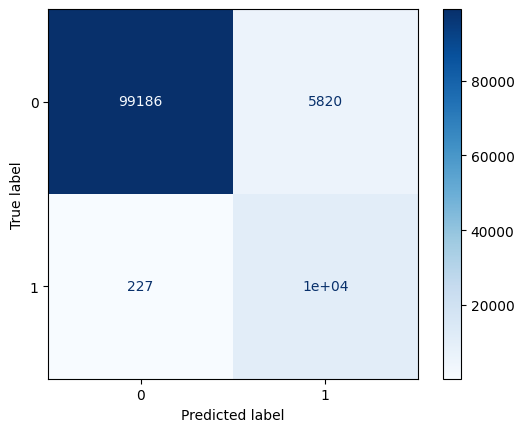

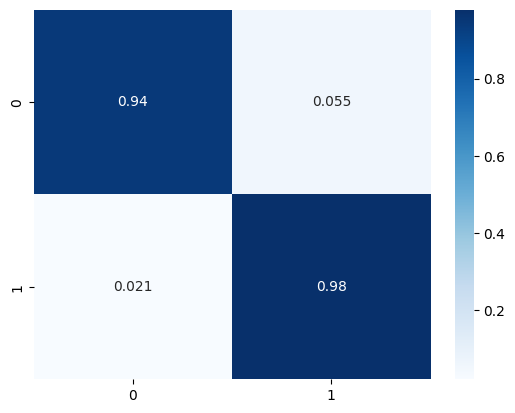

In [77]:
log_reg = dp.LogRegression(X_train, X_test, y_train, y_test)

log_reg.fit()

Fitting 5 folds for each of 270 candidates, totalling 1350 fits
Best parameters: {'alpha': 0.0001, 'eta0': 1, 'learning_rate': 'adaptive', 'loss': 'modified_huber', 'penalty': 'l2'}
Best Score: 0.9611427343686703
Best Estimator: SGDClassifier(eta0=1, learning_rate='adaptive', loss='modified_huber',
              random_state=42) 
The accuracy score is 0.9466642450659886
 The recall score is 0.6362690495134341
 The f1 score is 0.7712452242293854
 The ROC AUC score is 0.9611554776907557

Classification Report: 
               precision    recall  f1-score   support

           0       1.00      0.94      0.97    105006
           1       0.64      0.98      0.77     10620

    accuracy                           0.95    115626
   macro avg       0.82      0.96      0.87    115626
weighted avg       0.96      0.95      0.95    115626


Cross validation score: [0.83884412 0.84614774 0.84677675 0.84010797 0.83613846 0.84661797
 0.84201334 0.85630359 0.84598285 0.84868212]

Mean cross validat

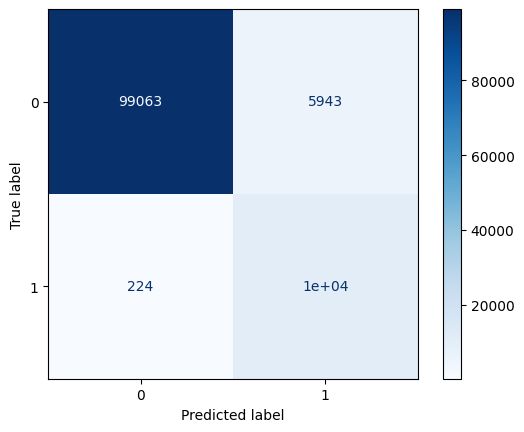

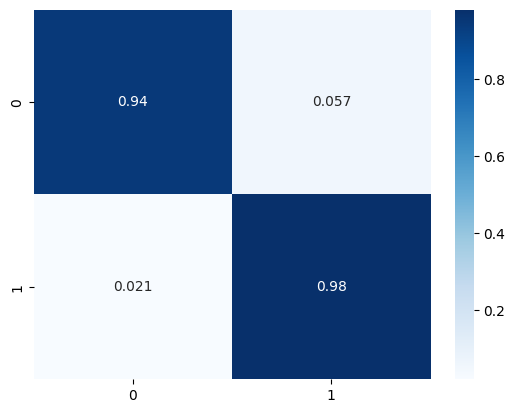

In [78]:
svm = dp.supportvm(X_train, X_test, y_train, y_test)

svm.fit()

Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters: {'bootstrap': True, 'criterion': 'gini', 'max_features': 'sqrt'}
Best Score: 0.9999682440445156
Best Estimator: RandomForestClassifier(random_state=42) 
The accuracy score is 1.0
 The recall score is 1.0
 The f1 score is 1.0
 The ROC AUC score is 1.0

Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    105006
           1       1.00      1.00      1.00     10620

    accuracy                           1.00    115626
   macro avg       1.00      1.00      1.00    115626
weighted avg       1.00      1.00      1.00    115626


Cross validation score: [0.99984123 0.99984123 1.         0.99968244 1.         0.99984122
 0.99968244 0.99984122 1.         0.99984122]

Mean cross validation score: 0.9998570987517302



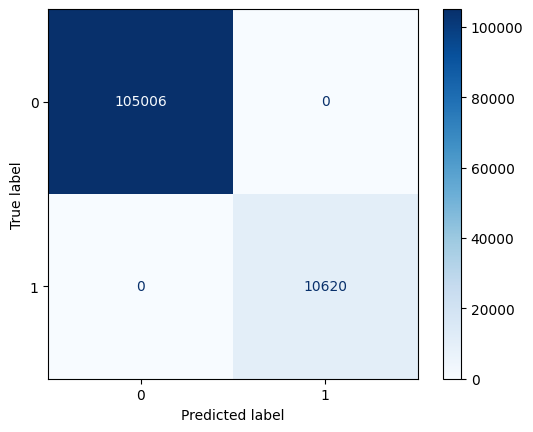

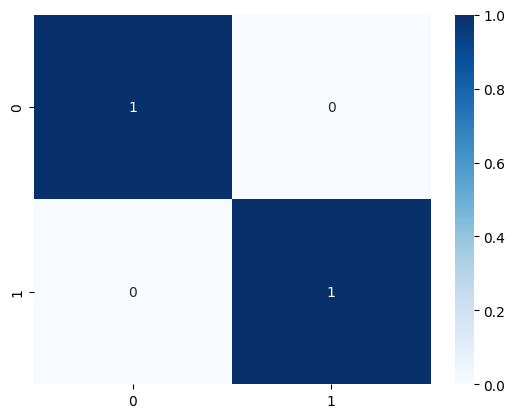

In [79]:
random_forest = dp.RandomForest(X_train, X_test, y_train, y_test)

random_forest.fit()

Fitting 5 folds for each of 243 candidates, totalling 1215 fits
Best parameters: {'gamma': 0, 'learning_rate': 0.1, 'max_depth': 3, 'min_child_weight': 1, 'n_estimators': 300}
Best Score: 0.999988091615173
Best Estimator: XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=300, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...) 
The accuracy score is 1.0
 The r

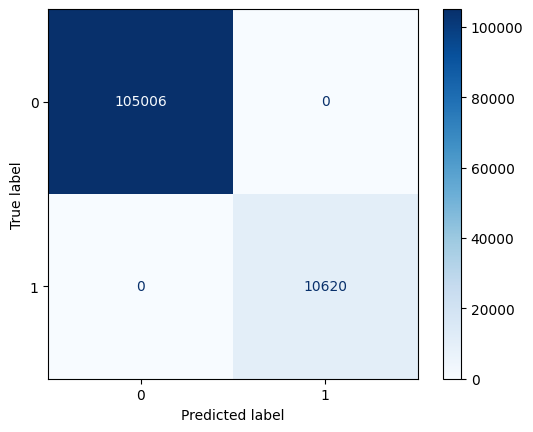

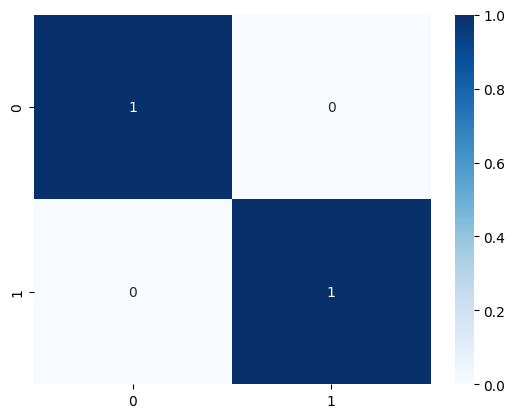

In [80]:
xgboost = dp.xgbClassifier(X_train, X_test, y_train, y_test)

xgboost.fit()

Fitting 5 folds for each of 81 candidates, totalling 405 fits
Best parameters: {'learning_rate': 0.2, 'max_depth': 3, 'max_features': 'sqrt', 'n_estimators': 200}
Best Score: 0.9999761831515622
Best Estimator: GradientBoostingClassifier(learning_rate=0.2, max_features='sqrt',
                           n_estimators=200, random_state=42) 
The accuracy score is 1.0
 The recall score is 1.0
 The f1 score is 1.0
 The ROC AUC score is 1.0

Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    105006
           1       1.00      1.00      1.00     10620

    accuracy                           1.00    115626
   macro avg       1.00      1.00      1.00    115626
weighted avg       1.00      1.00      1.00    115626


Cross validation score: [0.99968245 0.99984123 1.         0.99968244 1.         1.
 1.         0.99984122 1.         0.99984122]

Mean cross validation score: 0.9998888554950136



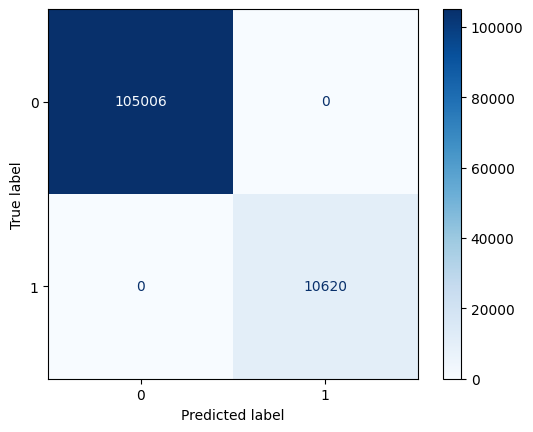

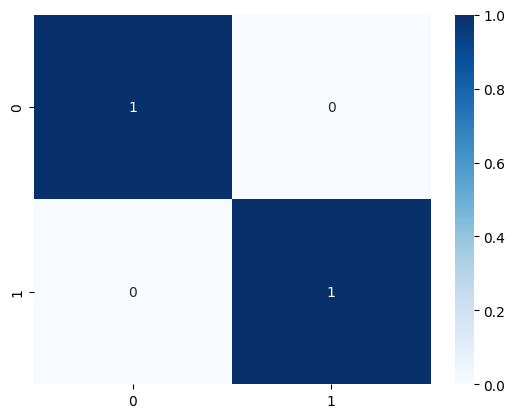

In [81]:
gb = dp.GradientBoost(X_train, X_test, y_train, y_test)

gb.fit()

Fitting 5 folds for each of 24 candidates, totalling 120 fits


c:\Users\LIR3060\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py:528: FitFailedWarning: 
60 fits failed out of a total of 120.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
60 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\LIR3060\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\LIR3060\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py", line 1382, in wrapper
    estimator._validate_params()
  File "c:\Users\LIR3060\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklear

Best parameters: {'algorithm': 'SAMME', 'learning_rate': 0.01, 'n_estimators': 50}
Best Score: 0.9999682440445156
Best Estimator: AdaBoostClassifier(algorithm='SAMME',
                   estimator=RandomForestClassifier(class_weight='balanced_subsample',
                                                    criterion='entropy',
                                                    random_state=42),
                   learning_rate=0.01, random_state=42) 


c:\Users\LIR3060\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The parameter 'algorithm' is deprecated in 1.6 and has no effect. It will be removed in version 1.8.
  warnings.warn(


The accuracy score is 1.0
 The recall score is 1.0
 The f1 score is 1.0
 The ROC AUC score is 1.0

Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    105006
           1       1.00      1.00      1.00     10620

    accuracy                           1.00    115626
   macro avg       1.00      1.00      1.00    115626
weighted avg       1.00      1.00      1.00    115626




c:\Users\LIR3060\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The parameter 'algorithm' is deprecated in 1.6 and has no effect. It will be removed in version 1.8.
  warnings.warn(
c:\Users\LIR3060\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The parameter 'algorithm' is deprecated in 1.6 and has no effect. It will be removed in version 1.8.
  warnings.warn(
c:\Users\LIR3060\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The parameter 'algorithm' is deprecated in 1.6 and has no effect. It will be removed in version 1.8.
  warnings.warn(
c:\Users\LIR3060\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The parameter 'algorithm' is deprecated in 1.6 and has no effect. It will be removed in version 1.8.
  warnings.warn(


Cross validation score: [0.99984123 0.99984123 1.         0.99968244 1.         0.99984122
 1.         0.99984122 1.         0.99984122]

Mean cross validation score: 0.9998888548647822



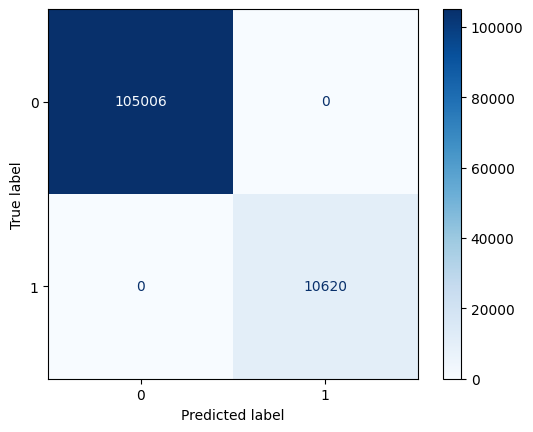

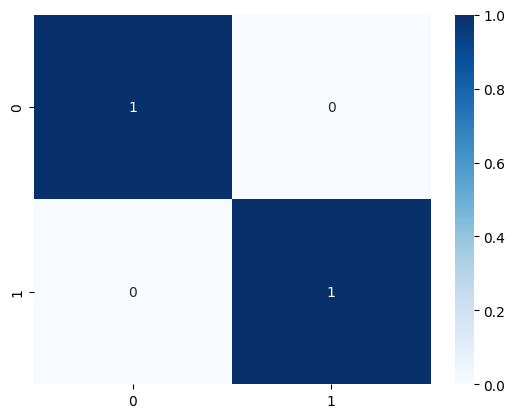

In [82]:
ada = dp.AdaBoost(X_train, X_test, y_train, y_test)

ada.fit()

Fitting 5 folds for each of 81 candidates, totalling 405 fits


c:\Users\LIR3060\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py:528: FitFailedWarning: 
270 fits failed out of a total of 405.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
270 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\LIR3060\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\LIR3060\AppData\Local\Programs\Python\Python312\Lib\site-packages\ngboost\ngboost.py", line 254, in fit
    return self.partial_fit(
           ^^^^^^^^^^^^^^^^^
  File "c:\Users\LIR3060\AppData\Local\Programs\Python\Python312

[iter 0] loss=0.6931 val_loss=0.0000 scale=256.0000 norm=512.0000
Best parameters: {'learning_rate': 0.01, 'max_depth': 7, 'minibatch_frac': 1.0, 'n_estimators': 100}
Best Score: 0.003468017199327683
Best Estimator: NGBClassifier(n_estimators=100,
              random_state=RandomState(MT19937) at 0x132CEFFAB40) 


c:\Users\LIR3060\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\LIR3060\AppData\Local\Programs\Python\Python312\Lib\site-packages\ngboost\distns\categorical.py:12: RuntimeWarning: divide by zero encountered in log
  return -np.log(self.probs[Y, range(len(Y))])


[iter 0] loss=0.6931 val_loss=0.0000 scale=256.0000 norm=512.0000


c:\Users\LIR3060\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\LIR3060\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


The accuracy score is 0.9987459567917251
 The recall score is 0.9877991990313868
 The f1 score is 0.9932106569274711
 The ROC AUC score is 0.998717092410431

Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    105006
           1       0.99      1.00      0.99     10620

    accuracy                           1.00    115626
   macro avg       0.99      1.00      1.00    115626
weighted avg       1.00      1.00      1.00    115626




c:\Users\LIR3060\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\LIR3060\AppData\Local\Programs\Python\Python312\Lib\site-packages\ngboost\distns\categorical.py:12: RuntimeWarning: divide by zero encountered in log
  return -np.log(self.probs[Y, range(len(Y))])


[iter 0] loss=0.6931 val_loss=0.0000 scale=256.0000 norm=512.0000


c:\Users\LIR3060\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\LIR3060\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\LIR3060\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\LIR3060\AppData\Local\Programs\Python\Python312\Lib\site-packages\ngboost\distns\categorical.py:12: RuntimeWarning: divide by zero encountered in log
  return -np.log(self.probs[Y, range(len(Y))])


[iter 0] loss=0.6931 val_loss=0.0000 scale=256.0000 norm=512.0000


c:\Users\LIR3060\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\LIR3060\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\LIR3060\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\LIR3060\AppData\Local\Programs\Python\Python312\Lib\site-packages\ngboost\distns\categorical.py:12: RuntimeWarning: divide by zero encountered in log
  return -np.log(self.probs[Y, range(len(Y))])


[iter 0] loss=0.6931 val_loss=0.0000 scale=256.0000 norm=512.0000


c:\Users\LIR3060\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\LIR3060\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\LIR3060\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\LIR3060\AppData\Local\Programs\Python\Python312\Lib\site-packages\ngboost\distns\categorical.py:12: RuntimeWarning: divide by zero encountered in log
  return -np.log(self.probs[Y, range(len(Y))])


[iter 0] loss=0.6931 val_loss=0.0000 scale=256.0000 norm=512.0000


c:\Users\LIR3060\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\LIR3060\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\LIR3060\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\LIR3060\AppData\Local\Programs\Python\Python312\Lib\site-packages\ngboost\distns\categorical.py:12: RuntimeWarning: divide by zero encountered in log
  return -np.log(self.probs[Y, range(len(Y))])


[iter 0] loss=0.6931 val_loss=0.0000 scale=256.0000 norm=512.0000


c:\Users\LIR3060\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\LIR3060\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\LIR3060\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\LIR3060\AppData\Local\Programs\Python\Python312\Lib\site-packages\ngboost\distns\categorical.py:12: RuntimeWarning: divide by zero encountered in log
  return -np.log(self.probs[Y, range(len(Y))])


[iter 0] loss=0.6931 val_loss=0.0000 scale=256.0000 norm=512.0000


c:\Users\LIR3060\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\LIR3060\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\LIR3060\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\LIR3060\AppData\Local\Programs\Python\Python312\Lib\site-packages\ngboost\distns\categorical.py:12: RuntimeWarning: divide by zero encountered in log
  return -np.log(self.probs[Y, range(len(Y))])


[iter 0] loss=0.6931 val_loss=0.0000 scale=256.0000 norm=512.0000


c:\Users\LIR3060\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\LIR3060\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\LIR3060\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\LIR3060\AppData\Local\Programs\Python\Python312\Lib\site-packages\ngboost\distns\categorical.py:12: RuntimeWarning: divide by zero encountered in log
  return -np.log(self.probs[Y, range(len(Y))])


[iter 0] loss=0.6931 val_loss=0.0000 scale=256.0000 norm=512.0000


c:\Users\LIR3060\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\LIR3060\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\LIR3060\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\LIR3060\AppData\Local\Programs\Python\Python312\Lib\site-packages\ngboost\distns\categorical.py:12: RuntimeWarning: divide by zero encountered in log
  return -np.log(self.probs[Y, range(len(Y))])


[iter 0] loss=0.6931 val_loss=0.0000 scale=256.0000 norm=512.0000


c:\Users\LIR3060\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\LIR3060\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\LIR3060\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\LIR3060\AppData\Local\Programs\Python\Python312\Lib\site-packages\ngboost\distns\categorical.py:12: RuntimeWarning: divide by zero encountered in log
  return -np.log(self.probs[Y, range(len(Y))])


[iter 0] loss=0.6931 val_loss=0.0000 scale=256.0000 norm=512.0000
Cross validation score: [0.99523677 0.99523677 0.99587171 0.99491902 0.99476024 0.99603049
 0.99476024 0.9950778  0.9950778  0.99587171]

Mean cross validation score: 0.995284255025713



c:\Users\LIR3060\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\LIR3060\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


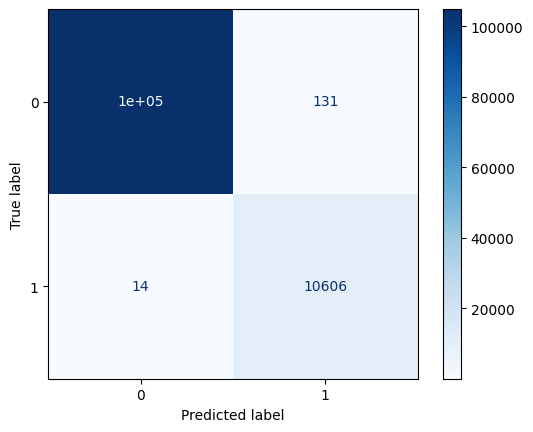

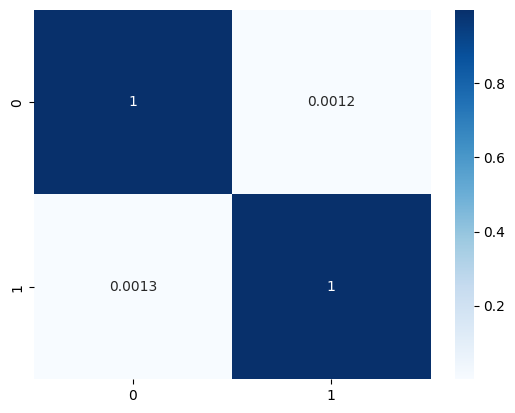

In [83]:
ngb = dp.ngboost(X_train, X_test, y_train, y_test)

ngb.fit()

The accuracy score is 0.9990832511718818
 The recall score is 0.990574841358716
 The f1 score is 0.995031871016123
 The ROC AUC score is 0.9992836702040486

Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    105006
           1       0.99      1.00      1.00     10620

    accuracy                           1.00    115626
   macro avg       1.00      1.00      1.00    115626
weighted avg       1.00      1.00      1.00    115626


Cross validation score: [0.99714206 0.99809471 0.99650683 0.99745951 0.99745951 0.99872976
 0.99698317 0.99745951 0.99761829 0.99730073]

Mean cross validation score: 0.9974754079193348



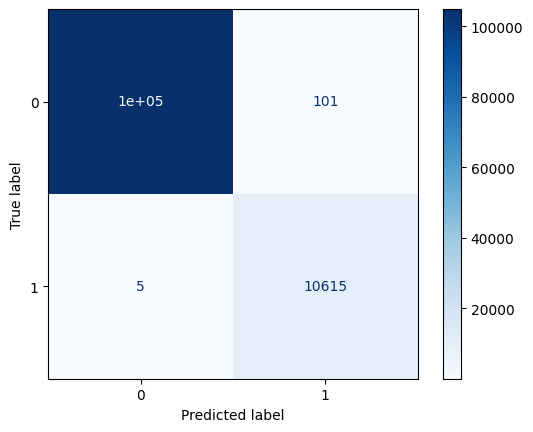

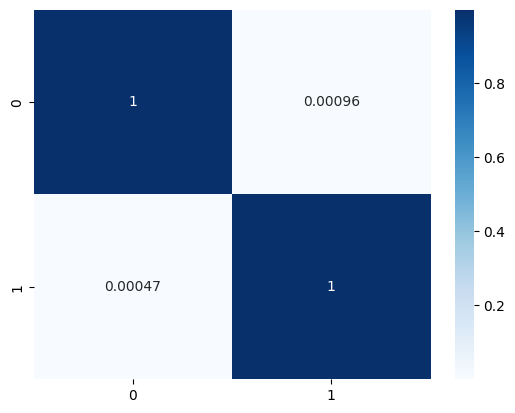

In [84]:
mlp = dp.ANN(X_train, X_test, y_train, y_test)

mlp.fit()

#### ADASYN

In [85]:
# 11 feature Columns

df= pd.read_csv('C:\\Users\\LIR3060\\Desktop\\Patricio\\NEO\\NEO\\API_test\\CSV\\neo_data_copy1.csv')
df = dp.OverallProcessor(df).clean()
df

absolute_magnitude_h  is_hazardous  \
0                      10.41         False   
1                      10.41         False   
2                      10.41         False   
3                      10.41         False   
4                      10.41         False   
...                      ...           ...   
578122                 27.20         False   
578123                 27.20         False   
578124                 27.20         False   
578125                 24.40         False   
578126                 24.70         False   

       relative_velocity.kilometers_per_hour miss_distance.kilometers  \
0                           20083.0290749201       47112732.928149391   
1                           15820.1671985367       70533232.893794475   
2                           17340.4224662258        74687814.59975122   
3                            16545.797587763       53823292.394218643   
4                           21314.9467227704       26040971.835879446   
...                                      ...                      ...   
578122                       64049.911353063       55282851.373088847   
578123                      77378.0309800207       72717145.716631047   
578124                      52630.8755216234       60176184.431457778   
578125                       37385.846126019       14406560.897167653   
578126                      27254.9622379911       11215502.674719137   

        estimated_diameter_min  estimated_diameter_max  \
0                    22.006703               49.208483   
1                    22.006703               49.208483   
2                    22.006703               49.208483   
3                    22.006703               49.208483   
4                    22.006703               49.208483   
...                        ...                     ...   
578122                0.009651                0.021579   
578123                0.009651                0.021579   
578124                0.009651                0.021579   
578125                0.035039                0.078350   
578126                0.030518                0.068240   

        minimum_orbit_intersection  eccentricity  inclination  \
0                         0.150230      0.222691    10.827726   
1                         0.150230      0.222691    10.827726   
2                         0.150230      0.222691    10.827726   
3                         0.150230      0.222691    10.827726   
4                         0.150230      0.222691    10.827726   
...                            ...           ...          ...   
578122                    0.010702      0.286677     9.746538   
578123                    0.010702      0.286677     9.746538   
578124                    0.010702      0.286677     9.746538   
578125                    0.021228      0.586524     2.563493   
578126                    0.074547      0.496382     7.511947   

        perihilion_distance  aphelion_distance  estimated_diameter_average  
0                  1.133458           1.782905                   35.607593  
1                  1.133458           1.782905                   35.607593  
2                  1.133458           1.782905                   35.607593  
3                  1.133458           1.782905                   35.607593  
4                  1.133458           1.782905                   35.607593  
...                     ...                ...                         ...  
578122             0.576644           1.040137                    0.015615  
578123             0.576644           1.040137                    0.015615  
578124             0.576644           1.040137                    0.015615  
578125             1.010046           3.875588                    0.056695  
578126             1.054663           3.133681                    0.049379  

[578127 rows x 12 columns]

In [86]:
spt = dp.scalesplit(df)

X_train, X_test, y_train, y_test = spt.ttsplitadasyn()

X_train

array([[-0.9260489 ,  0.08002784,  0.08002784, ..., -0.77830933,
         0.03010939,  0.08002784],
       [ 0.38503235, -0.23044022, -0.23044022, ...,  0.93797495,
         0.2398473 , -0.23044022],
       [-0.50596085, -0.08237192, -0.08237192, ...,  1.57271739,
         1.43185442, -0.08237192],
       ...,
       [-0.60759505, -0.05112944, -0.05112944, ...,  0.11796789,
         0.11671392, -0.05112944],
       [-0.60759505, -0.05112944, -0.05112944, ...,  0.11796789,
         0.11671392, -0.05112944],
       [-0.60759505, -0.05112944, -0.05112944, ...,  0.11796789,
         0.11671392, -0.05112944]])

In [87]:
samplesize = 0.3


X_train, _, y_train, _, = train_test_split(X_train, y_train, train_size= samplesize, stratify=y_train, random_state=42)

print(len(X_train), len(y_train))

252000 252000


##### Modelos

c:\Users\LIR3060\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py:528: FitFailedWarning: 
1800 fits failed out of a total of 2880.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
360 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\LIR3060\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\LIR3060\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py", line 1382, in wrapper
    estimator._validate_params()
  File "c:\Users\LIR3060\AppData\Local\Programs\Python\Python312\Lib\site-packages\sk

Best parameters: {'C': 100, 'fit_intercept': True, 'n_jobs': 8, 'penalty': 'l2', 'random_state': 0, 'solver': 'newton-cholesky', 'warm_start': True}
Best Score: 0.9675396825396826
Best Estimator: LogisticRegression(C=100, n_jobs=8, random_state=0, solver='newton-cholesky',
                   warm_start=True) 
The accuracy score is 0.9464220849981838
 The recall score is 0.6436222005842259
 The f1 score is 0.7619596541786744
 The ROC AUC score is 0.940666546253854

Classification Report: 
               precision    recall  f1-score   support

           0       0.99      0.95      0.97    105006
           1       0.64      0.93      0.76     10620

    accuracy                           0.95    115626
   macro avg       0.82      0.94      0.87    115626
weighted avg       0.96      0.95      0.95    115626


Cross validation score: [0.86714284 0.87746031 0.86904761 0.86841269 0.865873   0.87333332
 0.87238094 0.86650792 0.87333332 0.86571428]

Mean cross validation score: 0.869920622

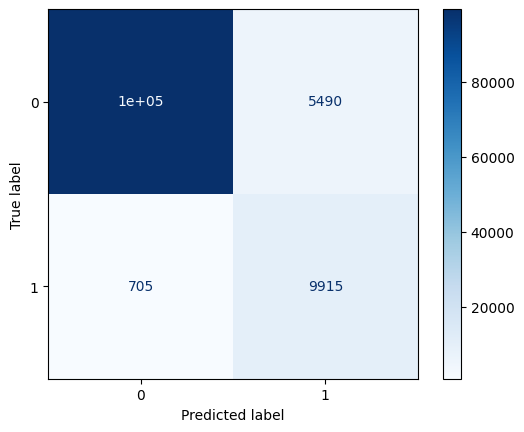

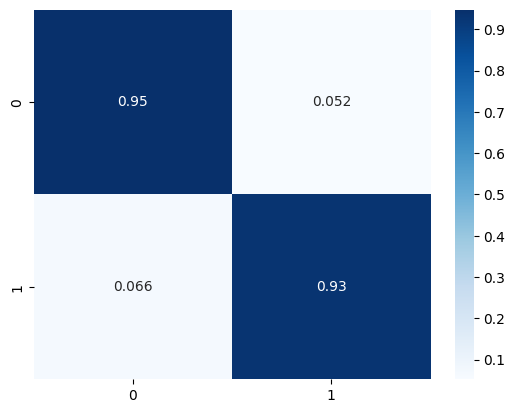

In [88]:
log_reg = dp.LogRegression(X_train, X_test, y_train, y_test)

log_reg.fit()

Fitting 5 folds for each of 270 candidates, totalling 1350 fits
Best parameters: {'alpha': 0.0001, 'eta0': 0.1, 'learning_rate': 'adaptive', 'loss': 'log_loss', 'penalty': 'l1'}
Best Score: 0.9672261904761905
Best Estimator: SGDClassifier(eta0=0.1, learning_rate='adaptive', loss='log_loss', penalty='l1',
              random_state=42) 
The accuracy score is 0.945929116288724
 The recall score is 0.6412312467666839
 The f1 score is 0.7603128354546849
 The ROC AUC score is 0.9404374525383593

Classification Report: 
               precision    recall  f1-score   support

           0       0.99      0.95      0.97    105006
           1       0.64      0.93      0.76     10620

    accuracy                           0.95    115626
   macro avg       0.82      0.94      0.86    115626
weighted avg       0.96      0.95      0.95    115626


Cross validation score: [0.86650792 0.875873   0.86809522 0.86841269 0.86444443 0.87238094
 0.87079364 0.865873   0.87095237 0.86412698]

Mean cross va

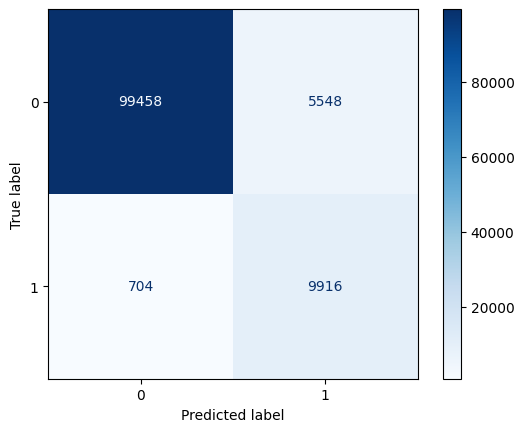

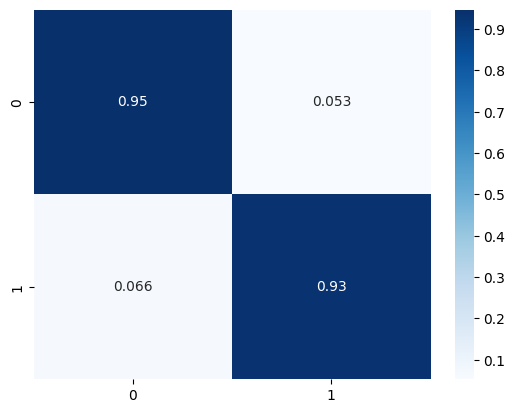

In [89]:
svm = dp.supportvm(X_train, X_test, y_train, y_test)

svm.fit()

Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters: {'bootstrap': True, 'criterion': 'gini', 'max_features': 'sqrt'}
Best Score: 0.9999960317460317
Best Estimator: RandomForestClassifier(random_state=42) 
The accuracy score is 0.9999913514261498
 The recall score is 0.9999058469070708
 The f1 score is 0.9999529212372299
 The ROC AUC score is 0.9999952383673314

Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    105006
           1       1.00      1.00      1.00     10620

    accuracy                           1.00    115626
   macro avg       1.00      1.00      1.00    115626
weighted avg       1.00      1.00      1.00    115626


Cross validation score: [1.         1.         1.         0.99984127 1.         0.99984127
 1.         1.         1.         1.        ]

Mean cross validation score: 0.9999682539650546



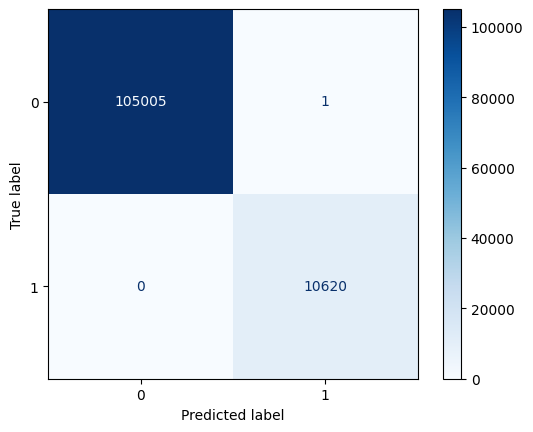

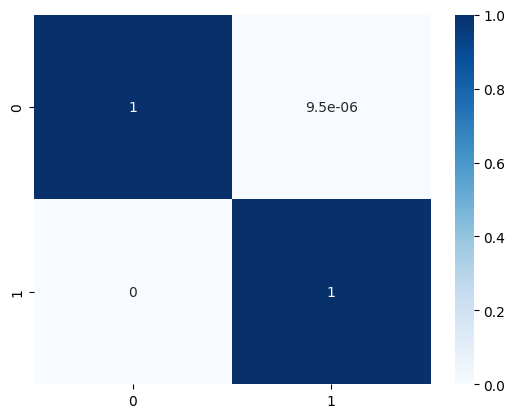

In [90]:
random_forest = dp.RandomForest(X_train, X_test, y_train, y_test)

random_forest.fit()

Fitting 5 folds for each of 243 candidates, totalling 1215 fits
Best parameters: {'gamma': 0, 'learning_rate': 0.1, 'max_depth': 7, 'min_child_weight': 1, 'n_estimators': 200}
Best Score: 0.9999920634920635
Best Estimator: XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=7, max_leaves=None,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=200, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...) 
The accuracy score is 1.0
 The 

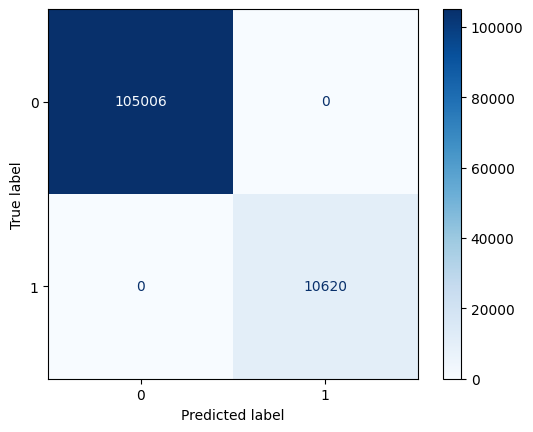

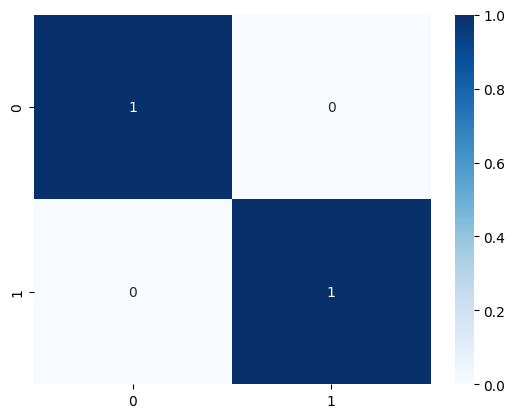

In [91]:
xgboost = dp.xgbClassifier(X_train, X_test, y_train, y_test)

xgboost.fit()

Fitting 5 folds for each of 81 candidates, totalling 405 fits
Best parameters: {'learning_rate': 0.1, 'max_depth': 5, 'max_features': 'sqrt', 'n_estimators': 200}
Best Score: 0.9999960317460317
Best Estimator: GradientBoostingClassifier(max_depth=5, max_features='sqrt', n_estimators=200,
                           random_state=42) 
The accuracy score is 0.9999913514261498
 The recall score is 0.9999058469070708
 The f1 score is 0.9999529212372299
 The ROC AUC score is 0.9999952383673314

Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    105006
           1       1.00      1.00      1.00     10620

    accuracy                           1.00    115626
   macro avg       1.00      1.00      1.00    115626
weighted avg       1.00      1.00      1.00    115626


Cross validation score: [1.         0.99952381 1.         1.         1.         0.99984127
 1.         0.99968254 0.99968254 1.        ]

Mean cross valid

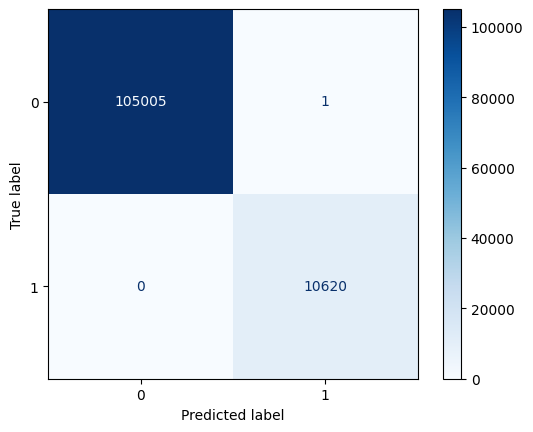

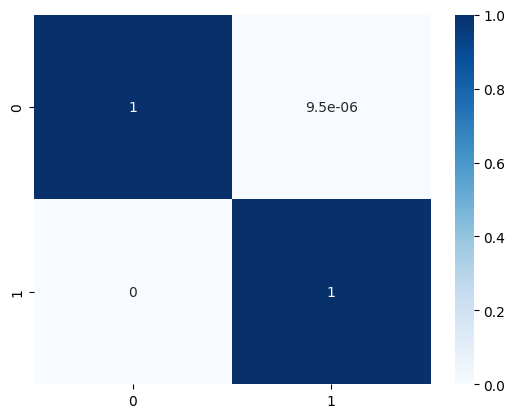

In [92]:
gb = dp.GradientBoost(X_train, X_test, y_train, y_test)

gb.fit()

Fitting 5 folds for each of 24 candidates, totalling 120 fits


c:\Users\LIR3060\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py:528: FitFailedWarning: 
60 fits failed out of a total of 120.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
60 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\LIR3060\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\LIR3060\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py", line 1382, in wrapper
    estimator._validate_params()
  File "c:\Users\LIR3060\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklear

Best parameters: {'algorithm': 'SAMME', 'learning_rate': 0.01, 'n_estimators': 50}
Best Score: 0.9999960317460317
Best Estimator: AdaBoostClassifier(algorithm='SAMME',
                   estimator=RandomForestClassifier(class_weight='balanced_subsample',
                                                    criterion='entropy',
                                                    random_state=42),
                   learning_rate=0.01, random_state=42) 


c:\Users\LIR3060\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The parameter 'algorithm' is deprecated in 1.6 and has no effect. It will be removed in version 1.8.
  warnings.warn(


The accuracy score is 1.0
 The recall score is 1.0
 The f1 score is 1.0
 The ROC AUC score is 1.0

Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    105006
           1       1.00      1.00      1.00     10620

    accuracy                           1.00    115626
   macro avg       1.00      1.00      1.00    115626
weighted avg       1.00      1.00      1.00    115626




c:\Users\LIR3060\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The parameter 'algorithm' is deprecated in 1.6 and has no effect. It will be removed in version 1.8.
  warnings.warn(
c:\Users\LIR3060\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The parameter 'algorithm' is deprecated in 1.6 and has no effect. It will be removed in version 1.8.
  warnings.warn(
c:\Users\LIR3060\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The parameter 'algorithm' is deprecated in 1.6 and has no effect. It will be removed in version 1.8.
  warnings.warn(
c:\Users\LIR3060\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The parameter 'algorithm' is deprecated in 1.6 and has no effect. It will be removed in version 1.8.
  warnings.warn(


Cross validation score: [1.         1.         1.         1.         1.         0.99984127
 1.         1.         1.         1.        ]

Mean cross validation score: 0.9999841269825274



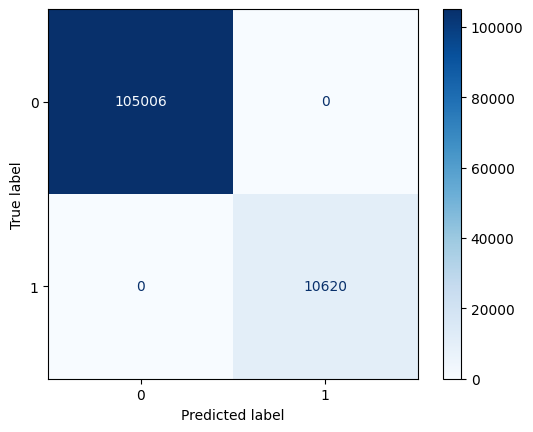

FileNotFoundError: [Errno 2] No such file or directory: '/Volumes/Maestria/GitHub/NEO/NEO/Exports/API/best_model_11.sav'

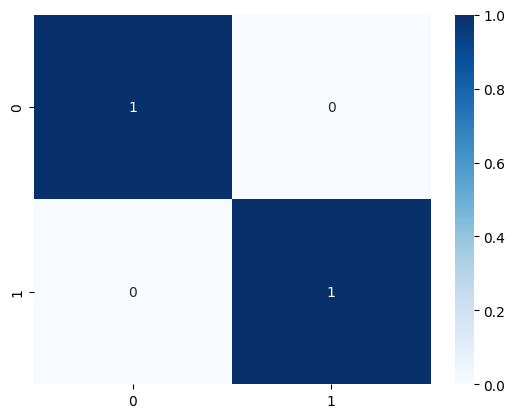

In [ ]:
ada = dp.AdaBoost(X_train, X_test, y_train, y_test)

ada.fit()

#dump(ada, '/Volumes/Maestria/GitHub/NEO/NEO/Exports/API/best_model_11.sav' )

Fitting 5 folds for each of 81 candidates, totalling 405 fits


c:\Users\LIR3060\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py:528: FitFailedWarning: 
270 fits failed out of a total of 405.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
270 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\LIR3060\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\LIR3060\AppData\Local\Programs\Python\Python312\Lib\site-packages\ngboost\ngboost.py", line 254, in fit
    return self.partial_fit(
           ^^^^^^^^^^^^^^^^^
  File "c:\Users\LIR3060\AppData\Local\Programs\Python\Python312

[iter 0] loss=0.6931 val_loss=0.0000 scale=128.0000 norm=256.0001
Best parameters: {'learning_rate': 0.01, 'max_depth': 7, 'minibatch_frac': 0.5, 'n_estimators': 100}
Best Score: 0.008550840867240742
Best Estimator: NGBClassifier(minibatch_frac=0.5, n_estimators=100,
              random_state=RandomState(MT19937) at 0x132D5984F40) 


c:\Users\LIR3060\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[iter 0] loss=0.6931 val_loss=0.0000 scale=128.0000 norm=255.9998


c:\Users\LIR3060\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\LIR3060\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


The accuracy score is 0.9921730406655942
 The recall score is 0.9214750542299349
 The f1 score is 0.9591329871302777
 The ROC AUC score is 0.9956907224349084

Classification Report: 
               precision    recall  f1-score   support

           0       1.00      0.99      1.00    105006
           1       0.92      1.00      0.96     10620

    accuracy                           0.99    115626
   macro avg       0.96      1.00      0.98    115626
weighted avg       0.99      0.99      0.99    115626




c:\Users\LIR3060\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[iter 0] loss=0.6931 val_loss=0.0000 scale=128.0000 norm=255.9997


c:\Users\LIR3060\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\LIR3060\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\LIR3060\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[iter 0] loss=0.6931 val_loss=0.0000 scale=128.0000 norm=255.9999


c:\Users\LIR3060\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\LIR3060\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\LIR3060\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[iter 0] loss=0.6931 val_loss=0.0000 scale=128.0000 norm=256.0002


c:\Users\LIR3060\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\LIR3060\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\LIR3060\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[iter 0] loss=0.6931 val_loss=0.0000 scale=128.0000 norm=255.9998


c:\Users\LIR3060\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\LIR3060\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\LIR3060\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[iter 0] loss=0.6931 val_loss=0.0000 scale=128.0000 norm=255.9999


c:\Users\LIR3060\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\LIR3060\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\LIR3060\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[iter 0] loss=0.6931 val_loss=0.0000 scale=128.0000 norm=255.9997


c:\Users\LIR3060\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\LIR3060\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\LIR3060\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[iter 0] loss=0.6931 val_loss=0.0000 scale=128.0000 norm=256.0000


c:\Users\LIR3060\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\LIR3060\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\LIR3060\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[iter 0] loss=0.6931 val_loss=0.0000 scale=128.0000 norm=255.9999


c:\Users\LIR3060\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\LIR3060\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\LIR3060\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[iter 0] loss=0.6931 val_loss=0.0000 scale=128.0000 norm=255.9999


c:\Users\LIR3060\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\LIR3060\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\LIR3060\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[iter 0] loss=0.6931 val_loss=0.0000 scale=128.0000 norm=256.0001
Cross validation score: [0.98603174 0.9831746  0.98507936 0.98428571 0.98301587 0.98650794
 0.98523809 0.98619047 0.98380952 0.98412698]

Mean cross validation score: 0.9847460302787076



c:\Users\LIR3060\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\LIR3060\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


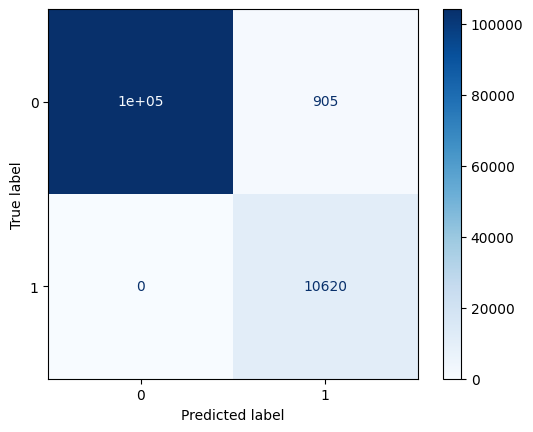

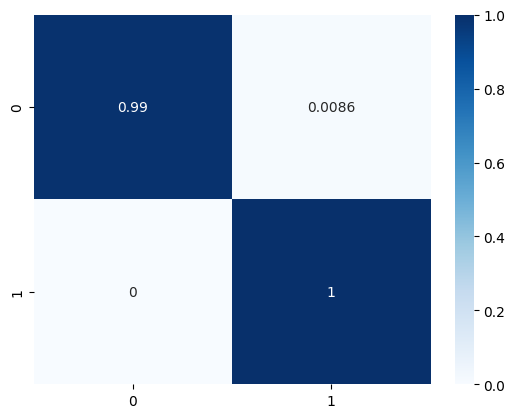

In [94]:
ngb = dp.ngboost(X_train, X_test, y_train, y_test)

ngb.fit()

The accuracy score is 0.9992648712227353
 The recall score is 0.9921517331589274
 The f1 score is 0.9960136941330957
 The ROC AUC score is 0.9995529418765525

Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    105006
           1       0.99      1.00      1.00     10620

    accuracy                           1.00    115626
   macro avg       1.00      1.00      1.00    115626
weighted avg       1.00      1.00      1.00    115626


Cross validation score: [0.9984127  0.99809524 0.99777778 0.99793651 0.99571429 0.99873016
 0.99730159 0.99650794 0.99904762 0.99809524]

Mean cross validation score: 0.9977619045447457



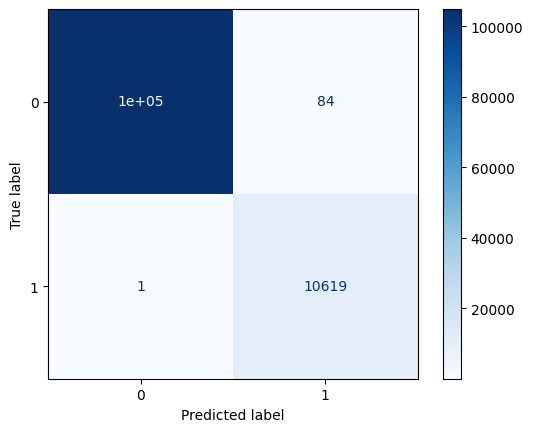

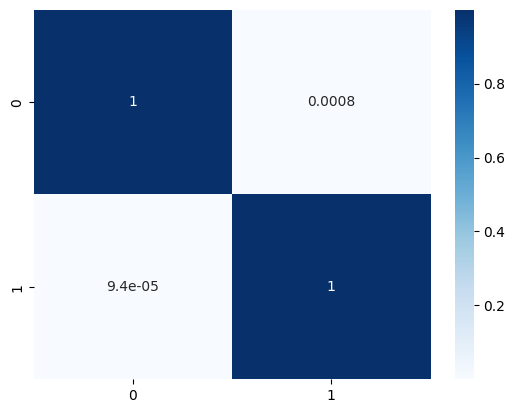

In [95]:
mlp = dp.ANN(X_train, X_test, y_train, y_test)

mlp.fit()

#### Random Under Sample

In [96]:
# 11 feature Columns

df= pd.read_csv('C:\\Users\\LIR3060\\Desktop\\Patricio\\NEO\\NEO\\API_test\\CSV\\neo_data_copy1.csv')
df = dp.OverallProcessor(df).clean()
df

absolute_magnitude_h  is_hazardous  \
0                      10.41         False   
1                      10.41         False   
2                      10.41         False   
3                      10.41         False   
4                      10.41         False   
...                      ...           ...   
578122                 27.20         False   
578123                 27.20         False   
578124                 27.20         False   
578125                 24.40         False   
578126                 24.70         False   

       relative_velocity.kilometers_per_hour miss_distance.kilometers  \
0                           20083.0290749201       47112732.928149391   
1                           15820.1671985367       70533232.893794475   
2                           17340.4224662258        74687814.59975122   
3                            16545.797587763       53823292.394218643   
4                           21314.9467227704       26040971.835879446   
...                                      ...                      ...   
578122                       64049.911353063       55282851.373088847   
578123                      77378.0309800207       72717145.716631047   
578124                      52630.8755216234       60176184.431457778   
578125                       37385.846126019       14406560.897167653   
578126                      27254.9622379911       11215502.674719137   

        estimated_diameter_min  estimated_diameter_max  \
0                    22.006703               49.208483   
1                    22.006703               49.208483   
2                    22.006703               49.208483   
3                    22.006703               49.208483   
4                    22.006703               49.208483   
...                        ...                     ...   
578122                0.009651                0.021579   
578123                0.009651                0.021579   
578124                0.009651                0.021579   
578125                0.035039                0.078350   
578126                0.030518                0.068240   

        minimum_orbit_intersection  eccentricity  inclination  \
0                         0.150230      0.222691    10.827726   
1                         0.150230      0.222691    10.827726   
2                         0.150230      0.222691    10.827726   
3                         0.150230      0.222691    10.827726   
4                         0.150230      0.222691    10.827726   
...                            ...           ...          ...   
578122                    0.010702      0.286677     9.746538   
578123                    0.010702      0.286677     9.746538   
578124                    0.010702      0.286677     9.746538   
578125                    0.021228      0.586524     2.563493   
578126                    0.074547      0.496382     7.511947   

        perihilion_distance  aphelion_distance  estimated_diameter_average  
0                  1.133458           1.782905                   35.607593  
1                  1.133458           1.782905                   35.607593  
2                  1.133458           1.782905                   35.607593  
3                  1.133458           1.782905                   35.607593  
4                  1.133458           1.782905                   35.607593  
...                     ...                ...                         ...  
578122             0.576644           1.040137                    0.015615  
578123             0.576644           1.040137                    0.015615  
578124             0.576644           1.040137                    0.015615  
578125             1.010046           3.875588                    0.056695  
578126             1.054663           3.133681                    0.049379  

[578127 rows x 12 columns]

In [97]:
spt = dp.scalesplit(df)

X_train, X_test, y_train, y_test = spt.ttsplitrus()

X_train.shape

(85262, 11)

In [98]:
samplesize = 0.3


X_train, _, y_train, _, = train_test_split(X_train, y_train, train_size= samplesize, stratify=y_train, random_state=42)

print(len(X_train), len(y_train))

25578 25578


##### Modelos

c:\Users\LIR3060\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py:528: FitFailedWarning: 
1800 fits failed out of a total of 2880.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
179 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\LIR3060\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\LIR3060\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py", line 1382, in wrapper
    estimator._validate_params()
  File "c:\Users\LIR3060\AppData\Local\Programs\Python\Python312\Lib\site-packages\sk

Best parameters: {'C': 1, 'fit_intercept': True, 'n_jobs': 8, 'penalty': 'l2', 'random_state': 0, 'solver': 'newton-cholesky', 'warm_start': True}
Best Score: 0.9609034734339282
Best Estimator: LogisticRegression(C=1, n_jobs=8, random_state=0, solver='newton-cholesky',
                   warm_start=True) 
The accuracy score is 0.9476588310587584
 The recall score is 0.6407097092163627
 The f1 score is 0.7746164159094294
 The ROC AUC score is 0.9618723428341087

Classification Report: 
               precision    recall  f1-score   support

           0       1.00      0.94      0.97    105006
           1       0.64      0.98      0.77     10620

    accuracy                           0.95    115626
   macro avg       0.82      0.96      0.87    115626
weighted avg       0.96      0.95      0.95    115626


Cross validation score: [0.84519156 0.83111806 0.84675528 0.84519156 0.84050039 0.83111806
 0.84519156 0.87646599 0.81853732 0.86077432]

Mean cross validation score: 0.844084409156

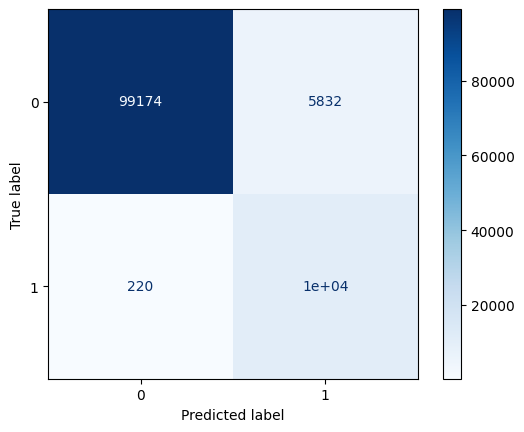

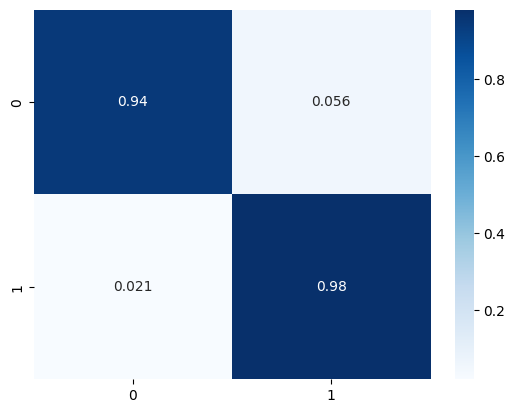

In [99]:
log_reg = dp.LogRegression(X_train, X_test, y_train, y_test)

log_reg.fit()

The accuracy score is 0.9939287011571791
 The recall score is 0.9387718987789772
 The f1 score is 0.9679773743271599
 The ROC AUC score is 0.9962341404004785

Classification Report: 
               precision    recall  f1-score   support

           0       1.00      0.99      1.00    105006
           1       0.94      1.00      0.97     10620

    accuracy                           0.99    115626
   macro avg       0.97      1.00      0.98    115626
weighted avg       0.99      0.99      0.99    115626


Cross validation score: [0.9820172  0.98123534 0.97967162 0.98514174 0.98592375]

Mean cross validation score: 0.9827979304079649



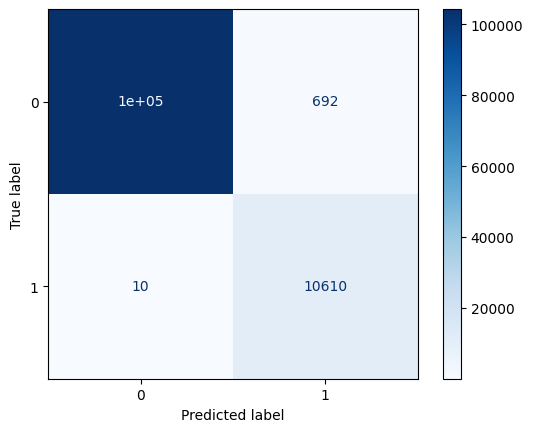

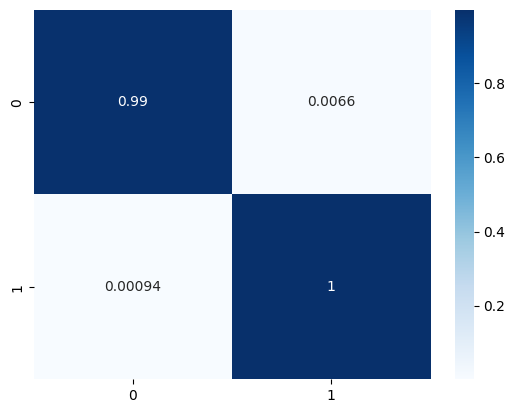

In [100]:
svm = dp.supportvm2(X_train, X_test, y_train, y_test)

svm.fit()

Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters: {'bootstrap': False, 'criterion': 'gini', 'max_features': 'sqrt'}
Best Score: 0.9997654111800747
Best Estimator: RandomForestClassifier(bootstrap=False, random_state=42) 
The accuracy score is 0.9998529742445471
 The recall score is 0.9984018050202125
 The f1 score is 0.9992002634426307
 The ROC AUC score is 0.9999190522446336

Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    105006
           1       1.00      1.00      1.00     10620

    accuracy                           1.00    115626
   macro avg       1.00      1.00      1.00    115626
weighted avg       1.00      1.00      1.00    115626


Cross validation score: [0.99843628 1.         0.99843628 0.99843628 1.         1.
 1.         0.99687256 1.         0.99843567]

Mean cross validation score: 0.9990617058270045



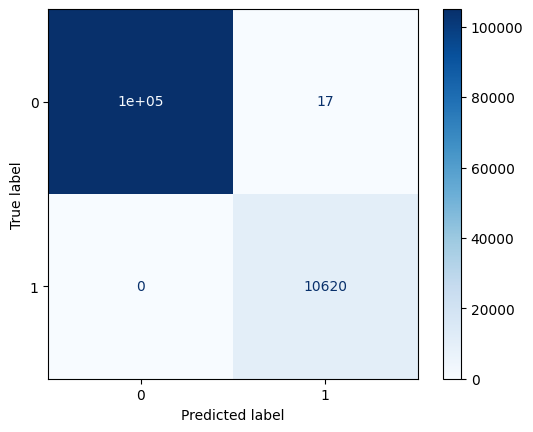

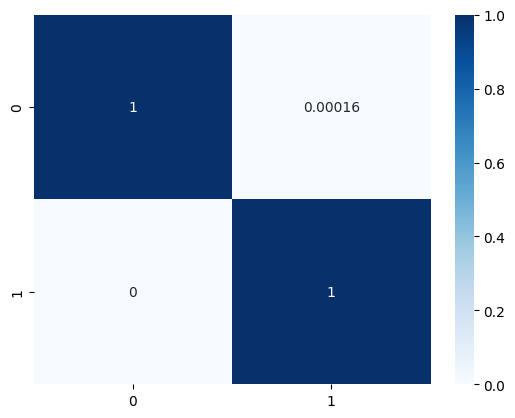

In [101]:
random_forest = dp.RandomForest(X_train, X_test, y_train, y_test)

random_forest.fit()

Fitting 5 folds for each of 243 candidates, totalling 1215 fits
Best parameters: {'gamma': 0, 'learning_rate': 0.1, 'max_depth': 3, 'min_child_weight': 1, 'n_estimators': 200}
Best Score: 0.9997654188228984
Best Estimator: XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=200, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...) 
The accuracy score is 0.9998616

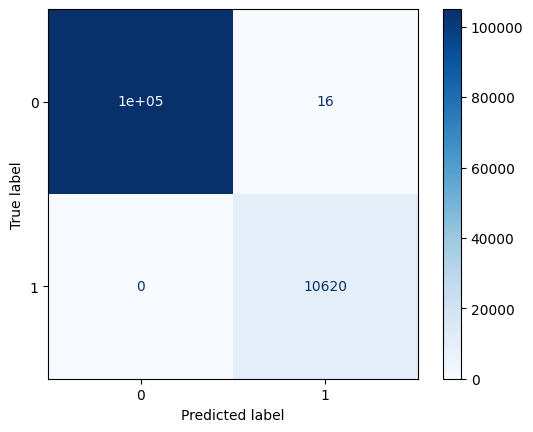

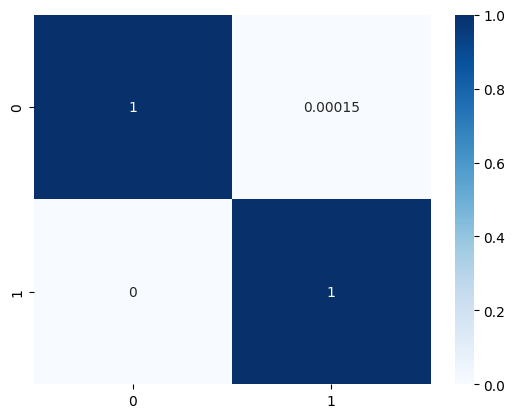

In [102]:
xgboost = dp.xgbClassifier(X_train, X_test, y_train, y_test)

xgboost.fit()

Fitting 5 folds for each of 81 candidates, totalling 405 fits


Best parameters: {'learning_rate': 0.1, 'max_depth': 5, 'max_features': None, 'n_estimators': 200}
Best Score: 0.9997654111800747
Best Estimator: GradientBoostingClassifier(max_depth=5, n_estimators=200, random_state=42) 
The accuracy score is 0.9999048656876481
 The recall score is 0.9989652901890697
 The f1 score is 0.9994823772998918
 The ROC AUC score is 0.9999476220406454

Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    105006
           1       1.00      1.00      1.00     10620

    accuracy                           1.00    115626
   macro avg       1.00      1.00      1.00    115626
weighted avg       1.00      1.00      1.00    115626


Cross validation score: [0.99843628 1.         0.99843628 0.99843628 1.         1.
 1.         0.99687256 1.         0.99843567]

Mean cross validation score: 0.9990617058270045



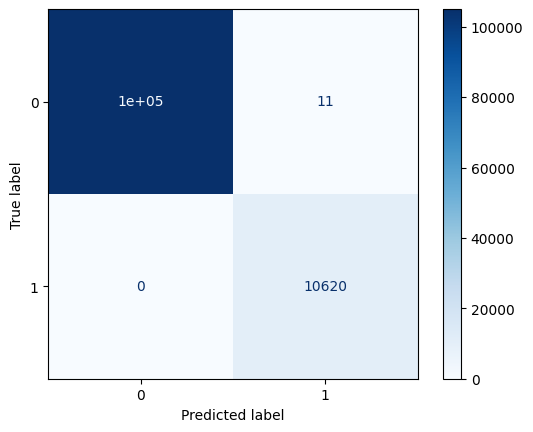

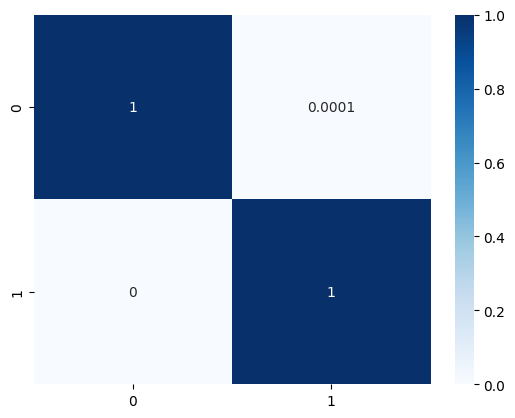

In [103]:
gb = dp.GradientBoost(X_train, X_test, y_train, y_test)

gb.fit()

Fitting 5 folds for each of 24 candidates, totalling 120 fits


c:\Users\LIR3060\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py:528: FitFailedWarning: 
60 fits failed out of a total of 120.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
60 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\LIR3060\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\LIR3060\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py", line 1382, in wrapper
    estimator._validate_params()
  File "c:\Users\LIR3060\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklear

Best parameters: {'algorithm': 'SAMME', 'learning_rate': 0.01, 'n_estimators': 50}
Best Score: 0.9996872174543743
Best Estimator: AdaBoostClassifier(algorithm='SAMME',
                   estimator=RandomForestClassifier(class_weight='balanced_subsample',
                                                    criterion='entropy',
                                                    random_state=42),
                   learning_rate=0.01, random_state=42) 


c:\Users\LIR3060\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The parameter 'algorithm' is deprecated in 1.6 and has no effect. It will be removed in version 1.8.
  warnings.warn(


The accuracy score is 0.9997578399321951
 The recall score is 0.9973703981968445
 The f1 score is 0.998683468121121
 The ROC AUC score is 0.9998666742852789

Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    105006
           1       1.00      1.00      1.00     10620

    accuracy                           1.00    115626
   macro avg       1.00      1.00      1.00    115626
weighted avg       1.00      1.00      1.00    115626




c:\Users\LIR3060\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The parameter 'algorithm' is deprecated in 1.6 and has no effect. It will be removed in version 1.8.
  warnings.warn(
c:\Users\LIR3060\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The parameter 'algorithm' is deprecated in 1.6 and has no effect. It will be removed in version 1.8.
  warnings.warn(
c:\Users\LIR3060\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The parameter 'algorithm' is deprecated in 1.6 and has no effect. It will be removed in version 1.8.
  warnings.warn(
c:\Users\LIR3060\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The parameter 'algorithm' is deprecated in 1.6 and has no effect. It will be removed in version 1.8.
  warnings.warn(


Cross validation score: [0.99843628 1.         0.99687256 0.99843628 1.         1.
 1.         0.99687256 1.         0.99687133]

Mean cross validation score: 0.9987489003170268



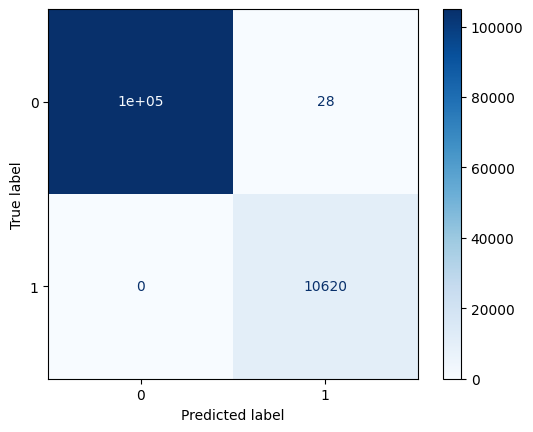

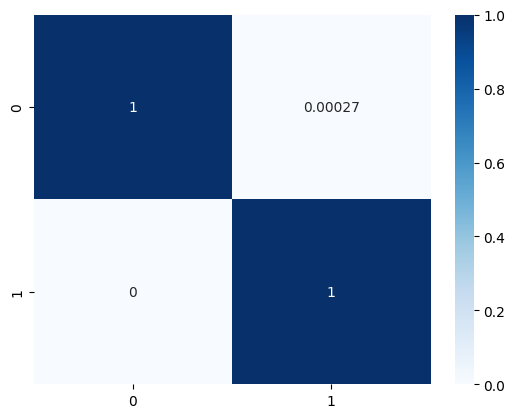

In [104]:
ada = dp.AdaBoost(X_train, X_test, y_train, y_test)

ada.fit()

Fitting 5 folds for each of 81 candidates, totalling 405 fits


c:\Users\LIR3060\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py:528: FitFailedWarning: 
270 fits failed out of a total of 405.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
270 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\LIR3060\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\LIR3060\AppData\Local\Programs\Python\Python312\Lib\site-packages\ngboost\ngboost.py", line 254, in fit
    return self.partial_fit(
           ^^^^^^^^^^^^^^^^^
  File "c:\Users\LIR3060\AppData\Local\Programs\Python\Python312

[iter 0] loss=0.6931 val_loss=0.0000 scale=256.0000 norm=512.0000
Best parameters: {'learning_rate': 0.01, 'max_depth': 3, 'minibatch_frac': 1.0, 'n_estimators': 100}
Best Score: 0.005149806701620665
Best Estimator: NGBClassifier(n_estimators=100,
              random_state=RandomState(MT19937) at 0x132F1050140) 
[iter 0] loss=0.6931 val_loss=0.0000 scale=256.0000 norm=512.0000


c:\Users\LIR3060\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\LIR3060\AppData\Local\Programs\Python\Python312\Lib\site-packages\ngboost\distns\categorical.py:12: RuntimeWarning: divide by zero encountered in log
  return -np.log(self.probs[Y, range(len(Y))])
c:\Users\LIR3060\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\LIR3060\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


The accuracy score is 0.9987632539394254
 The recall score is 0.9873476602474649
 The f1 score is 0.9933080630820347
 The ROC AUC score is 0.9990228511020787

Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    105006
           1       0.99      1.00      0.99     10620

    accuracy                           1.00    115626
   macro avg       0.99      1.00      1.00    115626
weighted avg       1.00      1.00      1.00    115626


[iter 0] loss=0.6931 val_loss=0.0000 scale=256.0000 norm=512.0000


c:\Users\LIR3060\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\LIR3060\AppData\Local\Programs\Python\Python312\Lib\site-packages\ngboost\distns\categorical.py:12: RuntimeWarning: divide by zero encountered in log
  return -np.log(self.probs[Y, range(len(Y))])
c:\Users\LIR3060\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\LIR3060\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\LIR3060\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\deprecation.py:

[iter 0] loss=0.6931 val_loss=0.0000 scale=128.0000 norm=256.0000


c:\Users\LIR3060\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\LIR3060\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\LIR3060\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\LIR3060\AppData\Local\Programs\Python\Python312\Lib\site-packages\ngboost\distns\categorical.py:12: RuntimeWarning: divide by zero encountered in log
  return -np.log(self.probs[Y, range(len(Y))])


[iter 0] loss=0.6931 val_loss=0.0000 scale=256.0000 norm=512.0000


c:\Users\LIR3060\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\LIR3060\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\LIR3060\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\LIR3060\AppData\Local\Programs\Python\Python312\Lib\site-packages\ngboost\distns\categorical.py:12: RuntimeWarning: divide by zero encountered in log
  return -np.log(self.probs[Y, range(len(Y))])


[iter 0] loss=0.6931 val_loss=0.0000 scale=256.0000 norm=512.0000


c:\Users\LIR3060\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\LIR3060\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\LIR3060\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\LIR3060\AppData\Local\Programs\Python\Python312\Lib\site-packages\ngboost\distns\categorical.py:12: RuntimeWarning: divide by zero encountered in log
  return -np.log(self.probs[Y, range(len(Y))])


[iter 0] loss=0.6931 val_loss=0.0000 scale=256.0000 norm=512.0000


c:\Users\LIR3060\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\LIR3060\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\LIR3060\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\LIR3060\AppData\Local\Programs\Python\Python312\Lib\site-packages\ngboost\distns\categorical.py:12: RuntimeWarning: divide by zero encountered in log
  return -np.log(self.probs[Y, range(len(Y))])


[iter 0] loss=0.6931 val_loss=0.0000 scale=256.0000 norm=512.0000


c:\Users\LIR3060\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\LIR3060\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\LIR3060\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\LIR3060\AppData\Local\Programs\Python\Python312\Lib\site-packages\ngboost\distns\categorical.py:12: RuntimeWarning: divide by zero encountered in log
  return -np.log(self.probs[Y, range(len(Y))])


[iter 0] loss=0.6931 val_loss=0.0000 scale=256.0000 norm=512.0000


c:\Users\LIR3060\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\LIR3060\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\LIR3060\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\LIR3060\AppData\Local\Programs\Python\Python312\Lib\site-packages\ngboost\distns\categorical.py:12: RuntimeWarning: divide by zero encountered in log
  return -np.log(self.probs[Y, range(len(Y))])


[iter 0] loss=0.6931 val_loss=0.0000 scale=256.0000 norm=512.0000


c:\Users\LIR3060\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\LIR3060\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\LIR3060\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\LIR3060\AppData\Local\Programs\Python\Python312\Lib\site-packages\ngboost\distns\categorical.py:12: RuntimeWarning: divide by zero encountered in log
  return -np.log(self.probs[Y, range(len(Y))])


[iter 0] loss=0.6931 val_loss=0.0000 scale=256.0000 norm=512.0000


c:\Users\LIR3060\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\LIR3060\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\LIR3060\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\LIR3060\AppData\Local\Programs\Python\Python312\Lib\site-packages\ngboost\distns\categorical.py:12: RuntimeWarning: divide by zero encountered in log
  return -np.log(self.probs[Y, range(len(Y))])


[iter 0] loss=0.6931 val_loss=0.0000 scale=256.0000 norm=512.0000
Cross validation score: [0.99687256 0.99843628 0.99374511 0.99374511 0.99530884 0.99374511
 0.99530884 0.98905395 0.99217833 0.99374267]

Mean cross validation score: 0.9942136792608662



c:\Users\LIR3060\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\LIR3060\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


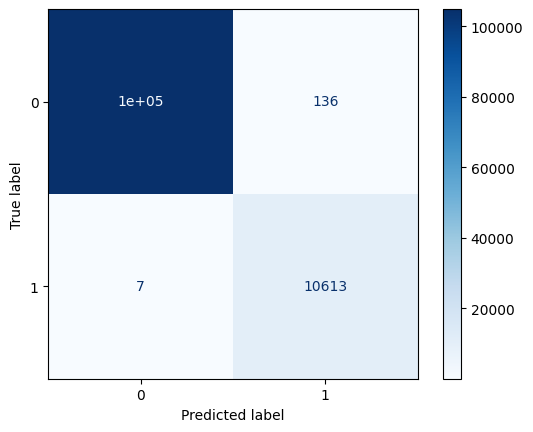

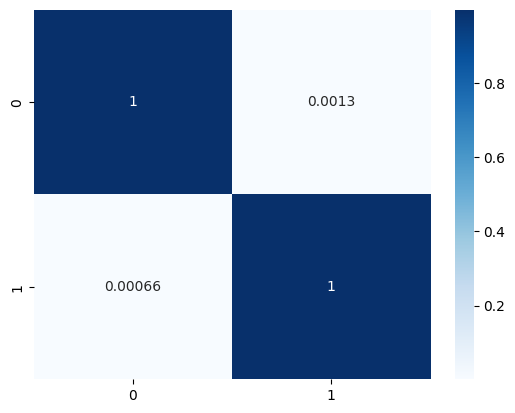

In [105]:
ngb = dp.ngboost(X_train, X_test, y_train, y_test)

ngb.fit()

The accuracy score is 0.9972929963848961
 The recall score is 0.9720619217733809
 The f1 score is 0.9854668709662442
 The ROC AUC score is 0.9981710542017992

Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    105006
           1       0.97      1.00      0.99     10620

    accuracy                           1.00    115626
   macro avg       0.99      1.00      0.99    115626
weighted avg       1.00      1.00      1.00    115626


Cross validation score: [1.         0.98905395 0.99061767 0.99218139 0.99061767 0.99061767
 0.99530884 0.99061767 0.99687133 0.98904967]

Mean cross validation score: 0.9924935854375668



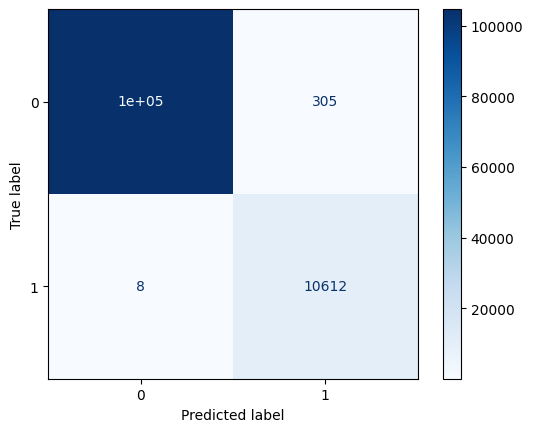

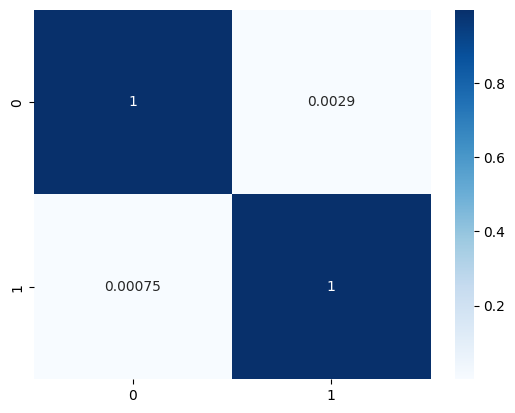

In [106]:
mlp = dp.ANN(X_train, X_test, y_train, y_test)

mlp.fit()

#### Imbalanced data

In [107]:
df= pd.read_csv('C:\\Users\\LIR3060\\Desktop\\Patricio\\NEO\\NEO\\API_test\\CSV\\neo_data_copy1.csv')
df = dp.OverallProcessor(df).clean()
df.shape

(578127, 12)

In [108]:
spt = dp.scalesplit(df)

X_train, X_test, y_train, y_test = spt.ttsplitimbalance()

X_train

array([[-0.9260489 ,  0.08002784,  0.08002784, ..., -0.77830933,
         0.03010939,  0.08002784],
       [ 0.38503235, -0.23044022, -0.23044022, ...,  0.93797495,
         0.2398473 , -0.23044022],
       [-0.50596085, -0.08237192, -0.08237192, ...,  1.57271739,
         1.43185442, -0.08237192],
       ...,
       [ 0.08012974, -0.19818311, -0.19818311, ..., -0.45177327,
        -0.2595003 , -0.19818311],
       [-0.28914121, -0.13620257, -0.13620257, ..., -1.34170359,
        -0.15269353, -0.13620257],
       [ 0.77463014, -0.25626521, -0.25626521, ...,  0.34406635,
        -0.58690217, -0.25626521]])

In [109]:
samplesize = 0.3


X_train, _, y_train, _, = train_test_split(X_train, y_train, train_size= samplesize, stratify=y_train, random_state=42)

print(len(X_train), len(y_train))

138750 138750


##### Models

c:\Users\LIR3060\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py:528: FitFailedWarning: 
1800 fits failed out of a total of 2880.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
197 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\LIR3060\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\LIR3060\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py", line 1382, in wrapper
    estimator._validate_params()
  File "c:\Users\LIR3060\AppData\Local\Programs\Python\Python312\Lib\site-packages\sk

Best parameters: {'C': 0.01, 'fit_intercept': True, 'n_jobs': 8, 'penalty': 'l2', 'random_state': 0, 'solver': 'newton-cholesky', 'warm_start': True}
Best Score: 0.9651387387387388
Best Estimator: LogisticRegression(C=0.01, n_jobs=8, random_state=0, solver='newton-cholesky',
                   warm_start=True) 
The accuracy score is 0.9648435472990504
 The recall score is 0.8688801350590883
 The f1 score is 0.7915918995129454
 The ROC AUC score is 0.8579178580163996

Classification Report: 
               precision    recall  f1-score   support

           0       0.97      0.99      0.98    105006
           1       0.87      0.73      0.79     10620

    accuracy                           0.96    115626
   macro avg       0.92      0.86      0.89    115626
weighted avg       0.96      0.96      0.96    115626


Cross validation score: [0.5888944  0.57884821 0.58746072 0.59693448 0.5719582  0.56765194
 0.58143196 0.59607323 0.59348948 0.58487696]

Mean cross validation score: 0.584761

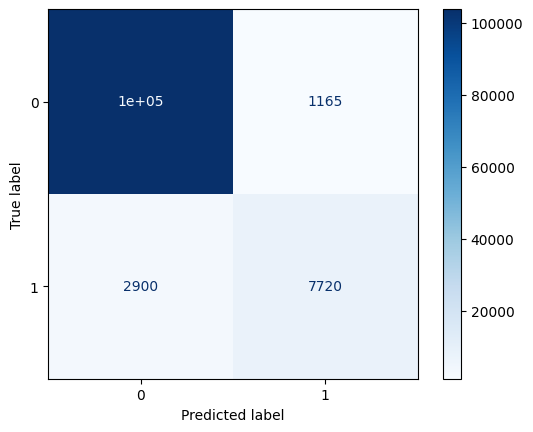

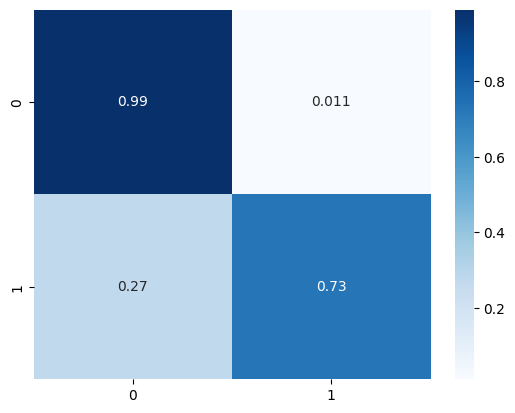

In [110]:
log_reg = dp.LogRegression(X_train, X_test, y_train, y_test)

log_reg.fit()

Fitting 5 folds for each of 270 candidates, totalling 1350 fits
Best parameters: {'alpha': 0.001, 'eta0': 0.01, 'learning_rate': 'adaptive', 'loss': 'hinge', 'penalty': 'elasticnet'}
Best Score: 0.9662702702702702
Best Estimator: SGDClassifier(alpha=0.001, eta0=0.01, learning_rate='adaptive',
              penalty='elasticnet', random_state=42) 
The accuracy score is 0.9664435334613323
 The recall score is 0.8531754349193041
 The f1 score is 0.8075587739311576
 The ROC AUC score is 0.8766152049853273

Classification Report: 
               precision    recall  f1-score   support

           0       0.98      0.99      0.98    105006
           1       0.85      0.77      0.81     10620

    accuracy                           0.97    115626
   macro avg       0.91      0.88      0.89    115626
weighted avg       0.97      0.97      0.97    115626


Cross validation score: [0.59578926 0.58143196 0.59004447 0.61157575 0.59435073 0.57454195
 0.60296324 0.61329825 0.60468574 0.59607323]

Me

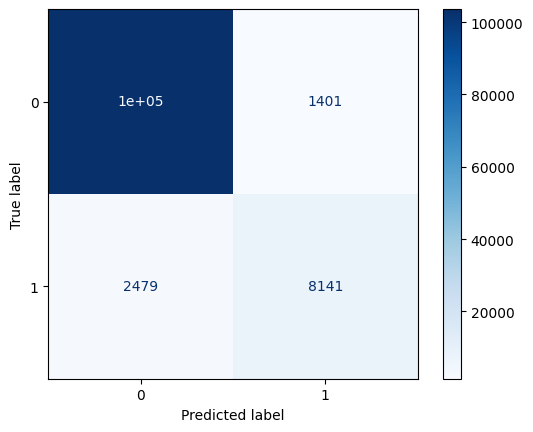

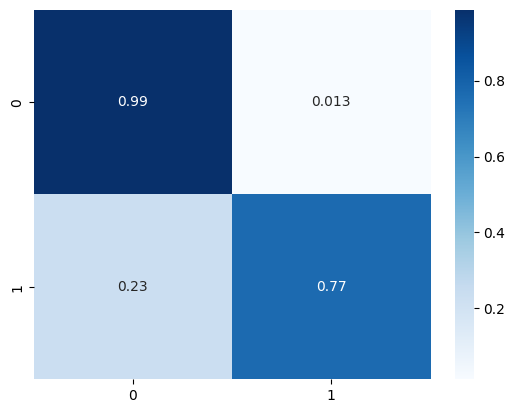

In [118]:
svm = dp.supportvm(X_train, X_test, y_train, y_test)

svm.fit()

Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters: {'bootstrap': True, 'criterion': 'gini', 'max_features': 'sqrt'}
Best Score: 0.9999783783783783
Best Estimator: RandomForestClassifier(random_state=42) 
The accuracy score is 1.0
 The recall score is 1.0
 The f1 score is 1.0
 The ROC AUC score is 1.0

Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    105006
           1       1.00      1.00      1.00     10620

    accuracy                           1.00    115626
   macro avg       1.00      1.00      1.00    115626
weighted avg       1.00      1.00      1.00    115626


Cross validation score: [0.99827629 1.         1.         1.         1.         1.
 1.         1.         1.         0.99913875]

Mean cross validation score: 0.9997415035701055



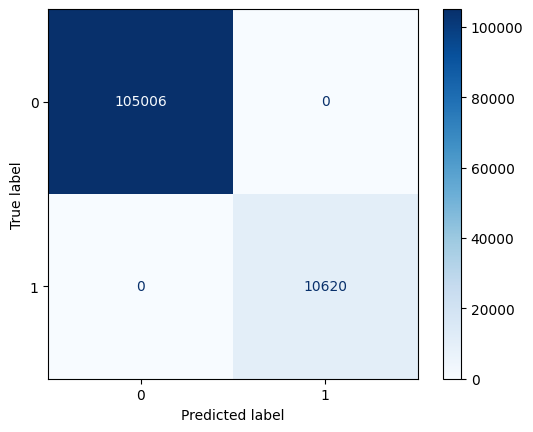

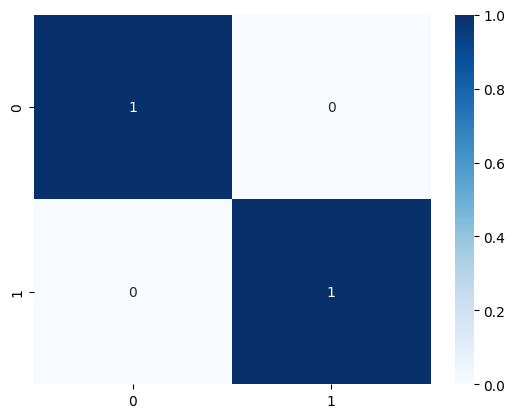

In [112]:
random_forest = dp.RandomForest(X_train, X_test, y_train, y_test)

random_forest.fit()

Fitting 5 folds for each of 243 candidates, totalling 1215 fits
Best parameters: {'gamma': 0.1, 'learning_rate': 0.2, 'max_depth': 5, 'min_child_weight': 3, 'n_estimators': 100}
Best Score: 0.9999783783783783
Best Estimator: XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0.1, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.2, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=3, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...) 
The accuracy score is 1.0
 

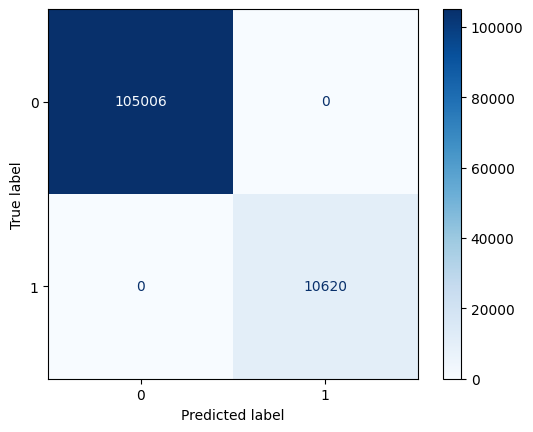

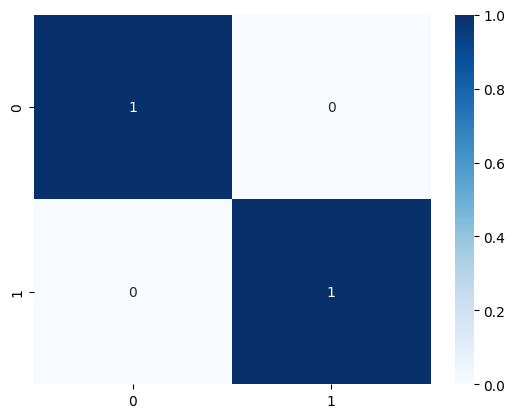

In [113]:
xgboost = dp.xgbClassifier(X_train, X_test, y_train, y_test)

xgboost.fit()

Fitting 5 folds for each of 81 candidates, totalling 405 fits
Best parameters: {'learning_rate': 0.1, 'max_depth': 5, 'max_features': 'sqrt', 'n_estimators': 200}
Best Score: 0.9999783783783783
Best Estimator: GradientBoostingClassifier(max_depth=5, max_features='sqrt', n_estimators=200,
                           random_state=42) 
The accuracy score is 1.0
 The recall score is 1.0
 The f1 score is 1.0
 The ROC AUC score is 1.0

Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    105006
           1       1.00      1.00      1.00     10620

    accuracy                           1.00    115626
   macro avg       1.00      1.00      1.00    115626
weighted avg       1.00      1.00      1.00    115626


Cross validation score: [1.         1.         1.         1.         1.         1.
 1.         1.         0.99913875 0.99913875]

Mean cross validation score: 0.9998277497777195



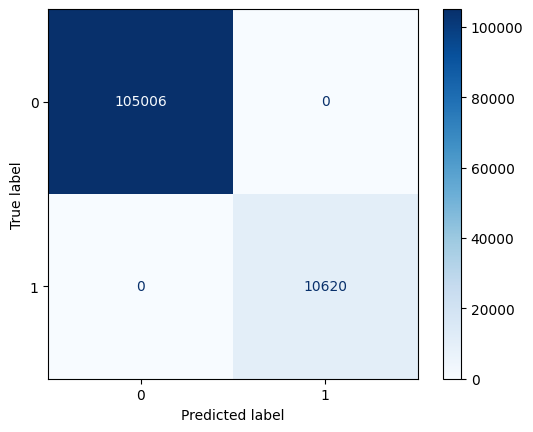

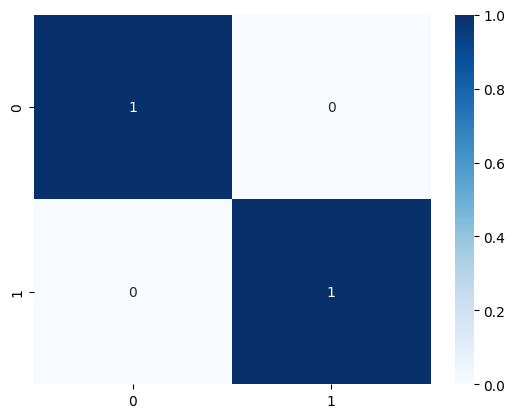

In [114]:
gb = dp.GradientBoost(X_train, X_test, y_train, y_test)

gb.fit()

Fitting 5 folds for each of 24 candidates, totalling 120 fits


c:\Users\LIR3060\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py:528: FitFailedWarning: 
60 fits failed out of a total of 120.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
60 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\LIR3060\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\LIR3060\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py", line 1382, in wrapper
    estimator._validate_params()
  File "c:\Users\LIR3060\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklear

Best parameters: {'algorithm': 'SAMME', 'learning_rate': 0.01, 'n_estimators': 50}
Best Score: 0.9999783783783783
Best Estimator: AdaBoostClassifier(algorithm='SAMME',
                   estimator=RandomForestClassifier(class_weight='balanced_subsample',
                                                    criterion='entropy',
                                                    random_state=42),
                   learning_rate=0.01, random_state=42) 


c:\Users\LIR3060\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The parameter 'algorithm' is deprecated in 1.6 and has no effect. It will be removed in version 1.8.
  warnings.warn(


The accuracy score is 1.0
 The recall score is 1.0
 The f1 score is 1.0
 The ROC AUC score is 1.0

Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    105006
           1       1.00      1.00      1.00     10620

    accuracy                           1.00    115626
   macro avg       1.00      1.00      1.00    115626
weighted avg       1.00      1.00      1.00    115626




c:\Users\LIR3060\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The parameter 'algorithm' is deprecated in 1.6 and has no effect. It will be removed in version 1.8.
  warnings.warn(
c:\Users\LIR3060\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The parameter 'algorithm' is deprecated in 1.6 and has no effect. It will be removed in version 1.8.
  warnings.warn(
c:\Users\LIR3060\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The parameter 'algorithm' is deprecated in 1.6 and has no effect. It will be removed in version 1.8.
  warnings.warn(
c:\Users\LIR3060\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The parameter 'algorithm' is deprecated in 1.6 and has no effect. It will be removed in version 1.8.
  warnings.warn(


Cross validation score: [0.99827629 1.         1.         1.         1.         1.
 1.         0.99913875 1.         0.99913875]

Mean cross validation score: 0.9996553784589655



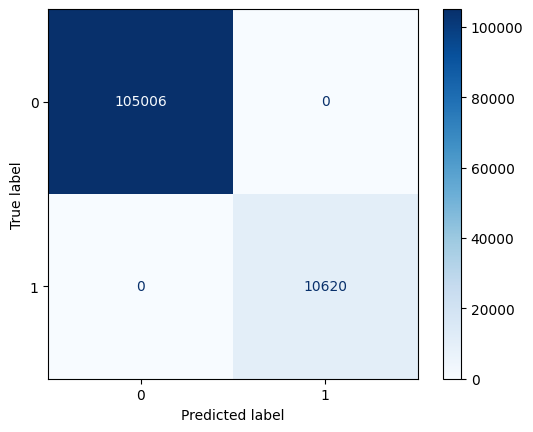

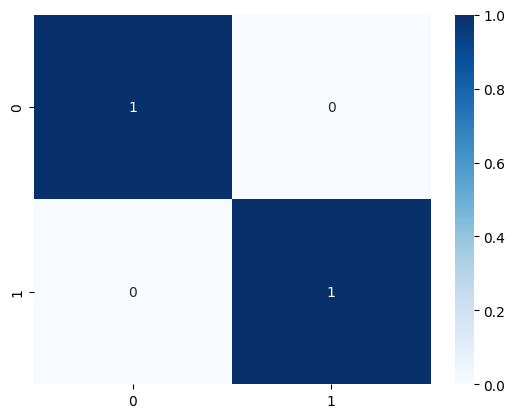

In [115]:
ada = dp.AdaBoost(X_train, X_test, y_train, y_test)

ada.fit()

Fitting 5 folds for each of 81 candidates, totalling 405 fits


c:\Users\LIR3060\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py:528: FitFailedWarning: 
270 fits failed out of a total of 405.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
270 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\LIR3060\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\LIR3060\AppData\Local\Programs\Python\Python312\Lib\site-packages\ngboost\ngboost.py", line 254, in fit
    return self.partial_fit(
           ^^^^^^^^^^^^^^^^^
  File "c:\Users\LIR3060\AppData\Local\Programs\Python\Python312

[iter 0] loss=0.3098 val_loss=0.0000 scale=32.0000 norm=64.3035
Best parameters: {'learning_rate': 0.01, 'max_depth': 7, 'minibatch_frac': 0.5, 'n_estimators': 100}
Best Score: 0.0028686299292657817
Best Estimator: NGBClassifier(minibatch_frac=0.5, n_estimators=100,
              random_state=RandomState(MT19937) at 0x132CEFFA540) 


c:\Users\LIR3060\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[iter 0] loss=0.3088 val_loss=0.0000 scale=16.0000 norm=32.0866


c:\Users\LIR3060\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\LIR3060\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


The accuracy score is 0.9988151453825265
 The recall score is 0.9898140360713952
 The f1 score is 0.9935744102059003
 The ROC AUC score is 0.9981627146191592

Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    105006
           1       0.99      1.00      0.99     10620

    accuracy                           1.00    115626
   macro avg       0.99      1.00      1.00    115626
weighted avg       1.00      1.00      1.00    115626




c:\Users\LIR3060\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[iter 0] loss=0.3086 val_loss=0.0000 scale=32.0000 norm=64.1426


c:\Users\LIR3060\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\LIR3060\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\LIR3060\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[iter 0] loss=0.3065 val_loss=0.0000 scale=16.0000 norm=31.9277


c:\Users\LIR3060\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\LIR3060\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\LIR3060\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[iter 0] loss=0.3098 val_loss=0.0000 scale=16.0000 norm=32.1550


c:\Users\LIR3060\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\LIR3060\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\LIR3060\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[iter 0] loss=0.3093 val_loss=0.0000 scale=16.0000 norm=32.1175


c:\Users\LIR3060\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\LIR3060\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\LIR3060\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[iter 0] loss=0.3086 val_loss=0.0000 scale=16.0000 norm=32.0726


c:\Users\LIR3060\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\LIR3060\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\LIR3060\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[iter 0] loss=0.3055 val_loss=0.0000 scale=16.0000 norm=31.8602


c:\Users\LIR3060\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\LIR3060\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\LIR3060\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[iter 0] loss=0.3089 val_loss=0.0000 scale=16.0000 norm=32.0950


c:\Users\LIR3060\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\LIR3060\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\LIR3060\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[iter 0] loss=0.3074 val_loss=0.0000 scale=16.0000 norm=31.9876


c:\Users\LIR3060\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\LIR3060\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\LIR3060\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[iter 0] loss=0.3042 val_loss=0.0000 scale=16.0000 norm=31.7703


c:\Users\LIR3060\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\LIR3060\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\LIR3060\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[iter 0] loss=0.3086 val_loss=0.0000 scale=32.0000 norm=64.1501
Cross validation score: [0.99051958 0.98966499 0.98363623 0.98708123 0.99224874 0.98621998
 0.98708123 0.97588497 0.99397124 0.99052624]

Mean cross validation score: 0.9876834430763468



c:\Users\LIR3060\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\LIR3060\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


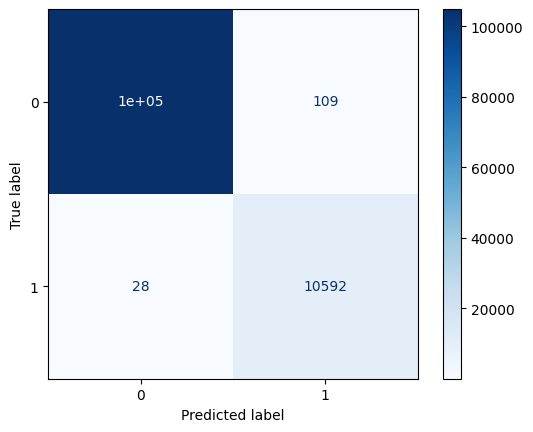

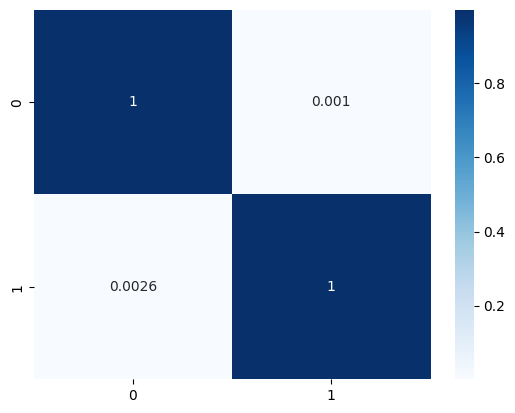

In [116]:
ngb = dp.ngboost(X_train, X_test, y_train, y_test)

ngb.fit()

The accuracy score is 0.999446491273589
 The recall score is 0.9963325183374083
 The f1 score is 0.9969888021078386
 The ROC AUC score is 0.998637271843815

Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    105006
           1       1.00      1.00      1.00     10620

    accuracy                           1.00    115626
   macro avg       1.00      1.00      1.00    115626
weighted avg       1.00      1.00      1.00    115626


Cross validation score: [0.99051958 0.99483249 0.99483249 0.99224874 0.996555   0.98449748
 0.99224874 0.996555   0.98880374 0.99483249]

Mean cross validation score: 0.9925925744113375



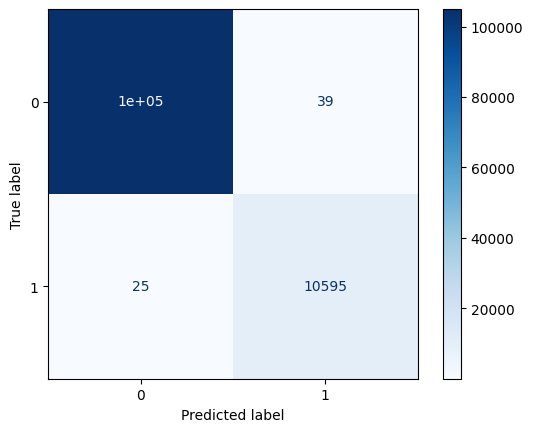

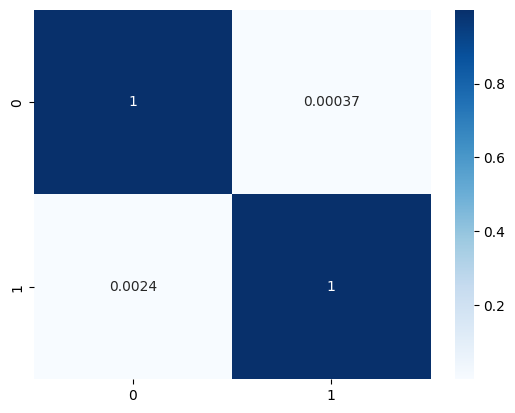

In [117]:
mlp = dp.ANN(X_train, X_test, y_train, y_test)

mlp.fit()

## 15 features

### SMOTE

In [119]:
# 15 feature Columns

df= pd.read_csv('C:\\Users\\LIR3060\\Desktop\\Patricio\\NEO\\NEO\\API_test\\CSV\\neo_data_copy1.csv')
df = dp.OverallProcessor(df).clean2()
df.drop(columns=['estimated_diameter_min', 'estimated_diameter_max', 'estimated_diameter_average'], inplace=True)
df

absolute_magnitude_h  is_hazardous  \
0                      10.41         False   
1                      10.41         False   
2                      10.41         False   
3                      10.41         False   
4                      10.41         False   
...                      ...           ...   
578122                 27.20         False   
578123                 27.20         False   
578124                 27.20         False   
578125                 24.40         False   
578126                 24.70         False   

       relative_velocity.kilometers_per_hour miss_distance.kilometers  \
0                           20083.0290749201       47112732.928149391   
1                           15820.1671985367       70533232.893794475   
2                           17340.4224662258        74687814.59975122   
3                            16545.797587763       53823292.394218643   
4                           21314.9467227704       26040971.835879446   
...                                      ...                      ...   
578122                       64049.911353063       55282851.373088847   
578123                      77378.0309800207       72717145.716631047   
578124                      52630.8755216234       60176184.431457778   
578125                       37385.846126019       14406560.897167653   
578126                      27254.9622379911       11215502.674719137   

        orbit_uncertainty  minimum_orbit_intersection  \
0                     0.0                    0.150230   
1                     0.0                    0.150230   
2                     0.0                    0.150230   
3                     0.0                    0.150230   
4                     0.0                    0.150230   
...                   ...                         ...   
578122                7.0                    0.010702   
578123                7.0                    0.010702   
578124                7.0                    0.010702   
578125                8.0                    0.021228   
578126                8.0                    0.074547   

        jupiter_tisserand_invariant  eccentricity  semi_major_axis  \
0                             4.582      0.222691         1.458181   
1                             4.582      0.222691         1.458181   
2                             4.582      0.222691         1.458181   
3                             4.582      0.222691         1.458181   
4                             4.582      0.222691         1.458181   
...                             ...           ...              ...   
578122                        7.181      0.286677         0.808391   
578123                        7.181      0.286677         0.808391   
578124                        7.181      0.286677         0.808391   
578125                        3.239      0.586524         2.442817   
578126                        3.577      0.496382         2.094172   

        inclination  ascending_node_longitude  perihelion_distance  \
0         10.827726                304.274344             1.133458   
1         10.827726                304.274344             1.133458   
2         10.827726                304.274344             1.133458   
3         10.827726                304.274344             1.133458   
4         10.827726                304.274344             1.133458   
...             ...                       ...                  ...   
578122     9.746538                 37.258020             0.576644   
578123     9.746538                 37.258020             0.576644   
578124     9.746538                 37.258020             0.576644   
578125     2.563493                192.217433             1.010046   
578126     7.511947                 35.576023             1.054663   

        perihelion_argument  aphelion_distance  perihelion_time  mean_anomaly  
0                178.910291           1.782905     2.460446e+06     86.667551  
1                178.910291           1.782905     

In [120]:
spt = dp.scalesplit(df)

X_train, X_test, y_train, y_test = spt.ttsplitsmote()

X_train

array([[-0.9260489 , -0.37053054, -0.43885269, ...,  0.03010939,
         0.48983262,  0.83475809],
       [ 0.38503235, -0.835229  , -0.85237111, ...,  0.2398473 ,
         0.0398893 , -1.41451704],
       [-0.50596085, -0.96812133, -0.10993791, ...,  1.43185442,
         0.00284088, -1.51065223],
       ...,
       [-0.71261707,  1.46421261,  0.7227587 , ...,  1.15197947,
        -0.72076007, -0.56862503],
       [-0.70922926,  0.05872992, -0.36229798, ...,  1.07719683,
        -1.10986025, -0.04261845],
       [-0.53983892, -0.58537139,  0.4974969 , ..., -0.16585455,
        -0.05834128, -1.02386394]])

In [121]:
samplesize = 0.3


X_train, _, y_train, _, = train_test_split(X_train, y_train, train_size= samplesize, stratify=y_train, random_state=42)

print(len(X_train), len(y_train))

251922 251922


#### models

c:\Users\LIR3060\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py:528: FitFailedWarning: 
1800 fits failed out of a total of 2880.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
75 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\LIR3060\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\LIR3060\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py", line 1382, in wrapper
    estimator._validate_params()
  File "c:\Users\LIR3060\AppData\Local\Programs\Python\Python312\Lib\site-packages\skl

Best parameters: {'C': 0.01, 'fit_intercept': True, 'n_jobs': 8, 'penalty': 'l1', 'random_state': 42, 'solver': 'liblinear', 'warm_start': True}
Best Score: 0.9589992140700788
Best Estimator: LogisticRegression(C=0.01, n_jobs=8, penalty='l1', random_state=42,
                   solver='liblinear', warm_start=True) 
The accuracy score is 0.9412761835573314
 The recall score is 0.612806314797361
 The f1 score is 0.7539498478040295
 The ROC AUC score is 0.9584852159645223

Classification Report: 
               precision    recall  f1-score   support

           0       1.00      0.94      0.97    105006
           1       0.61      0.98      0.75     10620

    accuracy                           0.94    115626
   macro avg       0.81      0.96      0.86    115626
weighted avg       0.96      0.94      0.95    115626


Cross validation score: [0.8272536  0.83566864 0.83296285 0.83677358 0.83280406 0.83518577
 0.83550333 0.8488409  0.83629724 0.8382026 ]

Mean cross validation score: 0.835

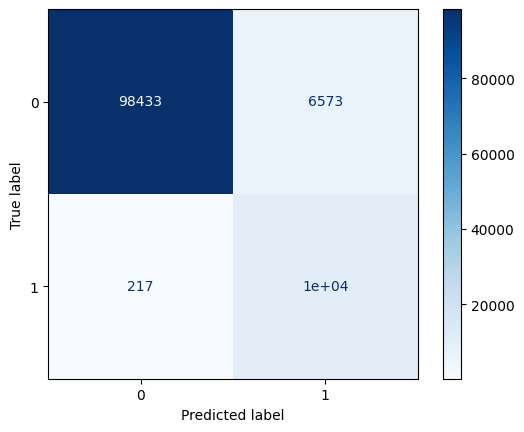

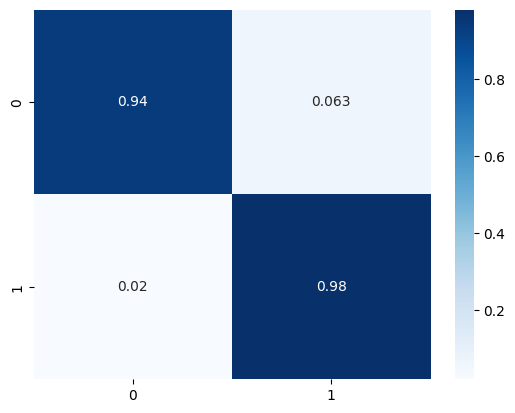

In [122]:
log_reg = dp.LogRegression(X_train, X_test, y_train, y_test)

log_reg.fit()

Fitting 5 folds for each of 270 candidates, totalling 1350 fits
Best parameters: {'alpha': 0.001, 'eta0': 0.1, 'learning_rate': 'adaptive', 'loss': 'log_loss', 'penalty': 'l1'}
Best Score: 0.9588682197886058
Best Estimator: SGDClassifier(alpha=0.001, eta0=0.1, learning_rate='adaptive', loss='log_loss',
              penalty='l1', random_state=42) 
The accuracy score is 0.94070537768322
 The recall score is 0.61031652989449
 The f1 score is 0.7523121387283237
 The ROC AUC score is 0.9585518223279359

Classification Report: 
               precision    recall  f1-score   support

           0       1.00      0.94      0.97    105006
           1       0.61      0.98      0.75     10620

    accuracy                           0.94    115626
   macro avg       0.80      0.96      0.86    115626
weighted avg       0.96      0.94      0.95    115626


Cross validation score: [0.82471321 0.83503354 0.83264528 0.83693236 0.83058114 0.83486821
 0.83645602 0.85138139 0.82946967 0.83645602]

Mean

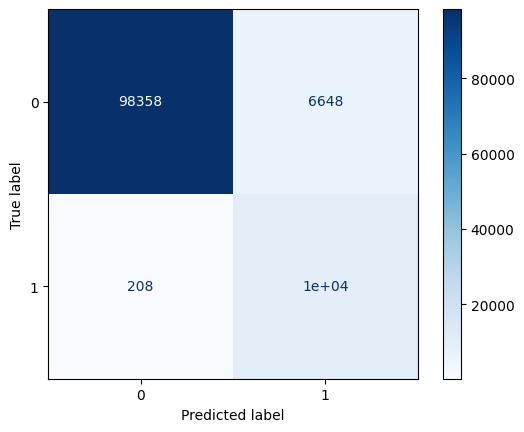

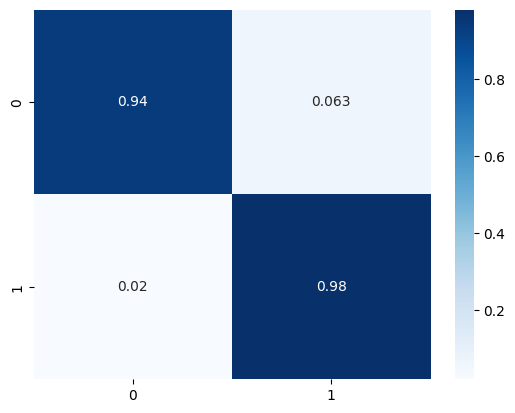

In [123]:
svm = dp.supportvm(X_train, X_test, y_train, y_test)

svm.fit()

Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters: {'bootstrap': True, 'criterion': 'gini', 'max_features': 'sqrt'}
Best Score: 0.999988091615173
Best Estimator: RandomForestClassifier(random_state=42) 
The accuracy score is 1.0
 The recall score is 1.0
 The f1 score is 1.0
 The ROC AUC score is 1.0

Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    105006
           1       1.00      1.00      1.00     10620

    accuracy                           1.00    115626
   macro avg       1.00      1.00      1.00    115626
weighted avg       1.00      1.00      1.00    115626


Cross validation score: [1.         0.99984123 1.         0.99984122 1.         1.
 1.         0.99984122 1.         1.        ]

Mean cross validation score: 0.999952366460654



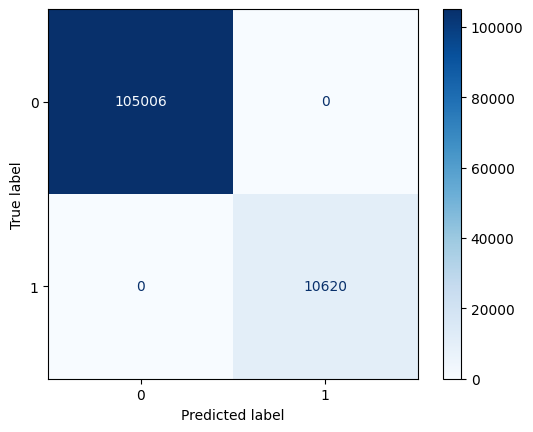

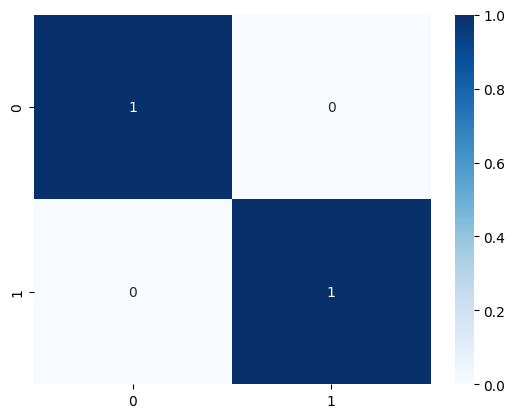

In [124]:
random_forest = dp.RandomForest(X_train, X_test, y_train, y_test)

random_forest.fit()

Fitting 5 folds for each of 243 candidates, totalling 1215 fits
Best parameters: {'gamma': 0, 'learning_rate': 0.1, 'max_depth': 7, 'min_child_weight': 1, 'n_estimators': 100}
Best Score: 0.9999960304858686
Best Estimator: XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=7, max_leaves=None,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...) 
The accuracy score is 1.0
 The 

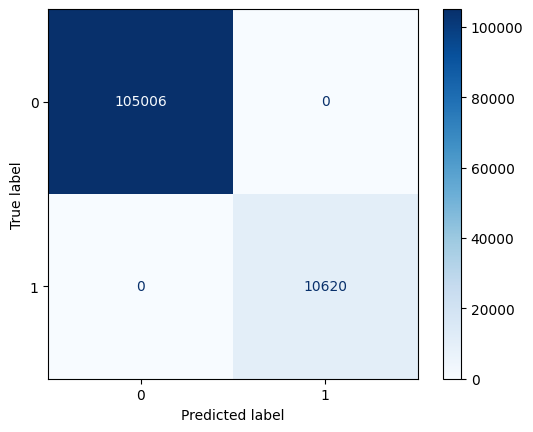

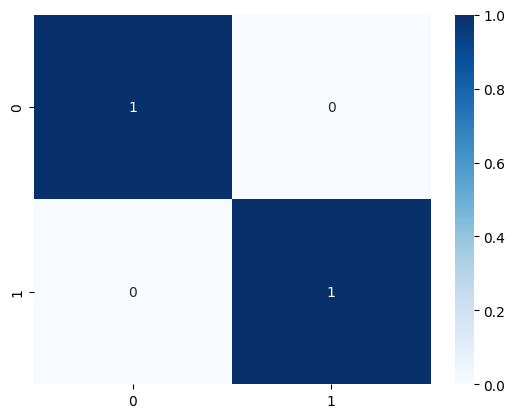

In [125]:
xgboost = dp.xgbClassifier(X_train, X_test, y_train, y_test)

xgboost.fit()

Fitting 5 folds for each of 81 candidates, totalling 405 fits
Best parameters: {'learning_rate': 0.1, 'max_depth': 7, 'max_features': 'sqrt', 'n_estimators': 200}
Best Score: 0.9999920610505206
Best Estimator: GradientBoostingClassifier(max_depth=7, max_features='sqrt', n_estimators=200,
                           random_state=42) 
The accuracy score is 1.0
 The recall score is 1.0
 The f1 score is 1.0
 The ROC AUC score is 1.0

Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    105006
           1       1.00      1.00      1.00     10620

    accuracy                           1.00    115626
   macro avg       1.00      1.00      1.00    115626
weighted avg       1.00      1.00      1.00    115626


Cross validation score: [1.         0.99984123 1.         0.99984122 1.         1.
 1.         0.99984122 1.         1.        ]

Mean cross validation score: 0.999952366460654



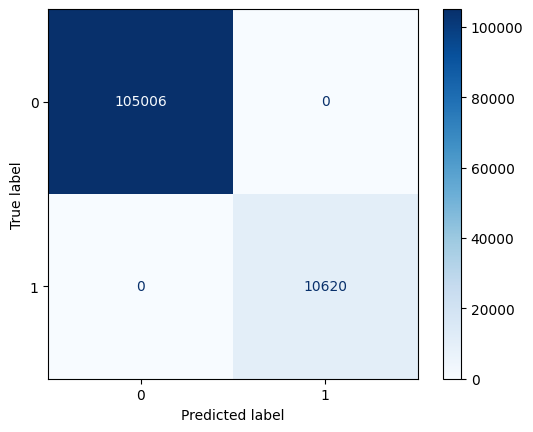

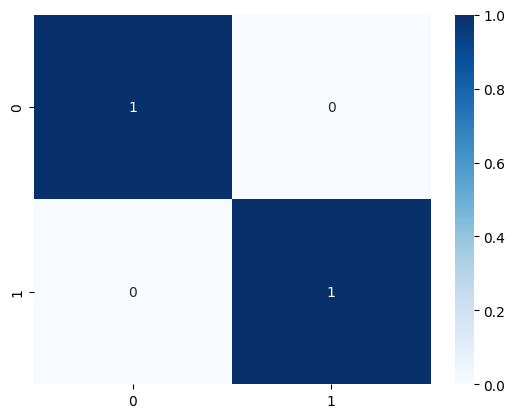

In [126]:
gb = dp.GradientBoost(X_train, X_test, y_train, y_test)

gb.fit()

Fitting 5 folds for each of 24 candidates, totalling 120 fits


c:\Users\LIR3060\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py:528: FitFailedWarning: 
60 fits failed out of a total of 120.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
60 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\LIR3060\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\LIR3060\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py", line 1382, in wrapper
    estimator._validate_params()
  File "c:\Users\LIR3060\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklear

Best parameters: {'algorithm': 'SAMME', 'learning_rate': 0.01, 'n_estimators': 50}
Best Score: 0.999988091615173
Best Estimator: AdaBoostClassifier(algorithm='SAMME',
                   estimator=RandomForestClassifier(class_weight='balanced_subsample',
                                                    criterion='entropy',
                                                    random_state=42),
                   learning_rate=0.01, random_state=42) 


c:\Users\LIR3060\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The parameter 'algorithm' is deprecated in 1.6 and has no effect. It will be removed in version 1.8.
  warnings.warn(


The accuracy score is 1.0
 The recall score is 1.0
 The f1 score is 1.0
 The ROC AUC score is 1.0

Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    105006
           1       1.00      1.00      1.00     10620

    accuracy                           1.00    115626
   macro avg       1.00      1.00      1.00    115626
weighted avg       1.00      1.00      1.00    115626




c:\Users\LIR3060\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The parameter 'algorithm' is deprecated in 1.6 and has no effect. It will be removed in version 1.8.
  warnings.warn(
c:\Users\LIR3060\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The parameter 'algorithm' is deprecated in 1.6 and has no effect. It will be removed in version 1.8.
  warnings.warn(
c:\Users\LIR3060\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The parameter 'algorithm' is deprecated in 1.6 and has no effect. It will be removed in version 1.8.
  warnings.warn(
c:\Users\LIR3060\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The parameter 'algorithm' is deprecated in 1.6 and has no effect. It will be removed in version 1.8.
  warnings.warn(


Cross validation score: [1.         0.99984123 1.         0.99984122 1.         1.
 1.         0.99984122 1.         1.        ]

Mean cross validation score: 0.999952366460654



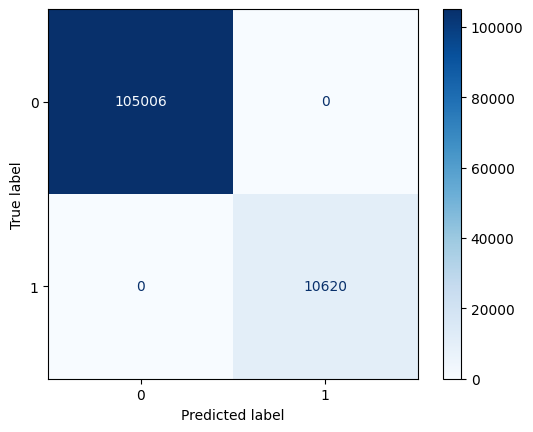

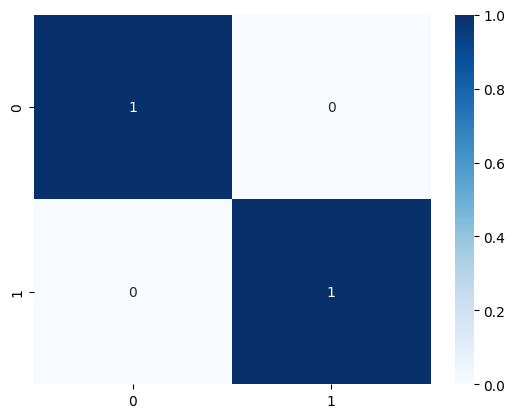

In [127]:
ada = dp.AdaBoost(X_train, X_test, y_train, y_test)

ada.fit()

Fitting 5 folds for each of 81 candidates, totalling 405 fits


c:\Users\LIR3060\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py:528: FitFailedWarning: 
270 fits failed out of a total of 405.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
270 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\LIR3060\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\LIR3060\AppData\Local\Programs\Python\Python312\Lib\site-packages\ngboost\ngboost.py", line 254, in fit
    return self.partial_fit(
           ^^^^^^^^^^^^^^^^^
  File "c:\Users\LIR3060\AppData\Local\Programs\Python\Python312

[iter 0] loss=0.6931 val_loss=0.0000 scale=256.0000 norm=512.0000
Best parameters: {'learning_rate': 0.01, 'max_depth': 3, 'minibatch_frac': 0.7, 'n_estimators': 100}
Best Score: 0.003225239500203682
Best Estimator: NGBClassifier(minibatch_frac=0.7, n_estimators=100,
              random_state=RandomState(MT19937) at 0x132CEFFA240) 


c:\Users\LIR3060\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\LIR3060\AppData\Local\Programs\Python\Python312\Lib\site-packages\ngboost\distns\categorical.py:12: RuntimeWarning: divide by zero encountered in log
  return -np.log(self.probs[Y, range(len(Y))])


[iter 0] loss=0.6931 val_loss=0.0000 scale=256.0000 norm=512.0000


c:\Users\LIR3060\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\LIR3060\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


The accuracy score is 0.9987286596440247
 The recall score is 0.9869803775690505
 The f1 score is 0.9931221634772844
 The ROC AUC score is 0.9990038045714041

Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    105006
           1       0.99      1.00      0.99     10620

    accuracy                           1.00    115626
   macro avg       0.99      1.00      1.00    115626
weighted avg       1.00      1.00      1.00    115626




c:\Users\LIR3060\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\LIR3060\AppData\Local\Programs\Python\Python312\Lib\site-packages\ngboost\distns\categorical.py:12: RuntimeWarning: divide by zero encountered in log
  return -np.log(self.probs[Y, range(len(Y))])


[iter 0] loss=0.6931 val_loss=0.0000 scale=256.0000 norm=512.0000


c:\Users\LIR3060\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\LIR3060\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\LIR3060\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\LIR3060\AppData\Local\Programs\Python\Python312\Lib\site-packages\ngboost\distns\categorical.py:12: RuntimeWarning: divide by zero encountered in log
  return -np.log(self.probs[Y, range(len(Y))])


[iter 0] loss=0.6931 val_loss=0.0000 scale=256.0000 norm=512.0000


c:\Users\LIR3060\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\LIR3060\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\LIR3060\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\LIR3060\AppData\Local\Programs\Python\Python312\Lib\site-packages\ngboost\distns\categorical.py:12: RuntimeWarning: divide by zero encountered in log
  return -np.log(self.probs[Y, range(len(Y))])


[iter 0] loss=0.6931 val_loss=0.0000 scale=256.0000 norm=512.0000


c:\Users\LIR3060\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\LIR3060\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\LIR3060\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\LIR3060\AppData\Local\Programs\Python\Python312\Lib\site-packages\ngboost\distns\categorical.py:12: RuntimeWarning: divide by zero encountered in log
  return -np.log(self.probs[Y, range(len(Y))])


[iter 0] loss=0.6931 val_loss=0.0000 scale=256.0000 norm=512.0000


c:\Users\LIR3060\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\LIR3060\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\LIR3060\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\LIR3060\AppData\Local\Programs\Python\Python312\Lib\site-packages\ngboost\distns\categorical.py:12: RuntimeWarning: divide by zero encountered in log
  return -np.log(self.probs[Y, range(len(Y))])


[iter 0] loss=0.6931 val_loss=0.0000 scale=256.0000 norm=512.0000


c:\Users\LIR3060\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\LIR3060\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\LIR3060\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\LIR3060\AppData\Local\Programs\Python\Python312\Lib\site-packages\ngboost\distns\categorical.py:12: RuntimeWarning: divide by zero encountered in log
  return -np.log(self.probs[Y, range(len(Y))])


[iter 0] loss=0.6931 val_loss=0.0000 scale=256.0000 norm=512.0000


c:\Users\LIR3060\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\LIR3060\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\LIR3060\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\LIR3060\AppData\Local\Programs\Python\Python312\Lib\site-packages\ngboost\distns\categorical.py:12: RuntimeWarning: divide by zero encountered in log
  return -np.log(self.probs[Y, range(len(Y))])


[iter 0] loss=0.6931 val_loss=0.0000 scale=256.0000 norm=512.0000


c:\Users\LIR3060\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\LIR3060\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\LIR3060\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\LIR3060\AppData\Local\Programs\Python\Python312\Lib\site-packages\ngboost\distns\categorical.py:12: RuntimeWarning: divide by zero encountered in log
  return -np.log(self.probs[Y, range(len(Y))])


[iter 0] loss=0.6931 val_loss=0.0000 scale=256.0000 norm=512.0000


c:\Users\LIR3060\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\LIR3060\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\LIR3060\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\LIR3060\AppData\Local\Programs\Python\Python312\Lib\site-packages\ngboost\distns\categorical.py:12: RuntimeWarning: divide by zero encountered in log
  return -np.log(self.probs[Y, range(len(Y))])


[iter 0] loss=0.6931 val_loss=0.0000 scale=256.0000 norm=512.0000


c:\Users\LIR3060\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\LIR3060\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\LIR3060\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\LIR3060\AppData\Local\Programs\Python\Python312\Lib\site-packages\ngboost\distns\categorical.py:12: RuntimeWarning: divide by zero encountered in log
  return -np.log(self.probs[Y, range(len(Y))])


[iter 0] loss=0.6931 val_loss=0.0000 scale=256.0000 norm=512.0000


c:\Users\LIR3060\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\LIR3060\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Cross validation score: [0.99555432 0.99650697 0.99603049 0.99618927 0.99618927 0.99682439
 0.99491902 0.99539536 0.99571292 0.99618927]

Mean cross validation score: 0.9959511270974835



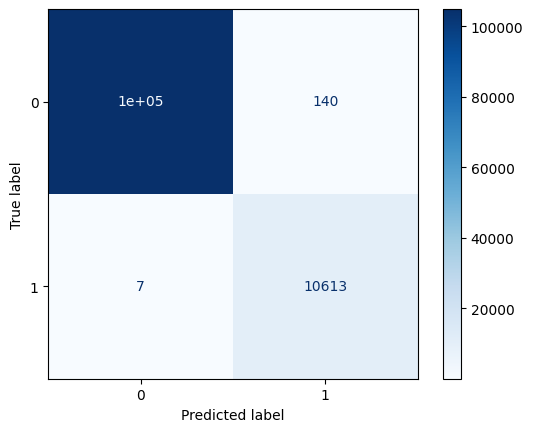

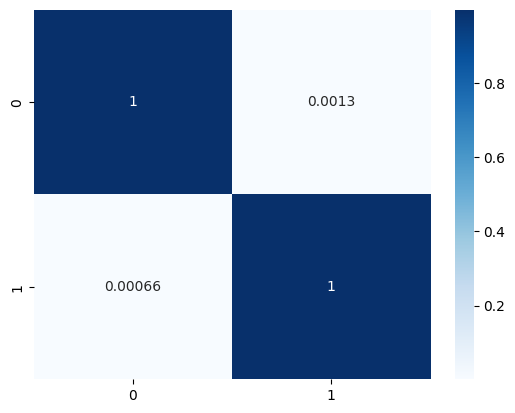

In [128]:
ngb = dp.ngboost(X_train, X_test, y_train, y_test)

ngb.fit()

The accuracy score is 0.9999394599830488
 The recall score is 0.9994352941176471
 The f1 score is 0.999670510708402
 The ROC AUC score is 0.999924349224704

Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    105006
           1       1.00      1.00      1.00     10620

    accuracy                           1.00    115626
   macro avg       1.00      1.00      1.00    115626
weighted avg       1.00      1.00      1.00    115626


Cross validation score: [0.99920613 0.99968245 0.99984122 0.99984122 1.         1.
 0.99952366 0.99952366 0.99936488 0.9992061 ]

Mean cross validation score: 0.9996189310550004



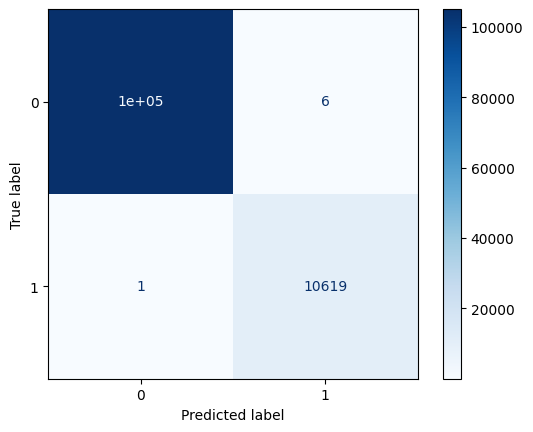

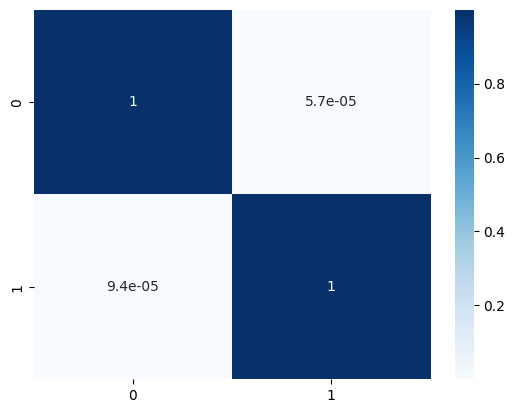

In [129]:
mlp = dp.ANN(X_train, X_test, y_train, y_test)

mlp.fit()

### ADASYN

In [130]:
# 15 feature Columns

df= pd.read_csv('C:\\Users\\LIR3060\\Desktop\\Patricio\\NEO\\NEO\\API_test\\CSV\\neo_data_copy1.csv')
df = dp.OverallProcessor(df).clean2()
df.drop(columns=['estimated_diameter_min', 'estimated_diameter_max', 'estimated_diameter_average'], inplace=True)
df

absolute_magnitude_h  is_hazardous  \
0                      10.41         False   
1                      10.41         False   
2                      10.41         False   
3                      10.41         False   
4                      10.41         False   
...                      ...           ...   
578122                 27.20         False   
578123                 27.20         False   
578124                 27.20         False   
578125                 24.40         False   
578126                 24.70         False   

       relative_velocity.kilometers_per_hour miss_distance.kilometers  \
0                           20083.0290749201       47112732.928149391   
1                           15820.1671985367       70533232.893794475   
2                           17340.4224662258        74687814.59975122   
3                            16545.797587763       53823292.394218643   
4                           21314.9467227704       26040971.835879446   
...                                      ...                      ...   
578122                       64049.911353063       55282851.373088847   
578123                      77378.0309800207       72717145.716631047   
578124                      52630.8755216234       60176184.431457778   
578125                       37385.846126019       14406560.897167653   
578126                      27254.9622379911       11215502.674719137   

        orbit_uncertainty  minimum_orbit_intersection  \
0                     0.0                    0.150230   
1                     0.0                    0.150230   
2                     0.0                    0.150230   
3                     0.0                    0.150230   
4                     0.0                    0.150230   
...                   ...                         ...   
578122                7.0                    0.010702   
578123                7.0                    0.010702   
578124                7.0                    0.010702   
578125                8.0                    0.021228   
578126                8.0                    0.074547   

        jupiter_tisserand_invariant  eccentricity  semi_major_axis  \
0                             4.582      0.222691         1.458181   
1                             4.582      0.222691         1.458181   
2                             4.582      0.222691         1.458181   
3                             4.582      0.222691         1.458181   
4                             4.582      0.222691         1.458181   
...                             ...           ...              ...   
578122                        7.181      0.286677         0.808391   
578123                        7.181      0.286677         0.808391   
578124                        7.181      0.286677         0.808391   
578125                        3.239      0.586524         2.442817   
578126                        3.577      0.496382         2.094172   

        inclination  ascending_node_longitude  perihelion_distance  \
0         10.827726                304.274344             1.133458   
1         10.827726                304.274344             1.133458   
2         10.827726                304.274344             1.133458   
3         10.827726                304.274344             1.133458   
4         10.827726                304.274344             1.133458   
...             ...                       ...                  ...   
578122     9.746538                 37.258020             0.576644   
578123     9.746538                 37.258020             0.576644   
578124     9.746538                 37.258020             0.576644   
578125     2.563493                192.217433             1.010046   
578126     7.511947                 35.576023             1.054663   

        perihelion_argument  aphelion_distance  perihelion_time  mean_anomaly  
0                178.910291           1.782905     2.460446e+06     86.667551  
1                178.910291           1.782905     

In [131]:
# 5 feature Columns
#df = dp.OverallProcessor(df).smote()
spt = dp.scalesplit(df)

X_train, X_test, y_train, y_test = spt.ttsplitadasyn()

X_train

array([[-9.26048898e-01, -3.70530537e-01, -4.38852693e-01, ...,
         3.01093940e-02,  4.89832623e-01,  8.34758086e-01],
       [ 3.85032352e-01, -8.35229004e-01, -8.52371114e-01, ...,
         2.39847304e-01,  3.98892979e-02, -1.41451704e+00],
       [-5.05960849e-01, -9.68121331e-01, -1.09937907e-01, ...,
         1.43185442e+00,  2.84088212e-03, -1.51065223e+00],
       ...,
       [-1.50608297e+00, -4.11984807e-01,  5.68176284e+00, ...,
         2.09728389e+00, -9.88084578e-01, -6.63707005e-01],
       [-1.49646038e+00, -8.03758098e-01,  5.72363863e+00, ...,
         2.13511310e+00, -9.60477906e-01, -7.05179551e-01],
       [-1.53541800e+00, -7.43483292e-01,  5.84496835e+00, ...,
         1.98195932e+00, -1.07224513e+00, -5.37275529e-01]])

In [132]:
samplesize = 0.3


X_train, _, y_train, _, = train_test_split(X_train, y_train, train_size= samplesize, stratify=y_train, random_state=42)

print(len(X_train), len(y_train))

251934 251934


#### Models

c:\Users\LIR3060\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py:528: FitFailedWarning: 
1800 fits failed out of a total of 2880.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
92 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\LIR3060\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\LIR3060\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py", line 1382, in wrapper
    estimator._validate_params()
  File "c:\Users\LIR3060\AppData\Local\Programs\Python\Python312\Lib\site-packages\skl

Best parameters: {'C': 0.1, 'fit_intercept': True, 'n_jobs': 8, 'penalty': 'l2', 'random_state': 0, 'solver': 'liblinear', 'warm_start': True}
Best Score: 0.9666976258937815
Best Estimator: LogisticRegression(C=0.1, n_jobs=8, random_state=0, solver='liblinear',
                   warm_start=True) 
The accuracy score is 0.9441561586494387
 The recall score is 0.6545400549409756
 The f1 score is 0.73195234339325
 The ROC AUC score is 0.8929100365639585

Classification Report: 
               precision    recall  f1-score   support

           0       0.98      0.96      0.97    105006
           1       0.65      0.83      0.73     10620

    accuracy                           0.94    115626
   macro avg       0.82      0.89      0.85    115626
weighted avg       0.95      0.94      0.95    115626


Cross validation score: [0.86536477 0.8656823  0.8691752  0.85837898 0.87139285 0.86472433
 0.87012265 0.86456555 0.86234271 0.87329814]

Mean cross validation score: 0.8665047485562551



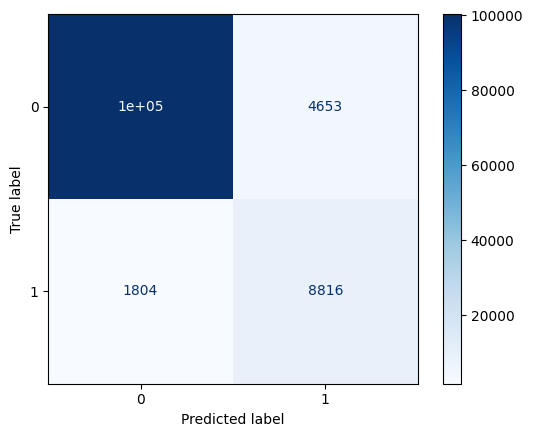

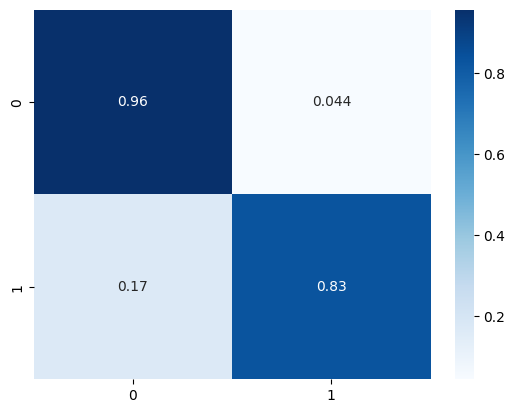

In [133]:
log_reg = dp.LogRegression(X_train, X_test, y_train, y_test)

log_reg.fit()

Fitting 5 folds for each of 270 candidates, totalling 1350 fits
Best parameters: {'alpha': 0.0001, 'eta0': 0.01, 'learning_rate': 'adaptive', 'loss': 'hinge', 'penalty': 'l1'}
Best Score: 0.9693054531395816
Best Estimator: SGDClassifier(eta0=0.01, learning_rate='adaptive', penalty='l1',
              random_state=42) 
The accuracy score is 0.9454447961531144
 The recall score is 0.6551525618883132
 The f1 score is 0.7426986457823462
 The ROC AUC score is 0.9058074916569202

Classification Report: 
               precision    recall  f1-score   support

           0       0.99      0.95      0.97    105006
           1       0.66      0.86      0.74     10620

    accuracy                           0.95    115626
   macro avg       0.82      0.91      0.86    115626
weighted avg       0.95      0.95      0.95    115626


Cross validation score: [0.87647853 0.87631976 0.88060649 0.87108042 0.88203072 0.87710872
 0.88076053 0.87313936 0.87298059 0.88060175]

Mean cross validation score: 0

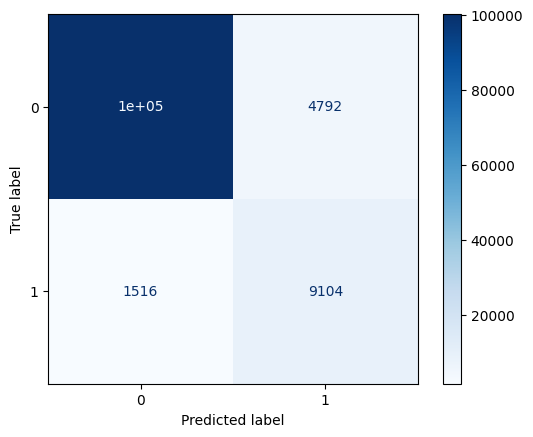

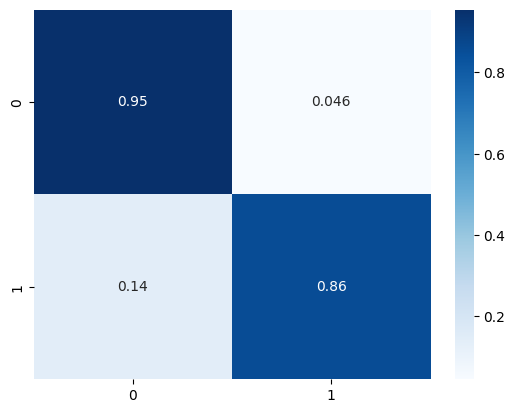

In [134]:
svm = dp.supportvm(X_train, X_test, y_train, y_test)

svm.fit()

Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters: {'bootstrap': True, 'criterion': 'gini', 'max_features': 'sqrt'}
Best Score: 0.99999603072221
Best Estimator: RandomForestClassifier(random_state=42) 
The accuracy score is 0.9999913514261498
 The recall score is 0.9999058469070708
 The f1 score is 0.9999529212372299
 The ROC AUC score is 0.9999952383673314

Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    105006
           1       1.00      1.00      1.00     10620

    accuracy                           1.00    115626
   macro avg       1.00      1.00      1.00    115626
weighted avg       1.00      1.00      1.00    115626


Cross validation score: [1.         1.         0.99984123 1.         1.         1.
 1.         1.         1.         1.        ]

Mean cross validation score: 0.9999841232038374



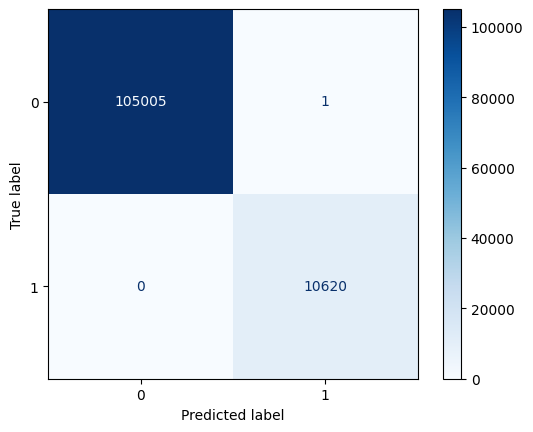

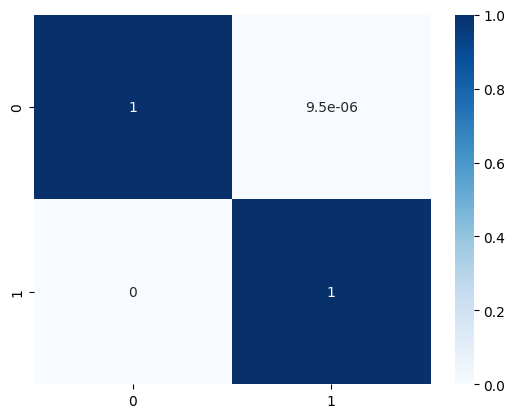

In [135]:
random_forest = dp.RandomForest(X_train, X_test, y_train, y_test)

random_forest.fit()

Fitting 5 folds for each of 243 candidates, totalling 1215 fits
Best parameters: {'gamma': 0, 'learning_rate': 0.2, 'max_depth': 3, 'min_child_weight': 3, 'n_estimators': 200}
Best Score: 0.9999920613656428
Best Estimator: XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.2, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=3, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=200, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...) 
The accuracy score is 1.0
 The 

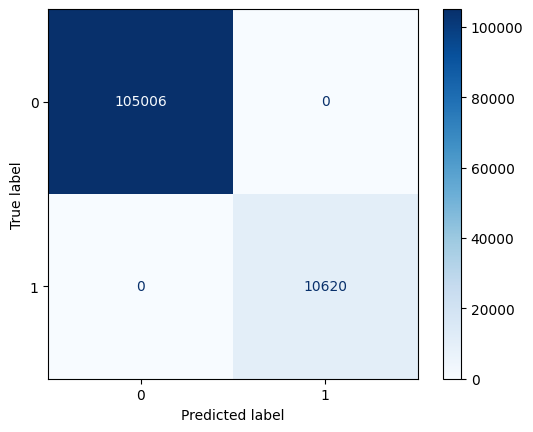

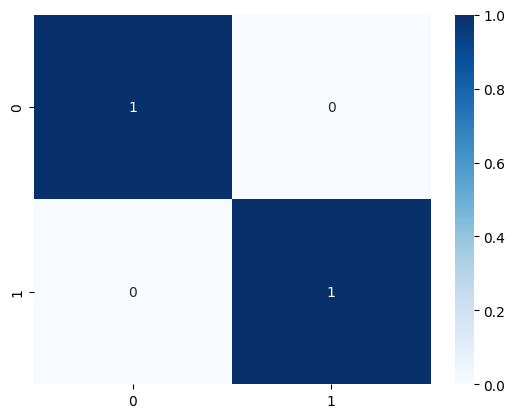

In [136]:
xgboost = dp.xgbClassifier(X_train, X_test, y_train, y_test)

xgboost.fit()

Fitting 5 folds for each of 81 candidates, totalling 405 fits
Best parameters: {'learning_rate': 0.2, 'max_depth': 5, 'max_features': 'sqrt', 'n_estimators': 200}
Best Score: 0.99999603072221
Best Estimator: GradientBoostingClassifier(learning_rate=0.2, max_depth=5, max_features='sqrt',
                           n_estimators=200, random_state=42) 
The accuracy score is 1.0
 The recall score is 1.0
 The f1 score is 1.0
 The ROC AUC score is 1.0

Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    105006
           1       1.00      1.00      1.00     10620

    accuracy                           1.00    115626
   macro avg       1.00      1.00      1.00    115626
weighted avg       1.00      1.00      1.00    115626


Cross validation score: [1.         1.         0.99984123 1.         1.         0.99984123
 1.         1.         1.         1.        ]

Mean cross validation score: 0.9999682457775432



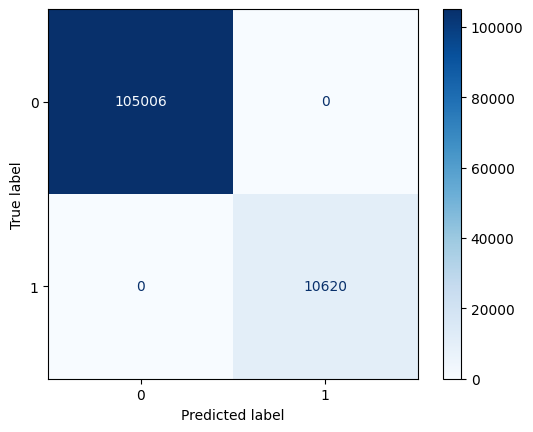

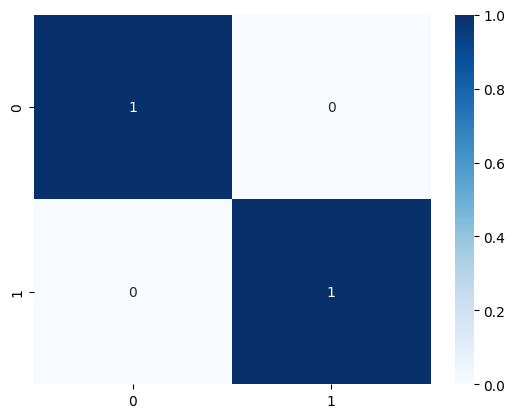

In [137]:
gb = dp.GradientBoost(X_train, X_test, y_train, y_test)

gb.fit()

Fitting 5 folds for each of 24 candidates, totalling 120 fits


c:\Users\LIR3060\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py:528: FitFailedWarning: 
60 fits failed out of a total of 120.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
60 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\LIR3060\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\LIR3060\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py", line 1382, in wrapper
    estimator._validate_params()
  File "c:\Users\LIR3060\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklear

Best parameters: {'algorithm': 'SAMME', 'learning_rate': 0.01, 'n_estimators': 50}
Best Score: 0.9999841228888403
Best Estimator: AdaBoostClassifier(algorithm='SAMME',
                   estimator=RandomForestClassifier(class_weight='balanced_subsample',
                                                    criterion='entropy',
                                                    random_state=42),
                   learning_rate=0.01, random_state=42) 


c:\Users\LIR3060\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The parameter 'algorithm' is deprecated in 1.6 and has no effect. It will be removed in version 1.8.
  warnings.warn(


The accuracy score is 0.9999913514261498
 The recall score is 0.9999058469070708
 The f1 score is 0.9999529212372299
 The ROC AUC score is 0.9999952383673314

Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    105006
           1       1.00      1.00      1.00     10620

    accuracy                           1.00    115626
   macro avg       1.00      1.00      1.00    115626
weighted avg       1.00      1.00      1.00    115626




c:\Users\LIR3060\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The parameter 'algorithm' is deprecated in 1.6 and has no effect. It will be removed in version 1.8.
  warnings.warn(
c:\Users\LIR3060\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The parameter 'algorithm' is deprecated in 1.6 and has no effect. It will be removed in version 1.8.
  warnings.warn(
c:\Users\LIR3060\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The parameter 'algorithm' is deprecated in 1.6 and has no effect. It will be removed in version 1.8.
  warnings.warn(
c:\Users\LIR3060\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The parameter 'algorithm' is deprecated in 1.6 and has no effect. It will be removed in version 1.8.
  warnings.warn(


Cross validation score: [1.         1.         0.99984123 1.         1.         1.
 1.         1.         0.99984123 1.        ]

Mean cross validation score: 0.9999682457775432



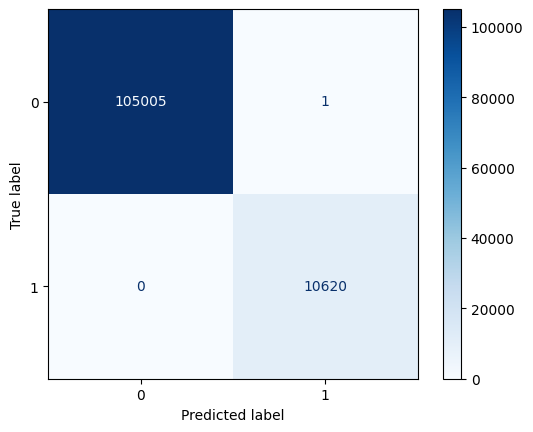

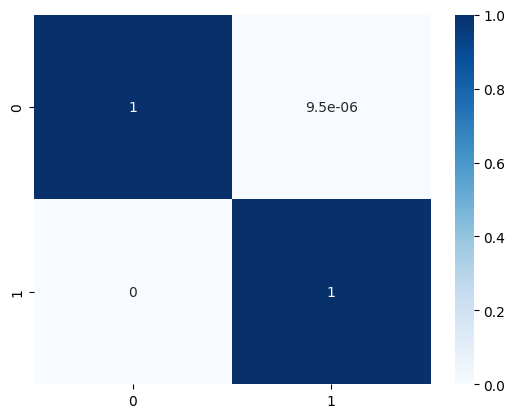

In [138]:
ada = dp.AdaBoost(X_train, X_test, y_train, y_test)

ada.fit()

Fitting 5 folds for each of 81 candidates, totalling 405 fits


c:\Users\LIR3060\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py:528: FitFailedWarning: 
270 fits failed out of a total of 405.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
270 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\LIR3060\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\LIR3060\AppData\Local\Programs\Python\Python312\Lib\site-packages\ngboost\ngboost.py", line 254, in fit
    return self.partial_fit(
           ^^^^^^^^^^^^^^^^^
  File "c:\Users\LIR3060\AppData\Local\Programs\Python\Python312

[iter 0] loss=0.6931 val_loss=0.0000 scale=256.0000 norm=512.0000
Best parameters: {'learning_rate': 0.01, 'max_depth': 3, 'minibatch_frac': 1.0, 'n_estimators': 100}
Best Score: 0.0036438569519987945
Best Estimator: NGBClassifier(n_estimators=100,
              random_state=RandomState(MT19937) at 0x132F1050140) 


c:\Users\LIR3060\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\LIR3060\AppData\Local\Programs\Python\Python312\Lib\site-packages\ngboost\distns\categorical.py:12: RuntimeWarning: divide by zero encountered in log
  return -np.log(self.probs[Y, range(len(Y))])


[iter 0] loss=0.6931 val_loss=0.0000 scale=256.0000 norm=512.0000


c:\Users\LIR3060\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\LIR3060\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


The accuracy score is 0.9976821822081539
 The recall score is 0.9753857457751653
 The f1 score is 0.9875395201785382
 The ROC AUC score is 0.9987238824448127

Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    105006
           1       0.98      1.00      0.99     10620

    accuracy                           1.00    115626
   macro avg       0.99      1.00      0.99    115626
weighted avg       1.00      1.00      1.00    115626




c:\Users\LIR3060\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\LIR3060\AppData\Local\Programs\Python\Python312\Lib\site-packages\ngboost\distns\categorical.py:12: RuntimeWarning: divide by zero encountered in log
  return -np.log(self.probs[Y, range(len(Y))])


[iter 0] loss=0.6931 val_loss=0.0000 scale=256.0000 norm=512.0000


c:\Users\LIR3060\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\LIR3060\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\LIR3060\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\LIR3060\AppData\Local\Programs\Python\Python312\Lib\site-packages\ngboost\distns\categorical.py:12: RuntimeWarning: divide by zero encountered in log
  return -np.log(self.probs[Y, range(len(Y))])


[iter 0] loss=0.6931 val_loss=0.0000 scale=256.0000 norm=512.0000


c:\Users\LIR3060\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\LIR3060\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\LIR3060\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\LIR3060\AppData\Local\Programs\Python\Python312\Lib\site-packages\ngboost\distns\categorical.py:12: RuntimeWarning: divide by zero encountered in log
  return -np.log(self.probs[Y, range(len(Y))])


[iter 0] loss=0.6931 val_loss=0.0000 scale=256.0000 norm=512.0000


c:\Users\LIR3060\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\LIR3060\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\LIR3060\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\LIR3060\AppData\Local\Programs\Python\Python312\Lib\site-packages\ngboost\distns\categorical.py:12: RuntimeWarning: divide by zero encountered in log
  return -np.log(self.probs[Y, range(len(Y))])


[iter 0] loss=0.6931 val_loss=0.0000 scale=256.0000 norm=512.0000


c:\Users\LIR3060\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\LIR3060\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\LIR3060\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\LIR3060\AppData\Local\Programs\Python\Python312\Lib\site-packages\ngboost\distns\categorical.py:12: RuntimeWarning: divide by zero encountered in log
  return -np.log(self.probs[Y, range(len(Y))])


[iter 0] loss=0.6931 val_loss=0.0000 scale=256.0000 norm=512.0000


c:\Users\LIR3060\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\LIR3060\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\LIR3060\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\LIR3060\AppData\Local\Programs\Python\Python312\Lib\site-packages\ngboost\distns\categorical.py:12: RuntimeWarning: divide by zero encountered in log
  return -np.log(self.probs[Y, range(len(Y))])


[iter 0] loss=0.6931 val_loss=0.0000 scale=256.0000 norm=512.0000


c:\Users\LIR3060\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\LIR3060\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\LIR3060\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\LIR3060\AppData\Local\Programs\Python\Python312\Lib\site-packages\ngboost\distns\categorical.py:12: RuntimeWarning: divide by zero encountered in log
  return -np.log(self.probs[Y, range(len(Y))])


[iter 0] loss=0.6931 val_loss=0.0000 scale=256.0000 norm=512.0000


c:\Users\LIR3060\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\LIR3060\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\LIR3060\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\LIR3060\AppData\Local\Programs\Python\Python312\Lib\site-packages\ngboost\distns\categorical.py:12: RuntimeWarning: divide by zero encountered in log
  return -np.log(self.probs[Y, range(len(Y))])


[iter 0] loss=0.6931 val_loss=0.0000 scale=256.0000 norm=512.0000


c:\Users\LIR3060\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\LIR3060\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\LIR3060\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\LIR3060\AppData\Local\Programs\Python\Python312\Lib\site-packages\ngboost\distns\categorical.py:12: RuntimeWarning: divide by zero encountered in log
  return -np.log(self.probs[Y, range(len(Y))])


[iter 0] loss=0.6931 val_loss=0.0000 scale=256.0000 norm=512.0000


c:\Users\LIR3060\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\LIR3060\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\LIR3060\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\LIR3060\AppData\Local\Programs\Python\Python312\Lib\site-packages\ngboost\distns\categorical.py:12: RuntimeWarning: divide by zero encountered in log
  return -np.log(self.probs[Y, range(len(Y))])


[iter 0] loss=0.6931 val_loss=0.0000 scale=256.0000 norm=512.0000


c:\Users\LIR3060\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\LIR3060\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Cross validation score: [0.99523696 0.99333175 0.99491943 0.99364928 0.99460168 0.99539555
 0.99396658 0.99523677 0.99571309 0.99539555]

Mean cross validation score: 0.994744662639568



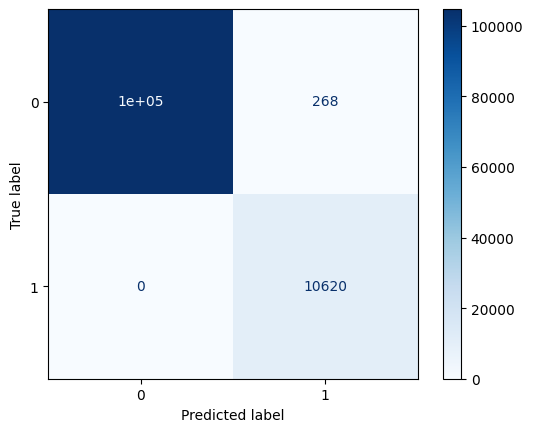

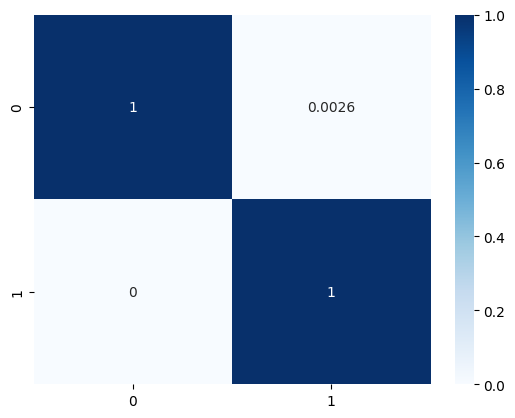

In [139]:
ngb = dp.ngboost(X_train, X_test, y_train, y_test)

ngb.fit()

The accuracy score is 0.9995329770120907
 The recall score is 0.9950337331334332
 The f1 score is 0.9974638361826038
 The ROC AUC score is 0.9997005524892794

Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    105006
           1       1.00      1.00      1.00     10620

    accuracy                           1.00    115626
   macro avg       1.00      1.00      1.00    115626
weighted avg       1.00      1.00      1.00    115626


Cross validation score: [0.99920616 0.99825355 0.99904739 0.99984123 0.99920613 0.99984123
 0.99984123 0.99872981 0.99920613 0.9993649 ]

Mean cross validation score: 0.999253775457299



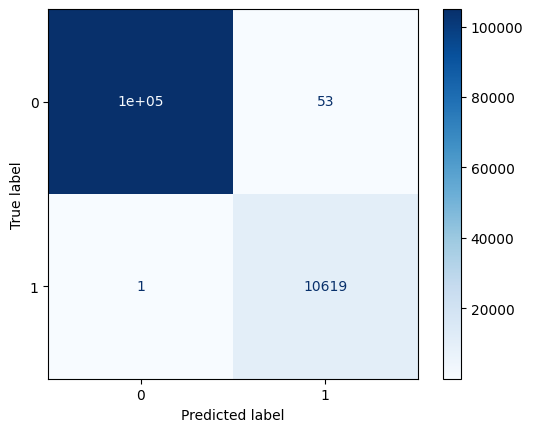

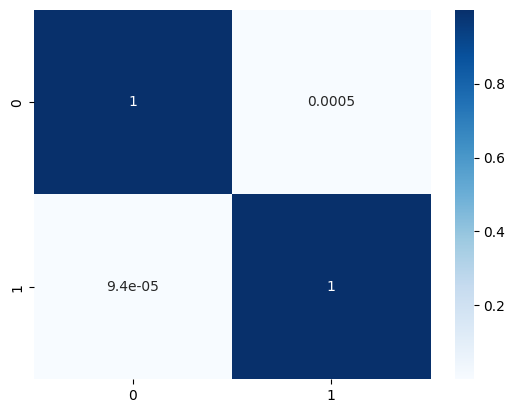

In [140]:
mlp = dp.ANN(X_train, X_test, y_train, y_test)

mlp.fit()

### Random Under Sampler

In [141]:
# 15 feature Columns
df= pd.read_csv('C:\\Users\\LIR3060\\Desktop\\Patricio\\NEO\\NEO\\API_test\\CSV\\neo_data_copy1.csv')
df = dp.OverallProcessor(df).clean2()
df.drop(columns=['estimated_diameter_min', 'estimated_diameter_max', 'estimated_diameter_average'], inplace=True)
df = dp.OverallProcessor(df).rus()
df.shape

(106502, 16)

In [142]:
# 5 feature Columns
#df = dp.OverallProcessor(df).smote()
spt = dp.scalesplit(df)

X_train, X_test, y_train, y_test = spt.ttsplitrus()

X_train.shape

(85016, 15)

In [143]:
samplesize = 0.3


X_train, _, y_train, _, = train_test_split(X_train, y_train, train_size= samplesize, stratify=y_train, random_state=42)

print(len(X_train), len(y_train))

25504 25504


#### Models

c:\Users\LIR3060\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py:528: FitFailedWarning: 
1800 fits failed out of a total of 2880.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
157 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\LIR3060\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\LIR3060\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py", line 1382, in wrapper
    estimator._validate_params()
  File "c:\Users\LIR3060\AppData\Local\Programs\Python\Python312\Lib\site-packages\sk

Best parameters: {'C': 0.1, 'fit_intercept': True, 'n_jobs': 8, 'penalty': 'l2', 'random_state': 0, 'solver': 'newton-cholesky', 'warm_start': True}
Best Score: 0.958908357069548
Best Estimator: LogisticRegression(C=0.1, n_jobs=8, random_state=0, solver='newton-cholesky',
                   warm_start=True) 
The accuracy score is 0.9598610393878222
 The recall score is 0.9398857557348808
 The f1 score is 0.9603928290174643
 The ROC AUC score is 0.9600500663903632

Classification Report: 
               precision    recall  f1-score   support

           0       0.98      0.94      0.96     10743
           1       0.94      0.98      0.96     10558

    accuracy                           0.96     21301
   macro avg       0.96      0.96      0.96     21301
weighted avg       0.96      0.96      0.96     21301


Cross validation score: [0.83692667 0.84790276 0.84633475 0.84790276 0.82431373 0.83529412
 0.82588235 0.84       0.83058824 0.83058824]

Mean cross validation score: 0.836573360

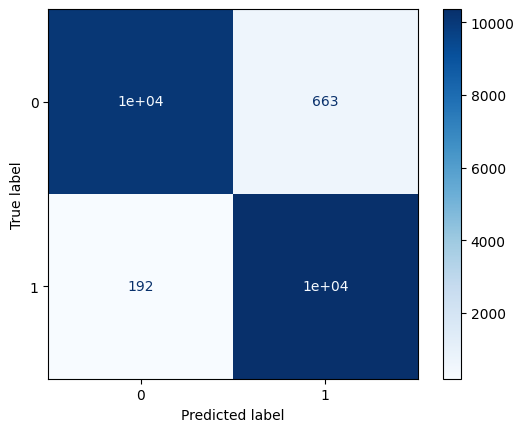

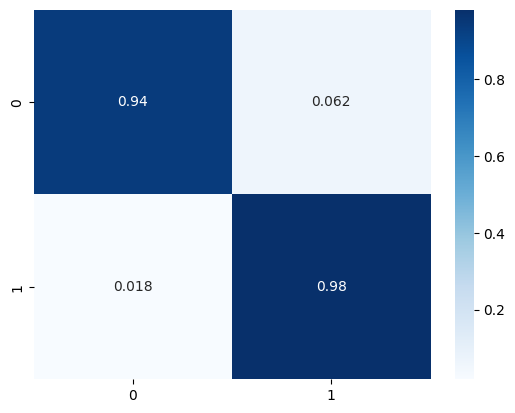

In [144]:
log_reg = dp.LogRegression(X_train, X_test, y_train, y_test)

log_reg.fit()

The accuracy score is 0.9972771231397587
 The recall score is 0.9958443520967133
 The f1 score is 0.9972571644755509
 The ROC AUC score is 0.9972891505346715

Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     10743
           1       1.00      1.00      1.00     10558

    accuracy                           1.00     21301
   macro avg       1.00      1.00      1.00     21301
weighted avg       1.00      1.00      1.00     21301


Cross validation score: [0.98196432 0.98196432 0.98980592 0.9843168  0.98039216]

Mean cross validation score: 0.9836887033919801



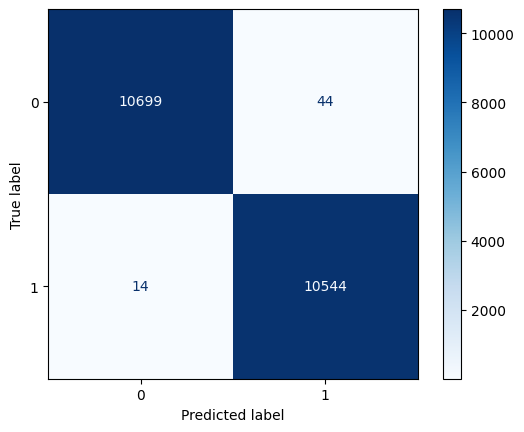

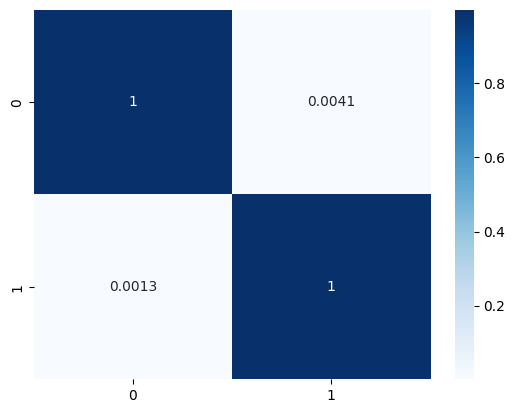

In [145]:
svm = dp.supportvm2(X_train, X_test, y_train, y_test)

svm.fit()

Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters: {'bootstrap': False, 'criterion': 'gini', 'max_features': 'sqrt'}
Best Score: 0.9999607843137255
Best Estimator: RandomForestClassifier(bootstrap=False, random_state=42) 
The accuracy score is 0.9996713769306605
 The recall score is 0.9996211762477507
 The f1 score is 0.9996685135199128
 The ROC AUC score is 0.999671759900679

Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     10743
           1       1.00      1.00      1.00     10558

    accuracy                           1.00     21301
   macro avg       1.00      1.00      1.00     21301
weighted avg       1.00      1.00      1.00     21301


Cross validation score: [1.         1.         1.         1.         1.         0.99843137
 1.         1.         1.         1.        ]

Mean cross validation score: 0.9998431372549019



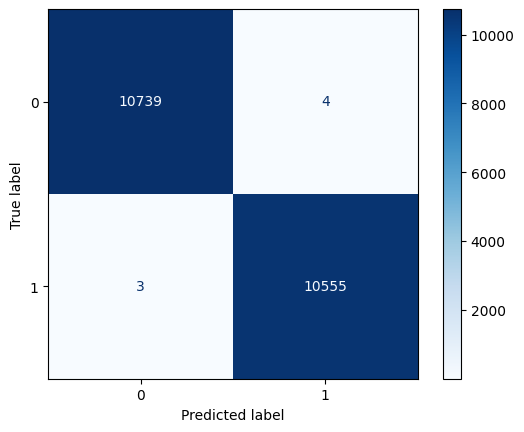

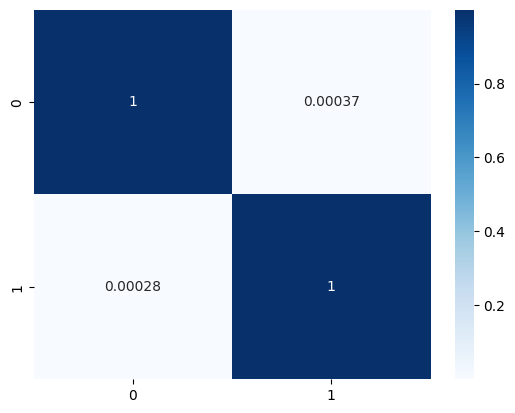

In [146]:
random_forest = dp.RandomForest(X_train, X_test, y_train, y_test)

random_forest.fit()

Fitting 5 folds for each of 243 candidates, totalling 1215 fits
Best parameters: {'gamma': 0, 'learning_rate': 0.2, 'max_depth': 5, 'min_child_weight': 1, 'n_estimators': 200}
Best Score: 0.9999607920015684
Best Estimator: XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.2, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=200, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...) 
The accuracy score is 0.9997652

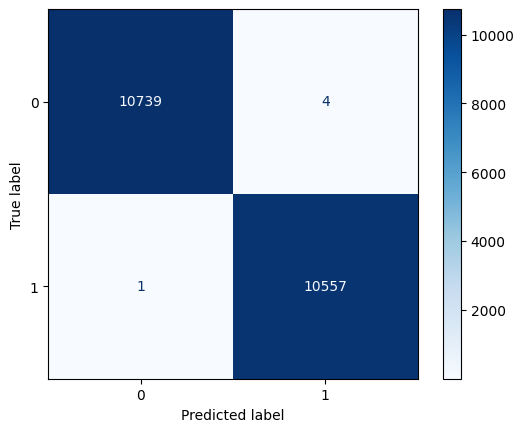

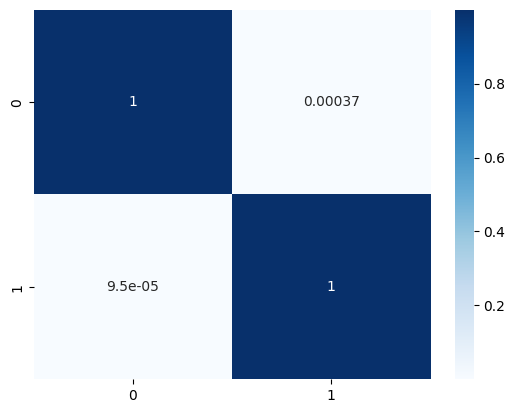

In [147]:
xgboost = dp.xgbClassifier(X_train, X_test, y_train, y_test)

xgboost.fit()

Fitting 5 folds for each of 81 candidates, totalling 405 fits
Best parameters: {'learning_rate': 0.1, 'max_depth': 3, 'max_features': None, 'n_estimators': 100}
Best Score: 0.9999607843137255
Best Estimator: GradientBoostingClassifier(random_state=42) 
The accuracy score is 0.9996713769306605
 The recall score is 0.9996211762477507
 The f1 score is 0.9996685135199128
 The ROC AUC score is 0.999671759900679

Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     10743
           1       1.00      1.00      1.00     10558

    accuracy                           1.00     21301
   macro avg       1.00      1.00      1.00     21301
weighted avg       1.00      1.00      1.00     21301


Cross validation score: [1.         0.99843199 1.         1.         1.         0.99843137
 1.         1.         1.         1.        ]

Mean cross validation score: 0.9996863359763968



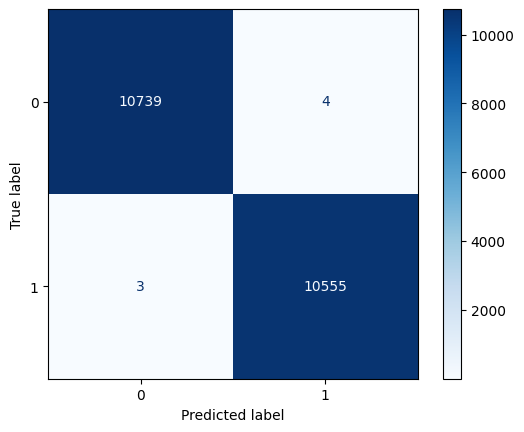

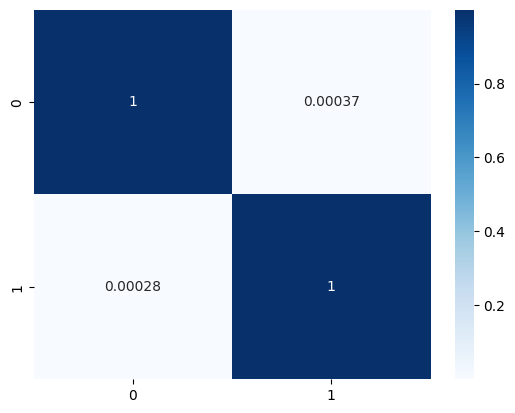

In [148]:
gb = dp.GradientBoost(X_train, X_test, y_train, y_test)

gb.fit()

Fitting 5 folds for each of 24 candidates, totalling 120 fits


c:\Users\LIR3060\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py:528: FitFailedWarning: 
60 fits failed out of a total of 120.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
60 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\LIR3060\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\LIR3060\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py", line 1382, in wrapper
    estimator._validate_params()
  File "c:\Users\LIR3060\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklear

Best parameters: {'algorithm': 'SAMME', 'learning_rate': 0.01, 'n_estimators': 50}
Best Score: 0.9998039523199986
Best Estimator: AdaBoostClassifier(algorithm='SAMME',
                   estimator=RandomForestClassifier(class_weight='balanced_subsample',
                                                    criterion='entropy',
                                                    random_state=42),
                   learning_rate=0.01, random_state=42) 


c:\Users\LIR3060\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The parameter 'algorithm' is deprecated in 1.6 and has no effect. It will be removed in version 1.8.
  warnings.warn(


The accuracy score is 0.9996713769306605
 The recall score is 0.9996211762477507
 The f1 score is 0.9996685135199128
 The ROC AUC score is 0.999671759900679

Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     10743
           1       1.00      1.00      1.00     10558

    accuracy                           1.00     21301
   macro avg       1.00      1.00      1.00     21301
weighted avg       1.00      1.00      1.00     21301




c:\Users\LIR3060\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The parameter 'algorithm' is deprecated in 1.6 and has no effect. It will be removed in version 1.8.
  warnings.warn(
c:\Users\LIR3060\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The parameter 'algorithm' is deprecated in 1.6 and has no effect. It will be removed in version 1.8.
  warnings.warn(
c:\Users\LIR3060\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The parameter 'algorithm' is deprecated in 1.6 and has no effect. It will be removed in version 1.8.
  warnings.warn(
c:\Users\LIR3060\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The parameter 'algorithm' is deprecated in 1.6 and has no effect. It will be removed in version 1.8.
  warnings.warn(


Cross validation score: [1.         0.99843199 1.         1.         1.         0.99843137
 1.         1.         1.         0.99843137]

Mean cross validation score: 0.9995294732312987



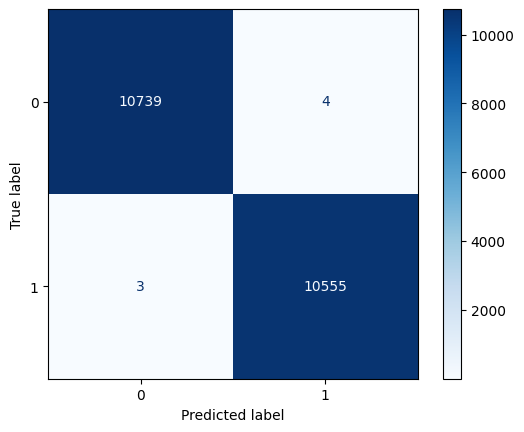

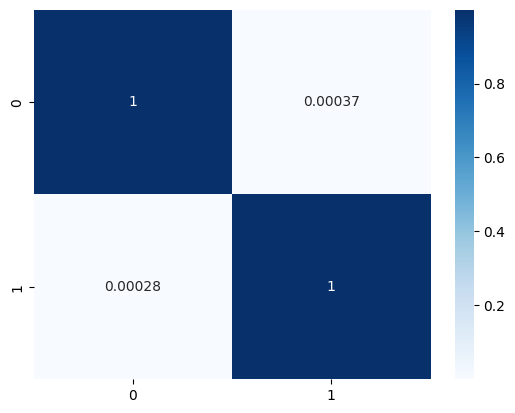

In [149]:
ada = dp.AdaBoost(X_train, X_test, y_train, y_test)

ada.fit()

#dump(ada, '/Volumes/Maestria/GitHub/NEO/NEO/Exports/API/best_model_15.sav' )

Fitting 5 folds for each of 81 candidates, totalling 405 fits


c:\Users\LIR3060\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py:528: FitFailedWarning: 
273 fits failed out of a total of 405.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
273 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\LIR3060\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\LIR3060\AppData\Local\Programs\Python\Python312\Lib\site-packages\ngboost\ngboost.py", line 254, in fit
    return self.partial_fit(
           ^^^^^^^^^^^^^^^^^
  File "c:\Users\LIR3060\AppData\Local\Programs\Python\Python312

[iter 0] loss=0.6931 val_loss=0.0000 scale=256.0000 norm=512.0000
Best parameters: {'learning_rate': 0.01, 'max_depth': 3, 'minibatch_frac': 0.7, 'n_estimators': 100}
Best Score: 0.0032424495502779713
Best Estimator: NGBClassifier(minibatch_frac=0.7, n_estimators=100,
              random_state=RandomState(MT19937) at 0x132F1050140) 
[iter 0] loss=0.6931 val_loss=0.0000 scale=256.0000 norm=512.0000


c:\Users\LIR3060\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\LIR3060\AppData\Local\Programs\Python\Python312\Lib\site-packages\ngboost\distns\categorical.py:12: RuntimeWarning: divide by zero encountered in log
  return -np.log(self.probs[Y, range(len(Y))])
c:\Users\LIR3060\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\LIR3060\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\LIR3060\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\deprecation.py:

The accuracy score is 0.9990610769447443
 The recall score is 0.9995259764884338
 The f1 score is 0.999052402160523
 The ROC AUC score is 0.9990569285176372

Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     10743
           1       1.00      1.00      1.00     10558

    accuracy                           1.00     21301
   macro avg       1.00      1.00      1.00     21301
weighted avg       1.00      1.00      1.00     21301


[iter 0] loss=0.6931 val_loss=0.0000 scale=256.0000 norm=512.0000


c:\Users\LIR3060\AppData\Local\Programs\Python\Python312\Lib\site-packages\ngboost\distns\categorical.py:12: RuntimeWarning: divide by zero encountered in log
  return -np.log(self.probs[Y, range(len(Y))])
c:\Users\LIR3060\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\LIR3060\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\LIR3060\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\LIR3060\AppData\Local\Programs\Python\Python312\Lib\site-packages\ngboost\distns\categorical.py

[iter 0] loss=0.6931 val_loss=0.0000 scale=256.0000 norm=512.0001


c:\Users\LIR3060\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\LIR3060\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\LIR3060\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\LIR3060\AppData\Local\Programs\Python\Python312\Lib\site-packages\ngboost\distns\categorical.py:12: RuntimeWarning: divide by zero encountered in log
  return -np.log(self.probs[Y, range(len(Y))])


[iter 0] loss=0.6931 val_loss=0.0000 scale=256.0000 norm=512.0000


c:\Users\LIR3060\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\LIR3060\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\LIR3060\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\LIR3060\AppData\Local\Programs\Python\Python312\Lib\site-packages\ngboost\distns\categorical.py:12: RuntimeWarning: divide by zero encountered in log
  return -np.log(self.probs[Y, range(len(Y))])


[iter 0] loss=0.6931 val_loss=0.0000 scale=256.0000 norm=512.0001


c:\Users\LIR3060\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\LIR3060\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\LIR3060\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\LIR3060\AppData\Local\Programs\Python\Python312\Lib\site-packages\ngboost\distns\categorical.py:12: RuntimeWarning: divide by zero encountered in log
  return -np.log(self.probs[Y, range(len(Y))])


[iter 0] loss=0.6931 val_loss=0.0000 scale=256.0000 norm=512.0000


c:\Users\LIR3060\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\LIR3060\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\LIR3060\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\LIR3060\AppData\Local\Programs\Python\Python312\Lib\site-packages\ngboost\distns\categorical.py:12: RuntimeWarning: divide by zero encountered in log
  return -np.log(self.probs[Y, range(len(Y))])


[iter 0] loss=0.6931 val_loss=0.0000 scale=256.0000 norm=512.0000


c:\Users\LIR3060\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\LIR3060\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\LIR3060\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\LIR3060\AppData\Local\Programs\Python\Python312\Lib\site-packages\ngboost\distns\categorical.py:12: RuntimeWarning: divide by zero encountered in log
  return -np.log(self.probs[Y, range(len(Y))])


[iter 0] loss=0.6931 val_loss=0.0000 scale=256.0000 norm=512.0000


c:\Users\LIR3060\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\LIR3060\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\LIR3060\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\LIR3060\AppData\Local\Programs\Python\Python312\Lib\site-packages\ngboost\distns\categorical.py:12: RuntimeWarning: divide by zero encountered in log
  return -np.log(self.probs[Y, range(len(Y))])


[iter 0] loss=0.6931 val_loss=0.0000 scale=256.0000 norm=512.0000


c:\Users\LIR3060\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\LIR3060\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\LIR3060\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\LIR3060\AppData\Local\Programs\Python\Python312\Lib\site-packages\ngboost\distns\categorical.py:12: RuntimeWarning: divide by zero encountered in log
  return -np.log(self.probs[Y, range(len(Y))])


[iter 0] loss=0.6931 val_loss=0.0000 scale=256.0000 norm=512.0000


c:\Users\LIR3060\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\LIR3060\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\LIR3060\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\LIR3060\AppData\Local\Programs\Python\Python312\Lib\site-packages\ngboost\distns\categorical.py:12: RuntimeWarning: divide by zero encountered in log
  return -np.log(self.probs[Y, range(len(Y))])


[iter 0] loss=0.6931 val_loss=0.0000 scale=256.0000 norm=512.0000
Cross validation score: [0.99843199 0.99372795 0.99843199 0.99843199 0.99686275 0.99215686
 0.99686275 0.99686275 0.99843137 0.99843137]

Mean cross validation score: 0.9968631753641894



c:\Users\LIR3060\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\LIR3060\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


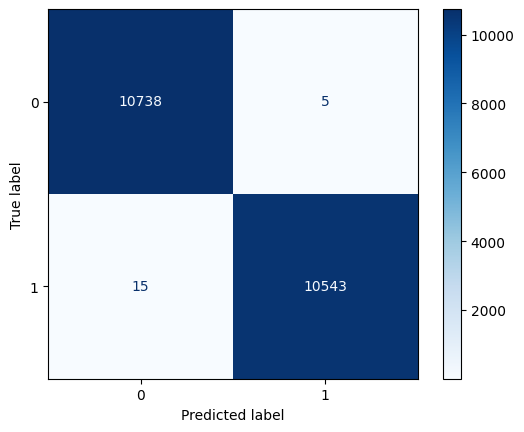

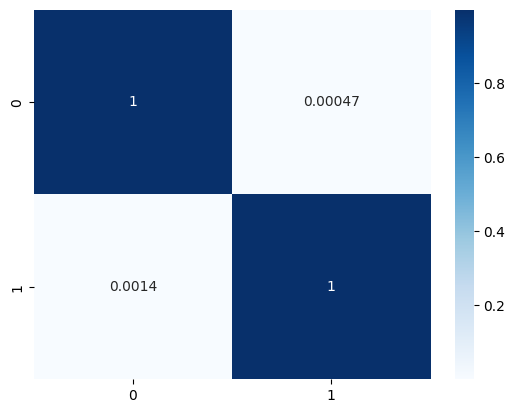

In [150]:
ngb = dp.ngboost(X_train, X_test, y_train, y_test)

ngb.fit()

The accuracy score is 0.9994835923196094
 The recall score is 0.9991481306199717
 The f1 score is 0.999479240638167
 The ROC AUC score is 0.9994864076833283

Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     10743
           1       1.00      1.00      1.00     10558

    accuracy                           1.00     21301
   macro avg       1.00      1.00      1.00     21301
weighted avg       1.00      1.00      1.00     21301


Cross validation score: [0.99372795 0.99686397 1.         0.99686397 0.99372549 0.99529412
 0.99372549 0.99686275 0.99372549 0.99686275]

Mean cross validation score: 0.9957651976150961



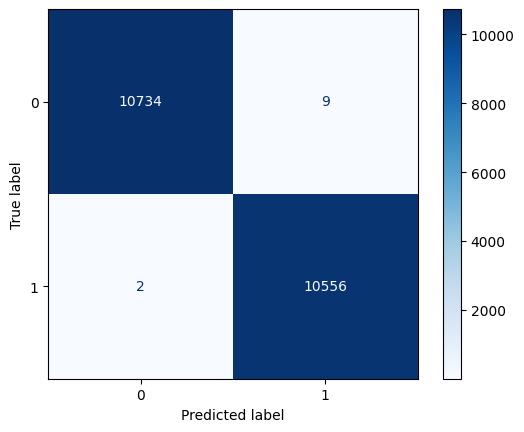

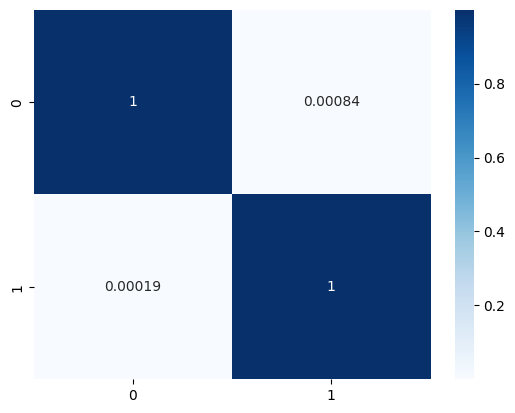

In [151]:
mlp = dp.ANN(X_train, X_test, y_train, y_test)

mlp.fit()

### Imbalanced

In [152]:
# 15 feature Columns
df= pd.read_csv('C:\\Users\\LIR3060\\Desktop\\Patricio\\NEO\\NEO\\API_test\\CSV\\neo_data_copy1.csv')
df = dp.OverallProcessor(df).clean2()
df.drop(columns=['estimated_diameter_min', 'estimated_diameter_max', 'estimated_diameter_average'], inplace=True)
df.shape

(578127, 16)

In [153]:
spt = dp.scalesplit(df)

X_train, X_test, y_train, y_test = spt.ttsplitimbalance()

X_train

array([[-0.9260489 , -0.37053054, -0.43885269, ...,  0.03010939,
         0.48983262,  0.83475809],
       [ 0.38503235, -0.835229  , -0.85237111, ...,  0.2398473 ,
         0.0398893 , -1.41451704],
       [-0.50596085, -0.96812133, -0.10993791, ...,  1.43185442,
         0.00284088, -1.51065223],
       ...,
       [ 0.08012974, -0.56744564,  0.60925711, ..., -0.2595003 ,
         0.38963248,  0.98181857],
       [-0.28914121,  0.65282395, -0.73840767, ..., -0.15269353,
         0.54481256,  0.35959552],
       [ 0.77463014, -0.80010776, -0.69589052, ..., -0.58690217,
         0.09195395, -1.31983352]])

In [154]:
samplesize = 0.3


X_train, _, y_train, _, = train_test_split(X_train, y_train, train_size= samplesize, stratify=y_train, random_state=42)

print(len(X_train), len(y_train))

138750 138750


#### Models

c:\Users\LIR3060\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py:528: FitFailedWarning: 
1800 fits failed out of a total of 2880.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
85 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\LIR3060\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\LIR3060\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py", line 1382, in wrapper
    estimator._validate_params()
  File "c:\Users\LIR3060\AppData\Local\Programs\Python\Python312\Lib\site-packages\skl

Best parameters: {'C': 1, 'fit_intercept': True, 'n_jobs': 8, 'penalty': 'l1', 'random_state': 32, 'solver': 'liblinear', 'warm_start': True}
Best Score: 0.9546162162162162
Best Estimator: LogisticRegression(C=1, n_jobs=8, penalty='l1', random_state=32,
                   solver='liblinear', warm_start=True) 
The accuracy score is 0.9541020185771366
 The recall score is 0.789032749428789
 The f1 score is 0.7321185200141336
 The ROC AUC score is 0.8321984560258112

Classification Report: 
               precision    recall  f1-score   support

           0       0.97      0.98      0.97    105006
           1       0.79      0.68      0.73     10620

    accuracy                           0.95    115626
   macro avg       0.88      0.83      0.85    115626
weighted avg       0.95      0.95      0.95    115626


Cross validation score: [0.47599119 0.44879929 0.45310554 0.47894308 0.44879929 0.4608568
 0.45655055 0.46602431 0.45999555 0.44449303]

Mean cross validation score: 0.4593558640

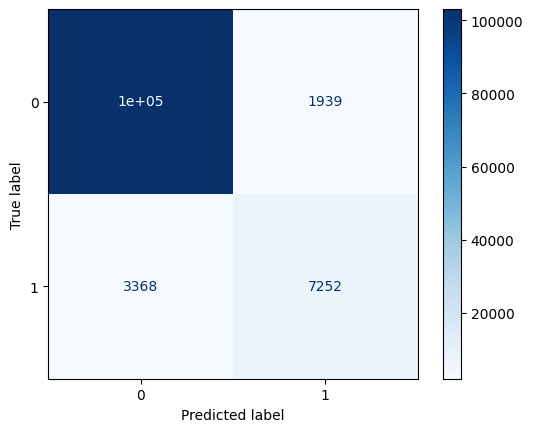

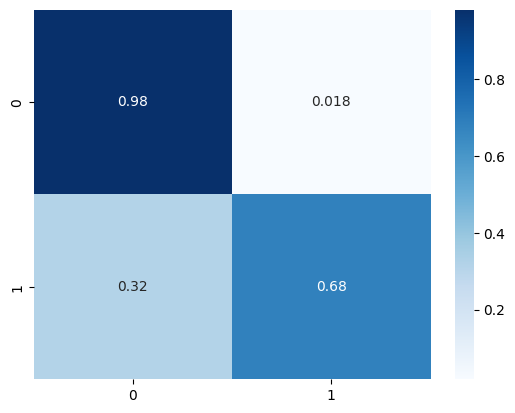

In [155]:
log_reg = dp.LogRegression(X_train, X_test, y_train, y_test)

log_reg.fit()

Fitting 5 folds for each of 270 candidates, totalling 1350 fits
Best parameters: {'alpha': 0.0001, 'eta0': 0.01, 'learning_rate': 'adaptive', 'loss': 'hinge', 'penalty': 'l1'}
Best Score: 0.9554738738738738
Best Estimator: SGDClassifier(eta0=0.01, learning_rate='adaptive', penalty='l1',
              random_state=42) 
The accuracy score is 0.9552955217684603
 The recall score is 0.788504287075262
 The f1 score is 0.742412916728958
 The ROC AUC score is 0.841192472617384

Classification Report: 
               precision    recall  f1-score   support

           0       0.97      0.98      0.98    105006
           1       0.79      0.70      0.74     10620

    accuracy                           0.96    115626
   macro avg       0.88      0.84      0.86    115626
weighted avg       0.95      0.96      0.95    115626


Cross validation score: [0.47857676 0.43415802 0.4608568  0.4961681  0.4591343  0.46516306
 0.47033057 0.47033057 0.48152683 0.45655055]

Mean cross validation score: 0.46

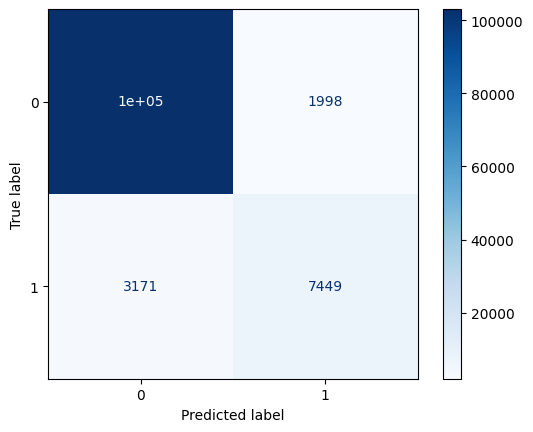

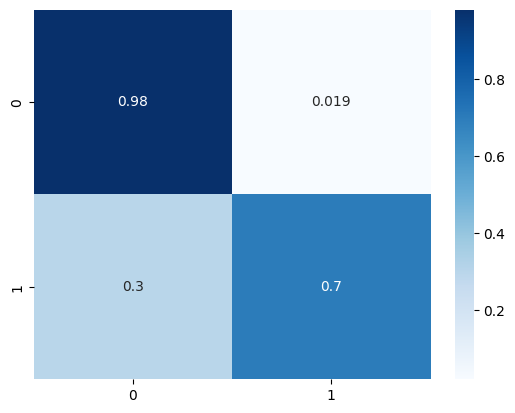

In [156]:
svm = dp.supportvm(X_train, X_test, y_train, y_test)

svm.fit()

Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters: {'bootstrap': False, 'criterion': 'gini', 'max_features': 'sqrt'}
Best Score: 0.9999927927927927
Best Estimator: RandomForestClassifier(bootstrap=False, random_state=42) 
The accuracy score is 1.0
 The recall score is 1.0
 The f1 score is 1.0
 The ROC AUC score is 1.0

Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    105006
           1       1.00      1.00      1.00     10620

    accuracy                           1.00    115626
   macro avg       1.00      1.00      1.00    115626
weighted avg       1.00      1.00      1.00    115626


Cross validation score: [1.         1.         1.         1.         1.         1.
 1.         1.         1.         0.99913875]

Mean cross validation score: 0.9999138748888597



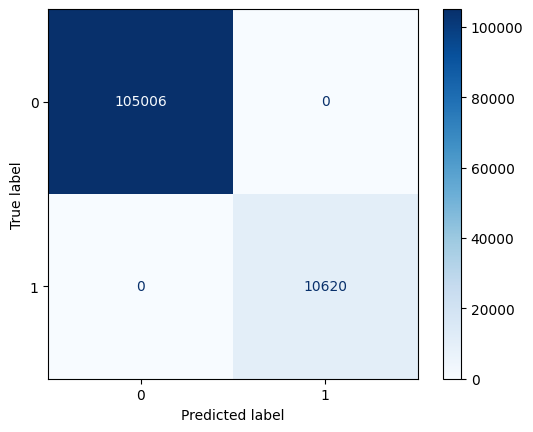

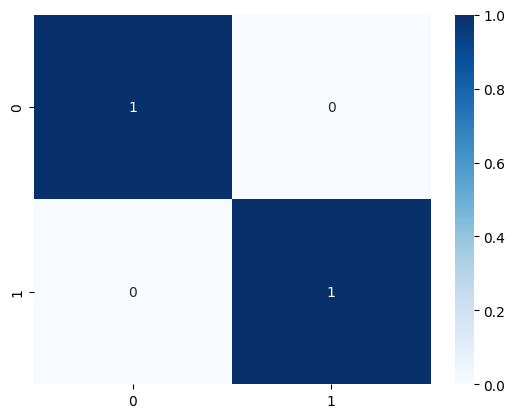

In [157]:
random_forest = dp.RandomForest(X_train, X_test, y_train, y_test)

random_forest.fit()

Fitting 5 folds for each of 243 candidates, totalling 1215 fits
Best parameters: {'gamma': 0, 'learning_rate': 0.1, 'max_depth': 3, 'min_child_weight': 1, 'n_estimators': 300}
Best Score: 0.9999855855855856
Best Estimator: XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=300, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...) 
The accuracy score is 1.0
 The 

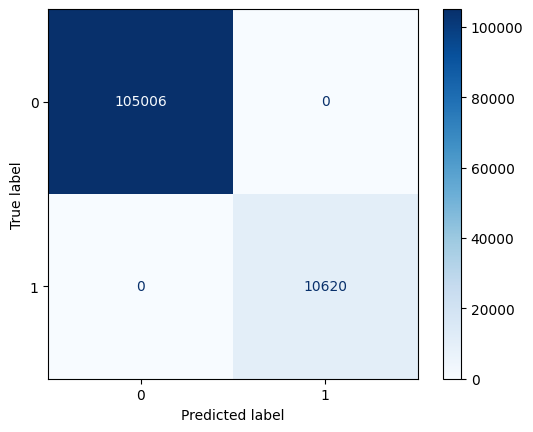

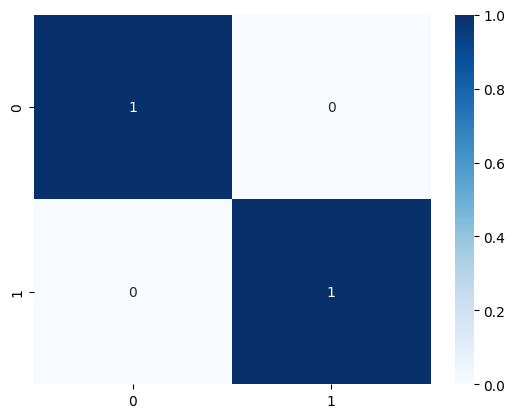

In [158]:
xgboost = dp.xgbClassifier(X_train, X_test, y_train, y_test)

xgboost.fit()

Fitting 5 folds for each of 81 candidates, totalling 405 fits
Best parameters: {'learning_rate': 0.1, 'max_depth': 5, 'max_features': None, 'n_estimators': 300}
Best Score: 0.9999927927927927
Best Estimator: GradientBoostingClassifier(max_depth=5, n_estimators=300, random_state=42) 
The accuracy score is 1.0
 The recall score is 1.0
 The f1 score is 1.0
 The ROC AUC score is 1.0

Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    105006
           1       1.00      1.00      1.00     10620

    accuracy                           1.00    115626
   macro avg       1.00      1.00      1.00    115626
weighted avg       1.00      1.00      1.00    115626


Cross validation score: [1.         1.         1.         1.         1.         1.
 1.         1.         1.         0.99913875]

Mean cross validation score: 0.9999138748888597



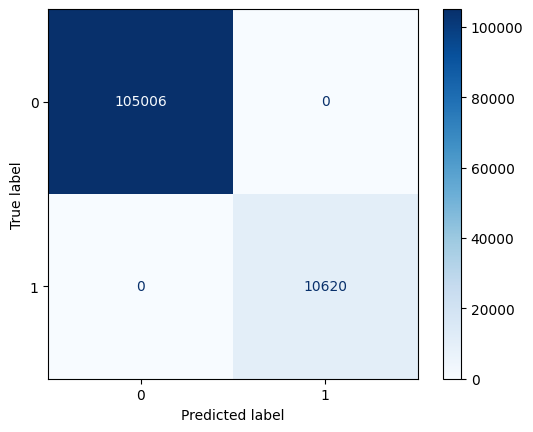

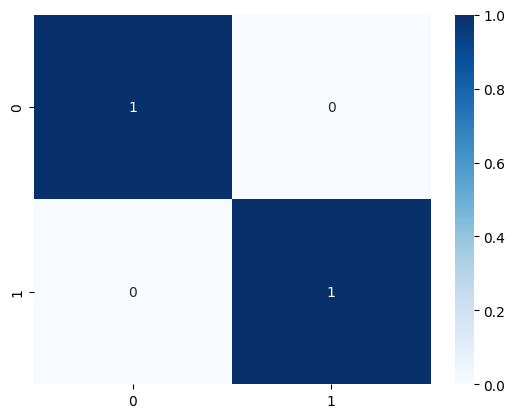

In [159]:
gb = dp.GradientBoost(X_train, X_test, y_train, y_test)

gb.fit()

Fitting 5 folds for each of 24 candidates, totalling 120 fits


c:\Users\LIR3060\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py:528: FitFailedWarning: 
60 fits failed out of a total of 120.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
60 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\LIR3060\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\LIR3060\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py", line 1382, in wrapper
    estimator._validate_params()
  File "c:\Users\LIR3060\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklear

Best parameters: {'algorithm': 'SAMME', 'learning_rate': 0.01, 'n_estimators': 50}
Best Score: 0.9999783783783783
Best Estimator: AdaBoostClassifier(algorithm='SAMME',
                   estimator=RandomForestClassifier(class_weight='balanced_subsample',
                                                    criterion='entropy',
                                                    random_state=42),
                   learning_rate=0.01, random_state=42) 


c:\Users\LIR3060\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The parameter 'algorithm' is deprecated in 1.6 and has no effect. It will be removed in version 1.8.
  warnings.warn(


The accuracy score is 1.0
 The recall score is 1.0
 The f1 score is 1.0
 The ROC AUC score is 1.0

Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    105006
           1       1.00      1.00      1.00     10620

    accuracy                           1.00    115626
   macro avg       1.00      1.00      1.00    115626
weighted avg       1.00      1.00      1.00    115626




c:\Users\LIR3060\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The parameter 'algorithm' is deprecated in 1.6 and has no effect. It will be removed in version 1.8.
  warnings.warn(
c:\Users\LIR3060\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The parameter 'algorithm' is deprecated in 1.6 and has no effect. It will be removed in version 1.8.
  warnings.warn(
c:\Users\LIR3060\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The parameter 'algorithm' is deprecated in 1.6 and has no effect. It will be removed in version 1.8.
  warnings.warn(
c:\Users\LIR3060\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The parameter 'algorithm' is deprecated in 1.6 and has no effect. It will be removed in version 1.8.
  warnings.warn(


Cross validation score: [1.         1.         1.         1.         1.         1.
 1.         1.         1.         0.99913875]

Mean cross validation score: 0.9999138748888597



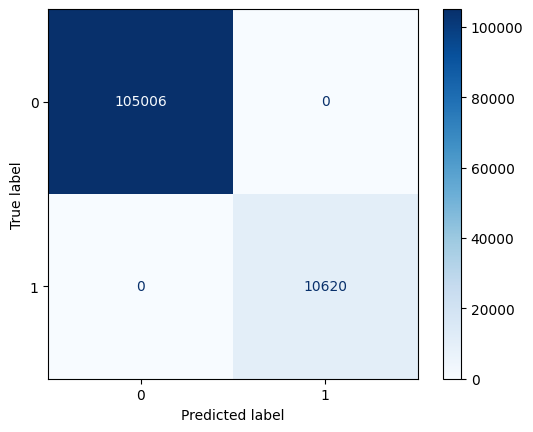

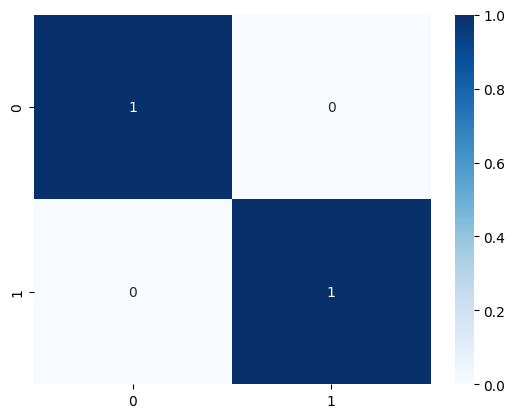

In [160]:
ada = dp.AdaBoost(X_train, X_test, y_train, y_test)

ada.fit()

Fitting 5 folds for each of 81 candidates, totalling 405 fits


c:\Users\LIR3060\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py:528: FitFailedWarning: 
299 fits failed out of a total of 405.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
299 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\LIR3060\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\LIR3060\AppData\Local\Programs\Python\Python312\Lib\site-packages\ngboost\ngboost.py", line 254, in fit
    return self.partial_fit(
           ^^^^^^^^^^^^^^^^^
  File "c:\Users\LIR3060\AppData\Local\Programs\Python\Python312

[iter 0] loss=0.3075 val_loss=0.0000 scale=16.0000 norm=32.0000
[iter 100] loss=0.0027 val_loss=0.0000 scale=0.2500 norm=0.2517
[iter 200] loss=0.0027 val_loss=0.0000 scale=0.1250 norm=0.1259
Best parameters: {'learning_rate': 0.01, 'max_depth': 5, 'minibatch_frac': 1.0, 'n_estimators': 300}
Best Score: 0.002739601493084211
Best Estimator: NGBClassifier(n_estimators=300,
              random_state=RandomState(MT19937) at 0x132F1050140) 


c:\Users\LIR3060\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[iter 0] loss=0.3075 val_loss=0.0000 scale=16.0000 norm=32.0000
[iter 100] loss=0.0027 val_loss=0.0000 scale=0.2500 norm=0.2517
[iter 200] loss=0.0027 val_loss=0.0000 scale=0.1250 norm=0.1259


c:\Users\LIR3060\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\LIR3060\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


The accuracy score is 0.9991091968934322
 The recall score is 0.9929689697196963
 The f1 score is 0.995161366091981
 The ROC AUC score is 0.9983246101298919

Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    105006
           1       0.99      1.00      1.00     10620

    accuracy                           1.00    115626
   macro avg       1.00      1.00      1.00    115626
weighted avg       1.00      1.00      1.00    115626




c:\Users\LIR3060\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[iter 0] loss=0.3076 val_loss=0.0000 scale=16.0000 norm=32.0000


c:\Users\LIR3060\AppData\Local\Programs\Python\Python312\Lib\site-packages\ngboost\distns\categorical.py:12: RuntimeWarning: divide by zero encountered in log
  return -np.log(self.probs[Y, range(len(Y))])


[iter 100] loss=0.0027 val_loss=0.0000 scale=0.0001 norm=0.0001
[iter 200] loss=0.0027 val_loss=0.0000 scale=0.0001 norm=0.0001


c:\Users\LIR3060\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\LIR3060\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\LIR3060\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[iter 0] loss=0.3075 val_loss=0.0000 scale=16.0000 norm=32.0000
[iter 100] loss=0.0028 val_loss=0.0000 scale=0.2500 norm=0.2517
[iter 200] loss=0.0028 val_loss=0.0000 scale=0.5000 norm=0.5034


c:\Users\LIR3060\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\LIR3060\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\LIR3060\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[iter 0] loss=0.3075 val_loss=0.0000 scale=16.0000 norm=32.0000
[iter 100] loss=0.0024 val_loss=0.0000 scale=0.2500 norm=0.2516
[iter 200] loss=0.0024 val_loss=0.0000 scale=0.1250 norm=0.1258


c:\Users\LIR3060\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\LIR3060\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\LIR3060\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[iter 0] loss=0.3075 val_loss=0.0000 scale=16.0000 norm=32.0000
[iter 100] loss=0.0027 val_loss=0.0000 scale=1.0000 norm=1.0069
[iter 200] loss=0.0027 val_loss=0.0000 scale=0.2500 norm=0.2517


c:\Users\LIR3060\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\LIR3060\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\LIR3060\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[iter 0] loss=0.3075 val_loss=0.0000 scale=16.0000 norm=32.0000
[iter 100] loss=0.0027 val_loss=0.0000 scale=0.5000 norm=0.5035
[iter 200] loss=0.0027 val_loss=0.0000 scale=0.2500 norm=0.2517


c:\Users\LIR3060\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\LIR3060\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\LIR3060\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[iter 0] loss=0.3075 val_loss=0.0000 scale=16.0000 norm=32.0000


c:\Users\LIR3060\AppData\Local\Programs\Python\Python312\Lib\site-packages\ngboost\distns\categorical.py:12: RuntimeWarning: divide by zero encountered in log
  return -np.log(self.probs[Y, range(len(Y))])


[iter 100] loss=0.0025 val_loss=0.0000 scale=0.0001 norm=0.0001
[iter 200] loss=0.0025 val_loss=0.0000 scale=0.0001 norm=0.0001


c:\Users\LIR3060\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\LIR3060\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\LIR3060\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[iter 0] loss=0.3075 val_loss=0.0000 scale=16.0000 norm=32.0000
[iter 100] loss=0.0027 val_loss=0.0000 scale=1.0000 norm=1.0069
[iter 200] loss=0.0027 val_loss=0.0000 scale=0.5000 norm=0.5034


c:\Users\LIR3060\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\LIR3060\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\LIR3060\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[iter 0] loss=0.3075 val_loss=0.0000 scale=32.0000 norm=64.0000
[iter 100] loss=0.0026 val_loss=0.0000 scale=0.0001 norm=0.0001
[iter 200] loss=0.0026 val_loss=0.0000 scale=0.0001 norm=0.0001


c:\Users\LIR3060\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\LIR3060\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\LIR3060\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[iter 0] loss=0.3075 val_loss=0.0000 scale=16.0000 norm=32.0000


c:\Users\LIR3060\AppData\Local\Programs\Python\Python312\Lib\site-packages\ngboost\distns\categorical.py:12: RuntimeWarning: divide by zero encountered in log
  return -np.log(self.probs[Y, range(len(Y))])


[iter 100] loss=0.0025 val_loss=0.0000 scale=4.0000 norm=4.0255
[iter 200] loss=0.0025 val_loss=0.0000 scale=2.0000 norm=2.0128


c:\Users\LIR3060\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\LIR3060\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\LIR3060\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[iter 0] loss=0.3075 val_loss=0.0000 scale=16.0000 norm=32.0000
[iter 100] loss=0.0024 val_loss=0.0000 scale=8.0000 norm=8.0507
[iter 200] loss=0.0024 val_loss=0.0000 scale=4.0000 norm=4.0253


c:\Users\LIR3060\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\LIR3060\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Cross validation score: [0.98965772 0.99052624 0.98966499 0.98966499 0.99052624 0.98277498
 0.98880374 0.97588497 0.99569374 0.99052624]

Mean cross validation score: 0.9883723834172313



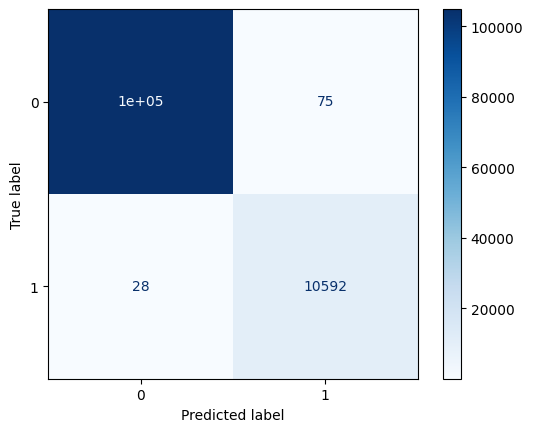

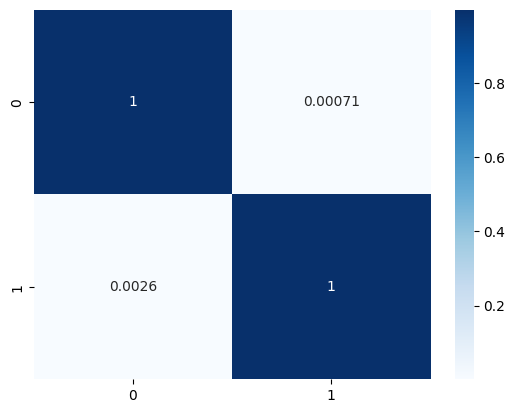

In [161]:
ngb = dp.ngboost(X_train, X_test, y_train, y_test)

ngb.fit()

The accuracy score is 0.9998097313752962
 The recall score is 0.9984010534236268
 The f1 score is 0.9989648033126294
 The ROC AUC score is 0.9996836473482118

Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    105006
           1       1.00      1.00      1.00     10620

    accuracy                           1.00    115626
   macro avg       1.00      1.00      1.00    115626
weighted avg       1.00      1.00      1.00    115626


Cross validation score: [0.99913814 0.99569374 0.9982775  1.         1.         0.996555
 0.996555   0.99913875 0.996555   0.99913875]

Mean cross validation score: 0.9981051870066789



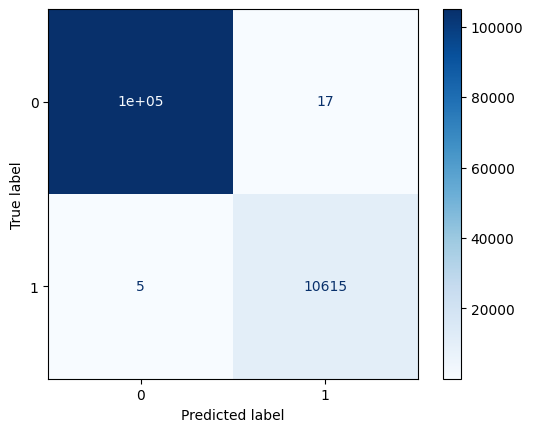

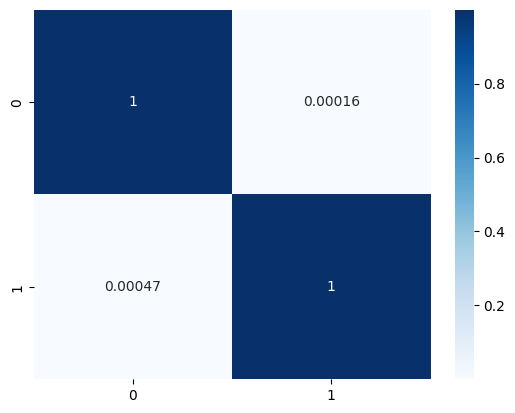

In [162]:
mlp = dp.ANN(X_train, X_test, y_train, y_test)

mlp.fit()

## 18 features

### Smote

In [163]:
# 18 feature Columns

df= pd.read_csv('C:\\Users\\LIR3060\\Desktop\\Patricio\\NEO\\NEO\\API_test\\CSV\\neo_data_copy1.csv')
df = dp.OverallProcessor(df).clean2()
df.shape

(578127, 19)

In [164]:
# 5 feature Columns
#df = dp.OverallProcessor(df).smote()
spt = dp.scalesplit(df)

X_train, X_test, y_train, y_test = spt.ttsplitsmote()

X_train

array([[-0.9260489 , -0.37053054, -0.43885269, ...,  0.08002784,
         0.08002784,  0.08002784],
       [ 0.38503235, -0.835229  , -0.85237111, ..., -0.23044022,
        -0.23044022, -0.23044022],
       [-0.50596085, -0.96812133, -0.10993791, ..., -0.08237192,
        -0.08237192, -0.08237192],
       ...,
       [-0.71261707,  1.46421261,  0.7227587 , ..., -0.01397512,
        -0.01397512, -0.01397512],
       [-0.70922926,  0.05872992, -0.36229798, ..., -0.01525828,
        -0.01525828, -0.01525828],
       [-0.53983892, -0.58537139,  0.4974969 , ..., -0.0724335 ,
        -0.0724335 , -0.0724335 ]])

In [165]:
samplesize = 0.3


X_train, _, y_train, _, = train_test_split(X_train, y_train, train_size= samplesize, stratify=y_train, random_state=42)

print(len(X_train), len(y_train))

251922 251922


#### Models

c:\Users\LIR3060\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py:528: FitFailedWarning: 
1800 fits failed out of a total of 2880.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
31 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\LIR3060\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\LIR3060\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py", line 1382, in wrapper
    estimator._validate_params()
  File "c:\Users\LIR3060\AppData\Local\Programs\Python\Python312\Lib\site-packages\skl

Best parameters: {'C': 0.01, 'fit_intercept': True, 'n_jobs': 8, 'penalty': 'l2', 'random_state': 0, 'solver': 'newton-cholesky', 'warm_start': True}
Best Score: 0.963476789769899
Best Estimator: LogisticRegression(C=0.01, n_jobs=8, random_state=0, solver='newton-cholesky',
                   warm_start=True) 
The accuracy score is 0.9443118329787418
 The recall score is 0.6247091809342004
 The f1 score is 0.7648541065624658
 The ROC AUC score is 0.9630765839476916

Classification Report: 
               precision    recall  f1-score   support

           0       1.00      0.94      0.97    105006
           1       0.62      0.99      0.76     10620

    accuracy                           0.94    115626
   macro avg       0.81      0.96      0.87    115626
weighted avg       0.96      0.94      0.95    115626


Cross validation score: [0.84964077 0.85218116 0.85566847 0.85217529 0.84280724 0.85757383
 0.85201651 0.86201969 0.85408066 0.85582725]

Mean cross validation score: 0.8533990

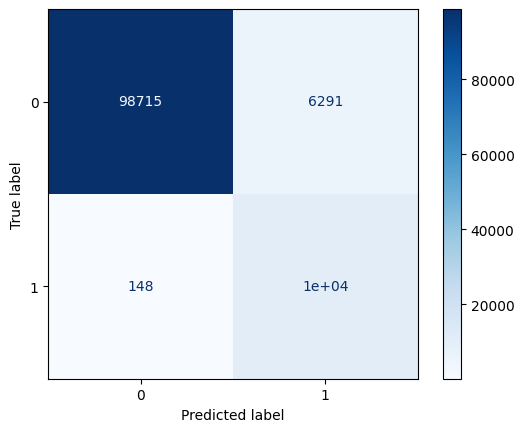

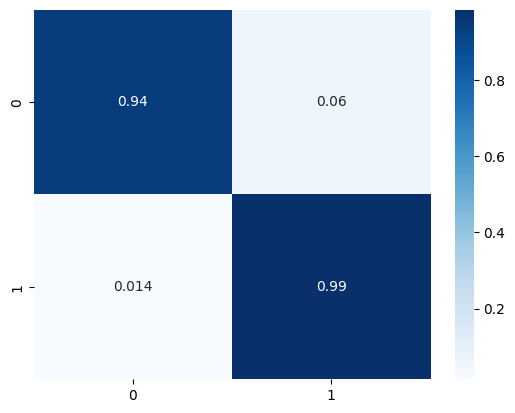

In [166]:
log_reg = dp.LogRegression(X_train, X_test, y_train, y_test)

log_reg.fit()

Fitting 5 folds for each of 270 candidates, totalling 1350 fits
Best parameters: {'alpha': 0.001, 'eta0': 0.1, 'learning_rate': 'adaptive', 'loss': 'log_loss', 'penalty': 'elasticnet'}
Best Score: 0.9637903808347998
Best Estimator: SGDClassifier(alpha=0.001, eta0=0.1, learning_rate='adaptive', loss='log_loss',
              penalty='elasticnet', random_state=42) 
The accuracy score is 0.9413799664435335
 The recall score is 0.6118551298474438
 The f1 score is 0.7561344175001798
 The ROC AUC score is 0.9629858869512005

Classification Report: 
               precision    recall  f1-score   support

           0       1.00      0.94      0.97    105006
           1       0.61      0.99      0.76     10620

    accuracy                           0.94    115626
   macro avg       0.81      0.96      0.86    115626
weighted avg       0.96      0.94      0.95    115626


Cross validation score: [0.84852935 0.85535665 0.85535091 0.85392188 0.84820578 0.85789139
 0.85709749 0.86376628 0.854557

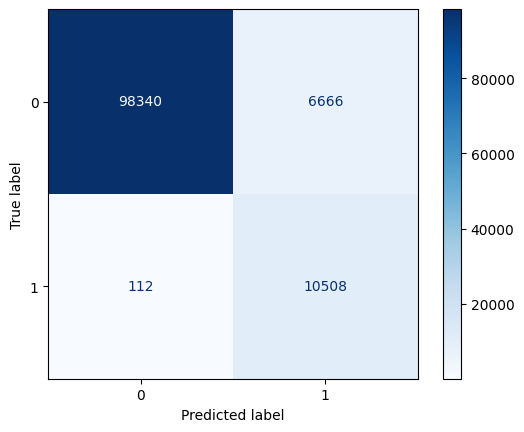

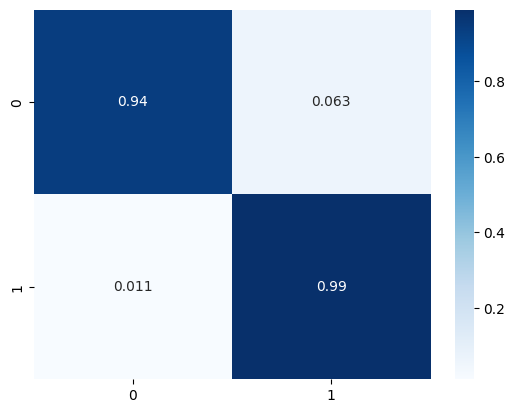

In [167]:
svm = dp.supportvm(X_train, X_test, y_train, y_test)

svm.fit()

Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters: {'bootstrap': False, 'criterion': 'gini', 'max_features': 'sqrt'}
Best Score: 0.9999960304858686
Best Estimator: RandomForestClassifier(bootstrap=False, random_state=42) 
The accuracy score is 1.0
 The recall score is 1.0
 The f1 score is 1.0
 The ROC AUC score is 1.0

Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    105006
           1       1.00      1.00      1.00     10620

    accuracy                           1.00    115626
   macro avg       1.00      1.00      1.00    115626
weighted avg       1.00      1.00      1.00    115626


Cross validation score: [1.         1.         1.         0.99984122 1.         1.
 1.         1.         1.         1.        ]

Mean cross validation score: 0.9999841219434741



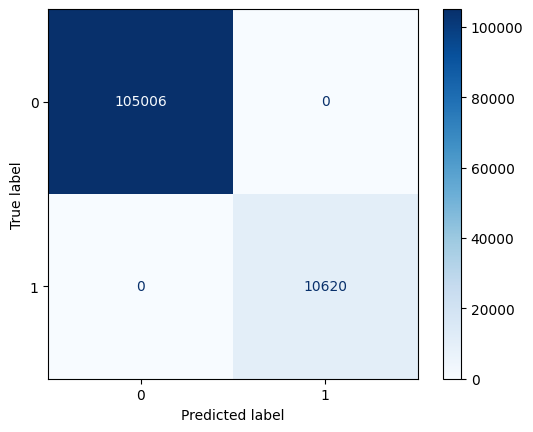

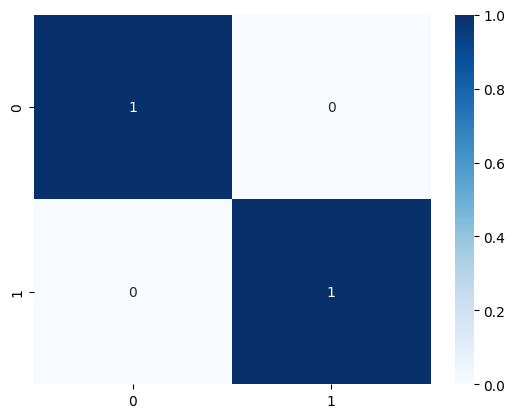

In [168]:
random_forest = dp.RandomForest(X_train, X_test, y_train, y_test)

random_forest.fit()

Fitting 5 folds for each of 243 candidates, totalling 1215 fits
Best parameters: {'gamma': 0, 'learning_rate': 0.1, 'max_depth': 7, 'min_child_weight': 1, 'n_estimators': 100}
Best Score: 0.9999960304858686
Best Estimator: XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=7, max_leaves=None,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...) 
The accuracy score is 1.0
 The 

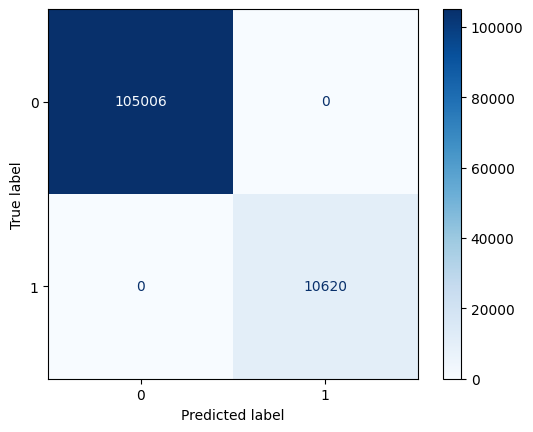

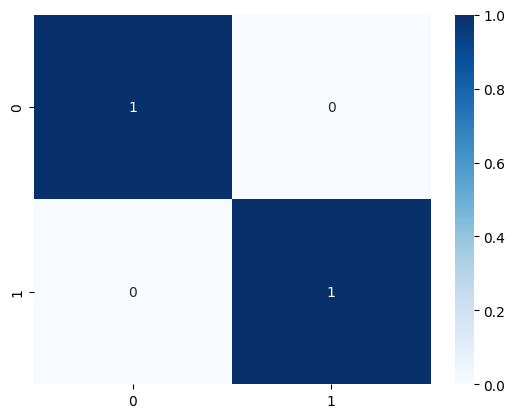

In [169]:
xgboost = dp.xgbClassifier(X_train, X_test, y_train, y_test)

xgboost.fit()

Fitting 5 folds for each of 81 candidates, totalling 405 fits
Best parameters: {'learning_rate': 0.1, 'max_depth': 7, 'max_features': None, 'n_estimators': 100}
Best Score: 0.9999960304858686
Best Estimator: GradientBoostingClassifier(max_depth=7, random_state=42) 
The accuracy score is 1.0
 The recall score is 1.0
 The f1 score is 1.0
 The ROC AUC score is 1.0

Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    105006
           1       1.00      1.00      1.00     10620

    accuracy                           1.00    115626
   macro avg       1.00      1.00      1.00    115626
weighted avg       1.00      1.00      1.00    115626


Cross validation score: [1.         0.99984123 1.         0.99984122 1.         1.
 1.         1.         1.         1.        ]

Mean cross validation score: 0.99996824451718



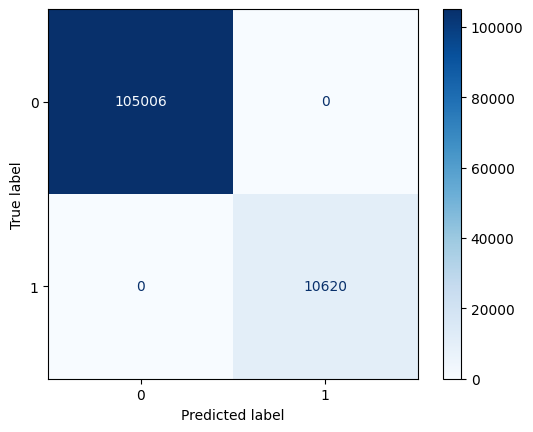

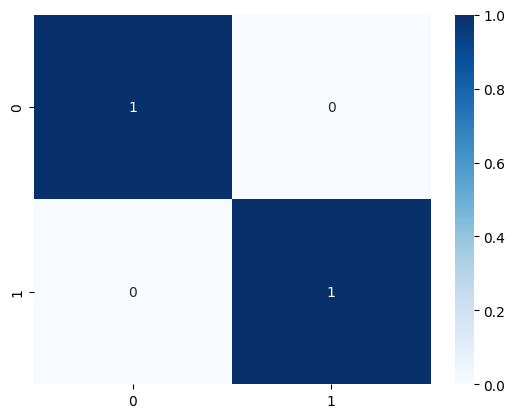

In [170]:
gb = dp.GradientBoost(X_train, X_test, y_train, y_test)

gb.fit()

Fitting 5 folds for each of 24 candidates, totalling 120 fits


c:\Users\LIR3060\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py:528: FitFailedWarning: 
60 fits failed out of a total of 120.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
60 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\LIR3060\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\LIR3060\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py", line 1382, in wrapper
    estimator._validate_params()
  File "c:\Users\LIR3060\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklear

Best parameters: {'algorithm': 'SAMME', 'learning_rate': 0.01, 'n_estimators': 50}
Best Score: 0.999988091615173
Best Estimator: AdaBoostClassifier(algorithm='SAMME',
                   estimator=RandomForestClassifier(class_weight='balanced_subsample',
                                                    criterion='entropy',
                                                    random_state=42),
                   learning_rate=0.01, random_state=42) 


c:\Users\LIR3060\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The parameter 'algorithm' is deprecated in 1.6 and has no effect. It will be removed in version 1.8.
  warnings.warn(


The accuracy score is 1.0
 The recall score is 1.0
 The f1 score is 1.0
 The ROC AUC score is 1.0

Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    105006
           1       1.00      1.00      1.00     10620

    accuracy                           1.00    115626
   macro avg       1.00      1.00      1.00    115626
weighted avg       1.00      1.00      1.00    115626




c:\Users\LIR3060\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The parameter 'algorithm' is deprecated in 1.6 and has no effect. It will be removed in version 1.8.
  warnings.warn(
c:\Users\LIR3060\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The parameter 'algorithm' is deprecated in 1.6 and has no effect. It will be removed in version 1.8.
  warnings.warn(
c:\Users\LIR3060\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The parameter 'algorithm' is deprecated in 1.6 and has no effect. It will be removed in version 1.8.
  warnings.warn(
c:\Users\LIR3060\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The parameter 'algorithm' is deprecated in 1.6 and has no effect. It will be removed in version 1.8.
  warnings.warn(


Cross validation score: [1.         0.99984123 1.         0.99984122 1.         1.
 1.         0.99984122 1.         1.        ]

Mean cross validation score: 0.999952366460654



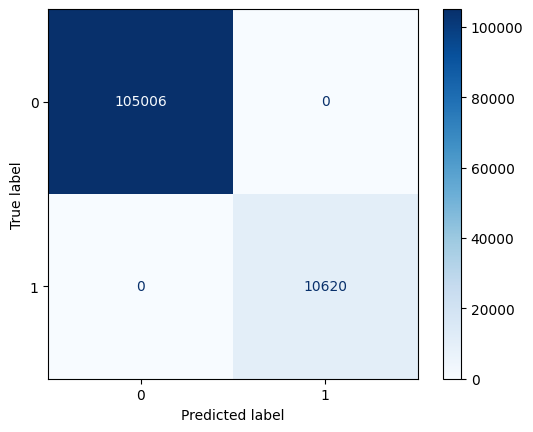

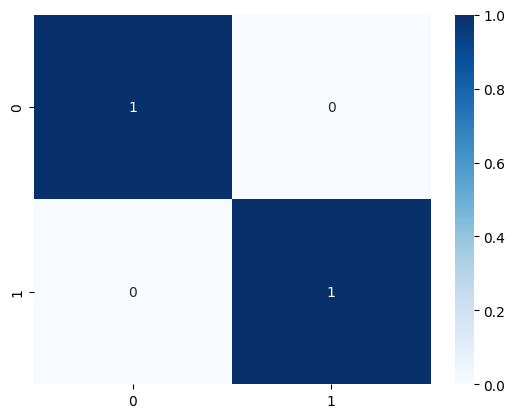

In [171]:
ada = dp.AdaBoost(X_train, X_test, y_train, y_test)

ada.fit()

Fitting 5 folds for each of 81 candidates, totalling 405 fits


c:\Users\LIR3060\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py:528: FitFailedWarning: 
270 fits failed out of a total of 405.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
270 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\LIR3060\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\LIR3060\AppData\Local\Programs\Python\Python312\Lib\site-packages\ngboost\ngboost.py", line 254, in fit
    return self.partial_fit(
           ^^^^^^^^^^^^^^^^^
  File "c:\Users\LIR3060\AppData\Local\Programs\Python\Python312

[iter 0] loss=0.6931 val_loss=0.0000 scale=256.0000 norm=512.0000
Best parameters: {'learning_rate': 0.01, 'max_depth': 7, 'minibatch_frac': 0.7, 'n_estimators': 100}
Best Score: 0.003256113957242888
Best Estimator: NGBClassifier(minibatch_frac=0.7, n_estimators=100,
              random_state=RandomState(MT19937) at 0x132F1050140) 


c:\Users\LIR3060\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\LIR3060\AppData\Local\Programs\Python\Python312\Lib\site-packages\ngboost\distns\categorical.py:12: RuntimeWarning: divide by zero encountered in log
  return -np.log(self.probs[Y, range(len(Y))])


[iter 0] loss=0.6931 val_loss=0.0000 scale=256.0000 norm=512.0000


c:\Users\LIR3060\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\LIR3060\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


The accuracy score is 0.9987286596440247
 The recall score is 0.9869803775690505
 The f1 score is 0.9931221634772844
 The ROC AUC score is 0.9990038045714041

Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    105006
           1       0.99      1.00      0.99     10620

    accuracy                           1.00    115626
   macro avg       0.99      1.00      1.00    115626
weighted avg       1.00      1.00      1.00    115626




c:\Users\LIR3060\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\LIR3060\AppData\Local\Programs\Python\Python312\Lib\site-packages\ngboost\distns\categorical.py:12: RuntimeWarning: divide by zero encountered in log
  return -np.log(self.probs[Y, range(len(Y))])


[iter 0] loss=0.6931 val_loss=0.0000 scale=256.0000 norm=512.0000


c:\Users\LIR3060\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\LIR3060\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\LIR3060\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\LIR3060\AppData\Local\Programs\Python\Python312\Lib\site-packages\ngboost\distns\categorical.py:12: RuntimeWarning: divide by zero encountered in log
  return -np.log(self.probs[Y, range(len(Y))])


[iter 0] loss=0.6931 val_loss=0.0000 scale=256.0000 norm=512.0000


c:\Users\LIR3060\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\LIR3060\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\LIR3060\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\LIR3060\AppData\Local\Programs\Python\Python312\Lib\site-packages\ngboost\distns\categorical.py:12: RuntimeWarning: divide by zero encountered in log
  return -np.log(self.probs[Y, range(len(Y))])


[iter 0] loss=0.6931 val_loss=0.0000 scale=256.0000 norm=512.0000


c:\Users\LIR3060\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\LIR3060\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\LIR3060\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\LIR3060\AppData\Local\Programs\Python\Python312\Lib\site-packages\ngboost\distns\categorical.py:12: RuntimeWarning: divide by zero encountered in log
  return -np.log(self.probs[Y, range(len(Y))])


[iter 0] loss=0.6931 val_loss=0.0000 scale=256.0000 norm=512.0000


c:\Users\LIR3060\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\LIR3060\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\LIR3060\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\LIR3060\AppData\Local\Programs\Python\Python312\Lib\site-packages\ngboost\distns\categorical.py:12: RuntimeWarning: divide by zero encountered in log
  return -np.log(self.probs[Y, range(len(Y))])


[iter 0] loss=0.6931 val_loss=0.0000 scale=256.0000 norm=512.0000


c:\Users\LIR3060\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\LIR3060\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\LIR3060\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\LIR3060\AppData\Local\Programs\Python\Python312\Lib\site-packages\ngboost\distns\categorical.py:12: RuntimeWarning: divide by zero encountered in log
  return -np.log(self.probs[Y, range(len(Y))])


[iter 0] loss=0.6931 val_loss=0.0000 scale=256.0000 norm=512.0000


c:\Users\LIR3060\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\LIR3060\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\LIR3060\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\LIR3060\AppData\Local\Programs\Python\Python312\Lib\site-packages\ngboost\distns\categorical.py:12: RuntimeWarning: divide by zero encountered in log
  return -np.log(self.probs[Y, range(len(Y))])


[iter 0] loss=0.6931 val_loss=0.0000 scale=256.0000 norm=512.0000


c:\Users\LIR3060\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\LIR3060\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\LIR3060\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\LIR3060\AppData\Local\Programs\Python\Python312\Lib\site-packages\ngboost\distns\categorical.py:12: RuntimeWarning: divide by zero encountered in log
  return -np.log(self.probs[Y, range(len(Y))])


[iter 0] loss=0.6931 val_loss=0.0000 scale=256.0000 norm=512.0000


c:\Users\LIR3060\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\LIR3060\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\LIR3060\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\LIR3060\AppData\Local\Programs\Python\Python312\Lib\site-packages\ngboost\distns\categorical.py:12: RuntimeWarning: divide by zero encountered in log
  return -np.log(self.probs[Y, range(len(Y))])


[iter 0] loss=0.6931 val_loss=0.0000 scale=256.0000 norm=512.0000


c:\Users\LIR3060\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\LIR3060\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\LIR3060\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\LIR3060\AppData\Local\Programs\Python\Python312\Lib\site-packages\ngboost\distns\categorical.py:12: RuntimeWarning: divide by zero encountered in log
  return -np.log(self.probs[Y, range(len(Y))])


[iter 0] loss=0.6931 val_loss=0.0000 scale=256.0000 norm=512.0000


c:\Users\LIR3060\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\LIR3060\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Cross validation score: [0.99555432 0.99650697 0.99603049 0.99571292 0.99618927 0.99682439
 0.99491902 0.99539536 0.99571292 0.99618927]

Mean cross validation score: 0.9959034929279058



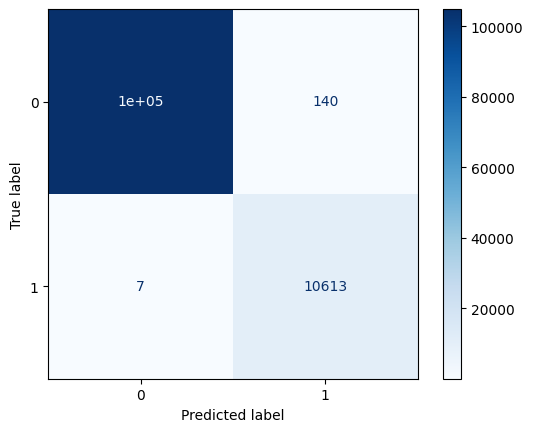

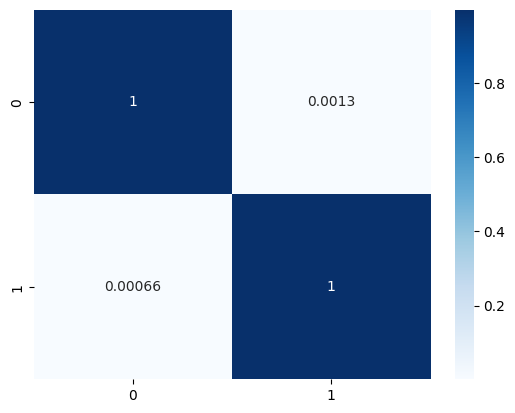

In [172]:
ngb = dp.ngboost(X_train, X_test, y_train, y_test)

ngb.fit()

The accuracy score is 0.999948108556899
 The recall score is 0.999623423084165
 The f1 score is 0.9997175407212127
 The ROC AUC score is 0.9998867915107569

Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    105006
           1       1.00      1.00      1.00     10620

    accuracy                           1.00    115626
   macro avg       1.00      1.00      1.00    115626
weighted avg       1.00      1.00      1.00    115626


Cross validation score: [0.99841226 0.99952368 0.99984122 0.99984122 0.99984122 0.99984122
 0.99984122 0.99888854 0.99872976 0.99984122]

Mean cross validation score: 0.9994601542711316



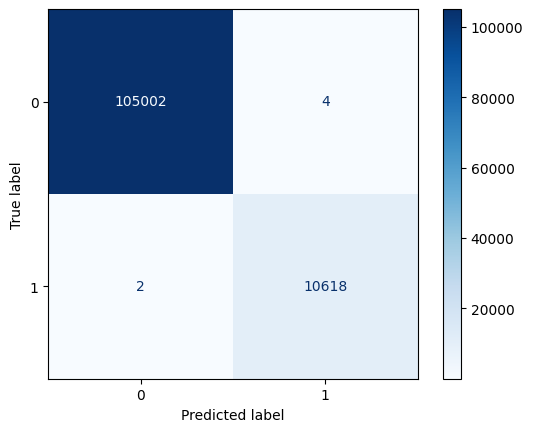

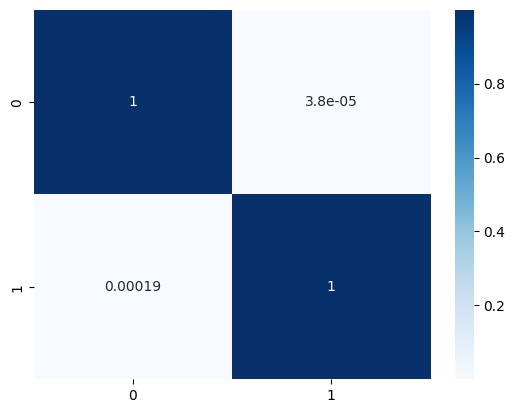

In [173]:
mlp = dp.ANN(X_train, X_test, y_train, y_test)

mlp.fit()

### ADASYN

In [174]:
# 18 feature Columns

df= pd.read_csv('C:\\Users\\LIR3060\\Desktop\\Patricio\\NEO\\NEO\\API_test\\CSV\\neo_data_copy1.csv')
df = dp.OverallProcessor(df).clean2()
df.shape

(578127, 19)

In [175]:
# 5 feature Columns
#df = dp.OverallProcessor(df).smote()
spt = dp.scalesplit(df)

X_train, X_test, y_train, y_test = spt.ttsplitadasyn()

X_train

array([[-0.9260489 , -0.37053054, -0.43885269, ...,  0.08002784,
         0.08002784,  0.08002784],
       [ 0.38503235, -0.835229  , -0.85237111, ..., -0.23044022,
        -0.23044022, -0.23044022],
       [-0.50596085, -0.96812133, -0.10993791, ..., -0.08237192,
        -0.08237192, -0.08237192],
       ...,
       [-1.56634439, -0.65631071,  5.83981722, ...,  0.59806822,
         0.59806822,  0.59806822],
       [-1.51877303, -0.47171671,  5.73641405, ...,  0.5433781 ,
         0.5433781 ,  0.5433781 ],
       [-1.50457293, -0.72977559,  5.98056503, ...,  0.52705305,
         0.52705305,  0.52705305]])

In [176]:
samplesize = 0.3


X_train, _, y_train, _, = train_test_split(X_train, y_train, train_size= samplesize, stratify=y_train, random_state=42)

print(len(X_train), len(y_train))

251893 251893


#### Models

c:\Users\LIR3060\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py:528: FitFailedWarning: 
1800 fits failed out of a total of 2880.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
118 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\LIR3060\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\LIR3060\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py", line 1382, in wrapper
    estimator._validate_params()
  File "c:\Users\LIR3060\AppData\Local\Programs\Python\Python312\Lib\site-packages\sk

Best parameters: {'C': 1, 'fit_intercept': True, 'n_jobs': 8, 'penalty': 'l2', 'random_state': 0, 'solver': 'liblinear', 'warm_start': True}
Best Score: 0.9746479650819498
Best Estimator: LogisticRegression(C=1, n_jobs=8, random_state=0, solver='liblinear',
                   warm_start=True) 
The accuracy score is 0.957587393838756
 The recall score is 0.7198799815356208
 The f1 score is 0.7923617579812008
 The ROC AUC score is 0.9231996186174348

Classification Report: 
               precision    recall  f1-score   support

           0       0.99      0.97      0.98    105006
           1       0.72      0.88      0.79     10620

    accuracy                           0.96    115626
   macro avg       0.85      0.92      0.88    115626
weighted avg       0.96      0.96      0.96    115626


Cross validation score: [0.90059547 0.90011909 0.89948392 0.90313232 0.90011513 0.89519234
 0.89344555 0.89678034 0.89884473 0.89678034]

Mean cross validation score: 0.8984489239383441



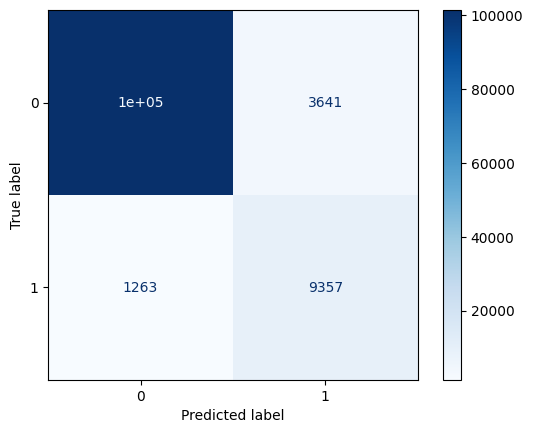

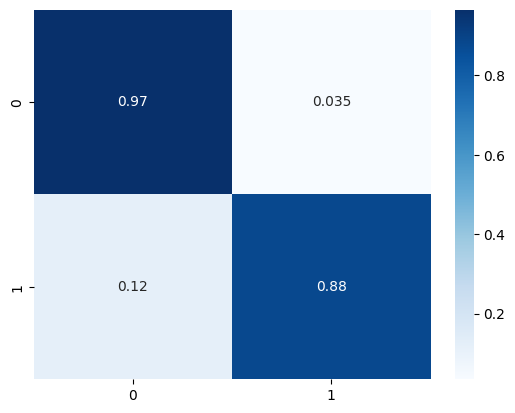

In [177]:
log_reg = dp.LogRegression(X_train, X_test, y_train, y_test)

log_reg.fit()

Fitting 5 folds for each of 270 candidates, totalling 1350 fits
Best parameters: {'alpha': 0.0001, 'eta0': 0.01, 'learning_rate': 'adaptive', 'loss': 'hinge', 'penalty': 'l1'}
Best Score: 0.9768870098757576
Best Estimator: SGDClassifier(eta0=0.01, learning_rate='adaptive', penalty='l1',
              random_state=42) 
The accuracy score is 0.9576825281511079
 The recall score is 0.71694825365558
 The f1 score is 0.7945757588479785
 The ROC AUC score is 0.9277378473180602

Classification Report: 
               precision    recall  f1-score   support

           0       0.99      0.96      0.98    105006
           1       0.72      0.89      0.79     10620

    accuracy                           0.96    115626
   macro avg       0.85      0.93      0.89    115626
weighted avg       0.96      0.96      0.96    115626


Cross validation score: [0.91361651 0.90980548 0.90281858 0.91345428 0.9090079  0.90551431
 0.90599071 0.90424391 0.90630831 0.90472031]

Mean cross validation score: 0.9

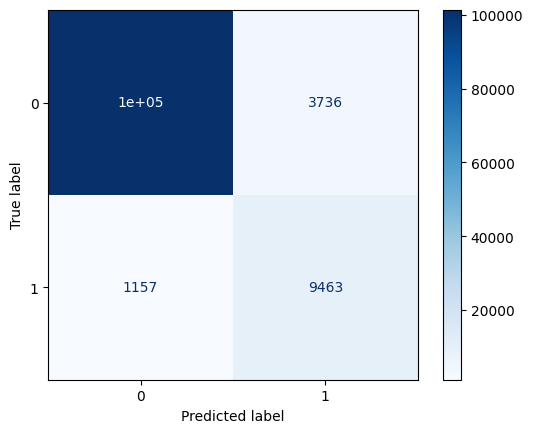

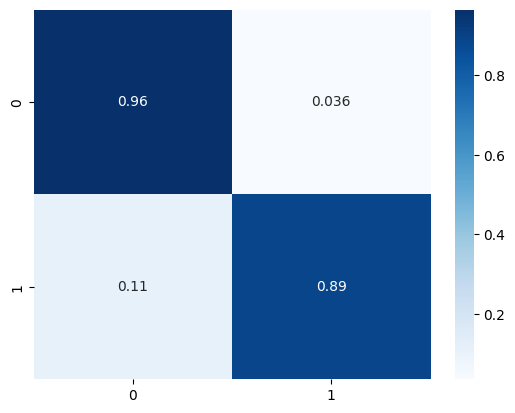

In [178]:
svm = dp.supportvm(X_train, X_test, y_train, y_test)

svm.fit()

Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters: {'bootstrap': True, 'criterion': 'entropy', 'max_features': 'sqrt'}
Best Score: 0.9999960300919033
Best Estimator: RandomForestClassifier(criterion='entropy', random_state=42) 
The accuracy score is 1.0
 The recall score is 1.0
 The f1 score is 1.0
 The ROC AUC score is 1.0

Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    105006
           1       1.00      1.00      1.00     10620

    accuracy                           1.00    115626
   macro avg       1.00      1.00      1.00    115626
weighted avg       1.00      1.00      1.00    115626


Cross validation score: [1.        1.        1.        1.        1.        1.        0.9998412
 1.        0.9995236 1.       ]

Mean cross validation score: 0.9999364802087143



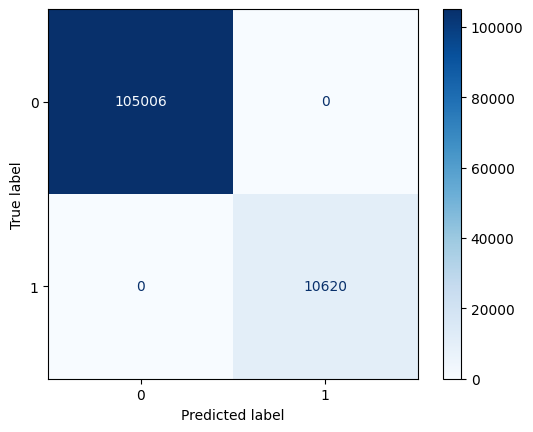

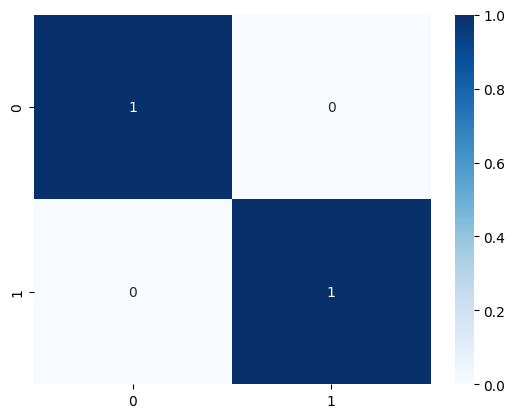

In [179]:
random_forest = dp.RandomForest(X_train, X_test, y_train, y_test)

random_forest.fit()

Fitting 5 folds for each of 243 candidates, totalling 1215 fits
Best parameters: {'gamma': 0, 'learning_rate': 0.2, 'max_depth': 3, 'min_child_weight': 5, 'n_estimators': 300}
Best Score: 0.9999920601050043
Best Estimator: XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.2, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=5, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=300, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...) 
The accuracy score is 1.0
 The 

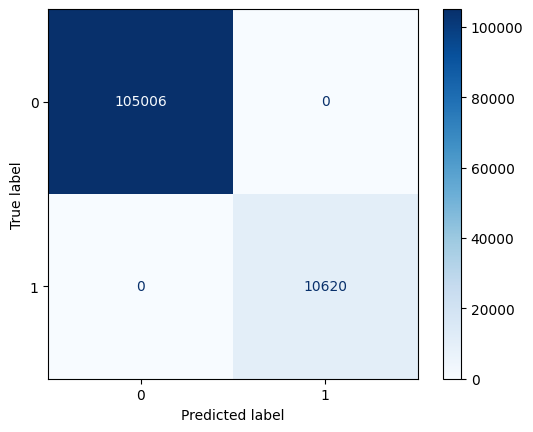

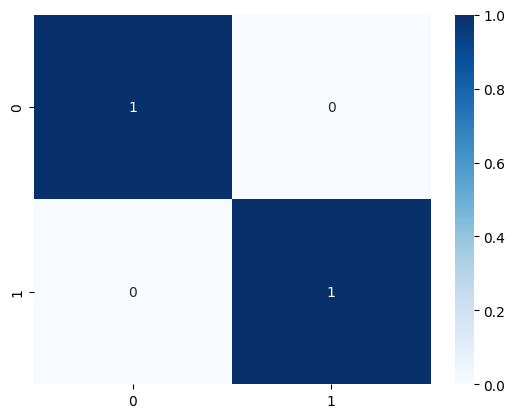

In [180]:
xgboost = dp.xgbClassifier(X_train, X_test, y_train, y_test)

xgboost.fit()

Fitting 5 folds for each of 81 candidates, totalling 405 fits
Best parameters: {'learning_rate': 0.1, 'max_depth': 5, 'max_features': 'sqrt', 'n_estimators': 300}
Best Score: 0.9999920601838067
Best Estimator: GradientBoostingClassifier(max_depth=5, max_features='sqrt', n_estimators=300,
                           random_state=42) 
The accuracy score is 1.0
 The recall score is 1.0
 The f1 score is 1.0
 The ROC AUC score is 1.0

Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    105006
           1       1.00      1.00      1.00     10620

    accuracy                           1.00    115626
   macro avg       1.00      1.00      1.00    115626
weighted avg       1.00      1.00      1.00    115626


Cross validation score: [1.        1.        1.        1.        1.        1.        1.
 1.        0.9995236 0.9998412]

Mean cross validation score: 0.9999364802087143



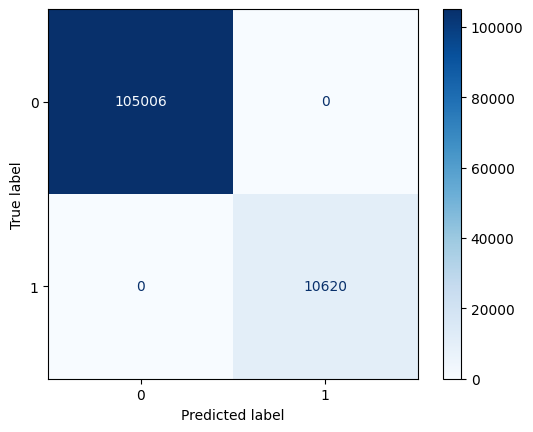

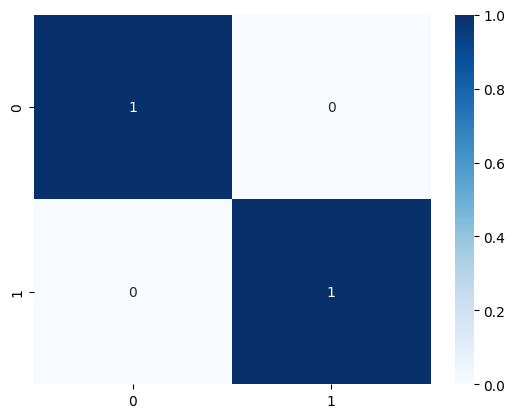

In [181]:
gb = dp.GradientBoost(X_train, X_test, y_train, y_test)

gb.fit()

Fitting 5 folds for each of 24 candidates, totalling 120 fits


c:\Users\LIR3060\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py:528: FitFailedWarning: 
60 fits failed out of a total of 120.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
60 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\LIR3060\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\LIR3060\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py", line 1382, in wrapper
    estimator._validate_params()
  File "c:\Users\LIR3060\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklear

Best parameters: {'algorithm': 'SAMME', 'learning_rate': 0.01, 'n_estimators': 50}
Best Score: 0.9999960300919033
Best Estimator: AdaBoostClassifier(algorithm='SAMME',
                   estimator=RandomForestClassifier(class_weight='balanced_subsample',
                                                    criterion='entropy',
                                                    random_state=42),
                   learning_rate=0.01, random_state=42) 


c:\Users\LIR3060\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The parameter 'algorithm' is deprecated in 1.6 and has no effect. It will be removed in version 1.8.
  warnings.warn(


The accuracy score is 1.0
 The recall score is 1.0
 The f1 score is 1.0
 The ROC AUC score is 1.0

Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    105006
           1       1.00      1.00      1.00     10620

    accuracy                           1.00    115626
   macro avg       1.00      1.00      1.00    115626
weighted avg       1.00      1.00      1.00    115626




c:\Users\LIR3060\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The parameter 'algorithm' is deprecated in 1.6 and has no effect. It will be removed in version 1.8.
  warnings.warn(
c:\Users\LIR3060\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The parameter 'algorithm' is deprecated in 1.6 and has no effect. It will be removed in version 1.8.
  warnings.warn(
c:\Users\LIR3060\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The parameter 'algorithm' is deprecated in 1.6 and has no effect. It will be removed in version 1.8.
  warnings.warn(
c:\Users\LIR3060\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The parameter 'algorithm' is deprecated in 1.6 and has no effect. It will be removed in version 1.8.
  warnings.warn(


Cross validation score: [1.        1.        1.        1.        1.        1.        1.
 1.        0.9995236 1.       ]

Mean cross validation score: 0.9999523601565358



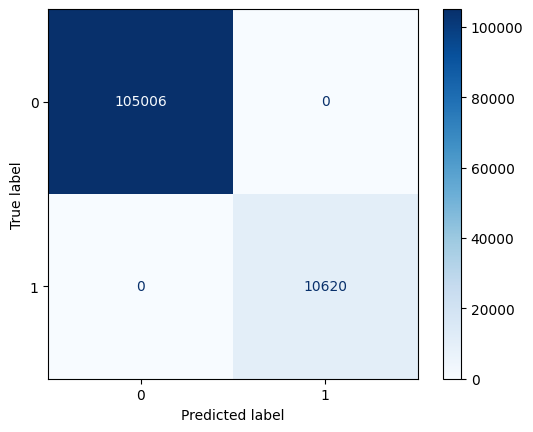

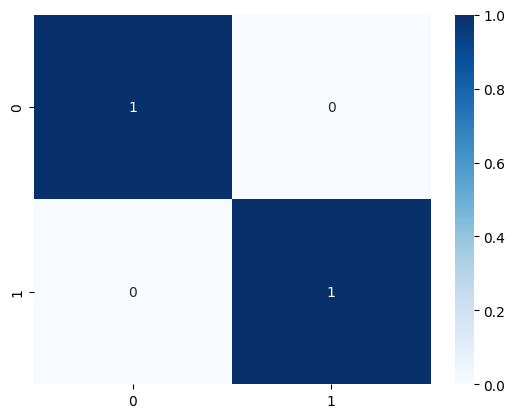

In [182]:
ada = dp.AdaBoost(X_train, X_test, y_train, y_test)

ada.fit()

Fitting 5 folds for each of 81 candidates, totalling 405 fits


c:\Users\LIR3060\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py:528: FitFailedWarning: 
270 fits failed out of a total of 405.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
270 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\LIR3060\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\LIR3060\AppData\Local\Programs\Python\Python312\Lib\site-packages\ngboost\ngboost.py", line 254, in fit
    return self.partial_fit(
           ^^^^^^^^^^^^^^^^^
  File "c:\Users\LIR3060\AppData\Local\Programs\Python\Python312

[iter 0] loss=0.6931 val_loss=0.0000 scale=256.0000 norm=512.0000
Best parameters: {'learning_rate': 0.01, 'max_depth': 5, 'minibatch_frac': 1.0, 'n_estimators': 100}
Best Score: 0.003651180947772798
Best Estimator: NGBClassifier(n_estimators=100,
              random_state=RandomState(MT19937) at 0x132F1050140) 


c:\Users\LIR3060\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\LIR3060\AppData\Local\Programs\Python\Python312\Lib\site-packages\ngboost\distns\categorical.py:12: RuntimeWarning: divide by zero encountered in log
  return -np.log(self.probs[Y, range(len(Y))])


[iter 0] loss=0.6931 val_loss=0.0000 scale=256.0000 norm=512.0000


c:\Users\LIR3060\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\LIR3060\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


The accuracy score is 0.9976821822081539
 The recall score is 0.9753857457751653
 The f1 score is 0.9875395201785382
 The ROC AUC score is 0.9987238824448127

Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    105006
           1       0.98      1.00      0.99     10620

    accuracy                           1.00    115626
   macro avg       0.99      1.00      0.99    115626
weighted avg       1.00      1.00      1.00    115626




c:\Users\LIR3060\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\LIR3060\AppData\Local\Programs\Python\Python312\Lib\site-packages\ngboost\distns\categorical.py:12: RuntimeWarning: divide by zero encountered in log
  return -np.log(self.probs[Y, range(len(Y))])


[iter 0] loss=0.6931 val_loss=0.0000 scale=256.0000 norm=512.0000


c:\Users\LIR3060\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\LIR3060\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\LIR3060\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\LIR3060\AppData\Local\Programs\Python\Python312\Lib\site-packages\ngboost\distns\categorical.py:12: RuntimeWarning: divide by zero encountered in log
  return -np.log(self.probs[Y, range(len(Y))])


[iter 0] loss=0.6931 val_loss=0.0000 scale=256.0000 norm=512.0000


c:\Users\LIR3060\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\LIR3060\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\LIR3060\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\LIR3060\AppData\Local\Programs\Python\Python312\Lib\site-packages\ngboost\distns\categorical.py:12: RuntimeWarning: divide by zero encountered in log
  return -np.log(self.probs[Y, range(len(Y))])


[iter 0] loss=0.6931 val_loss=0.0000 scale=256.0000 norm=512.0000


c:\Users\LIR3060\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\LIR3060\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\LIR3060\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\LIR3060\AppData\Local\Programs\Python\Python312\Lib\site-packages\ngboost\distns\categorical.py:12: RuntimeWarning: divide by zero encountered in log
  return -np.log(self.probs[Y, range(len(Y))])


[iter 0] loss=0.6931 val_loss=0.0000 scale=256.0000 norm=512.0000


c:\Users\LIR3060\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\LIR3060\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\LIR3060\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\LIR3060\AppData\Local\Programs\Python\Python312\Lib\site-packages\ngboost\distns\categorical.py:12: RuntimeWarning: divide by zero encountered in log
  return -np.log(self.probs[Y, range(len(Y))])


[iter 0] loss=0.6931 val_loss=0.0000 scale=256.0000 norm=512.0000


c:\Users\LIR3060\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\LIR3060\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\LIR3060\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\LIR3060\AppData\Local\Programs\Python\Python312\Lib\site-packages\ngboost\distns\categorical.py:12: RuntimeWarning: divide by zero encountered in log
  return -np.log(self.probs[Y, range(len(Y))])


[iter 0] loss=0.6931 val_loss=0.0000 scale=256.0000 norm=512.0000


c:\Users\LIR3060\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\LIR3060\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\LIR3060\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\LIR3060\AppData\Local\Programs\Python\Python312\Lib\site-packages\ngboost\distns\categorical.py:12: RuntimeWarning: divide by zero encountered in log
  return -np.log(self.probs[Y, range(len(Y))])


[iter 0] loss=0.6931 val_loss=0.0000 scale=256.0000 norm=512.0000


c:\Users\LIR3060\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\LIR3060\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\LIR3060\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\LIR3060\AppData\Local\Programs\Python\Python312\Lib\site-packages\ngboost\distns\categorical.py:12: RuntimeWarning: divide by zero encountered in log
  return -np.log(self.probs[Y, range(len(Y))])


[iter 0] loss=0.6931 val_loss=0.0000 scale=256.0000 norm=512.0000


c:\Users\LIR3060\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\LIR3060\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\LIR3060\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\LIR3060\AppData\Local\Programs\Python\Python312\Lib\site-packages\ngboost\distns\categorical.py:12: RuntimeWarning: divide by zero encountered in log
  return -np.log(self.probs[Y, range(len(Y))])


[iter 0] loss=0.6931 val_loss=0.0000 scale=256.0000 norm=512.0000


c:\Users\LIR3060\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\LIR3060\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\LIR3060\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\LIR3060\AppData\Local\Programs\Python\Python312\Lib\site-packages\ngboost\distns\categorical.py:12: RuntimeWarning: divide by zero encountered in log
  return -np.log(self.probs[Y, range(len(Y))])


[iter 0] loss=0.6931 val_loss=0.0000 scale=256.0000 norm=512.0000


c:\Users\LIR3060\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\LIR3060\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Cross validation score: [0.99603017 0.99460103 0.99491862 0.99555361 0.99460082 0.99460082
 0.99539482 0.99348922 0.99396562 0.99348922]

Mean cross validation score: 0.9946643949029023



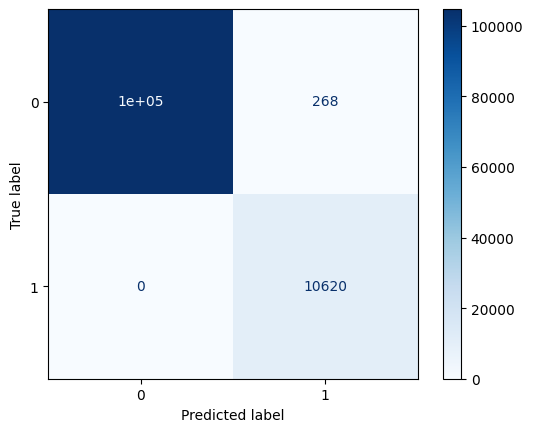

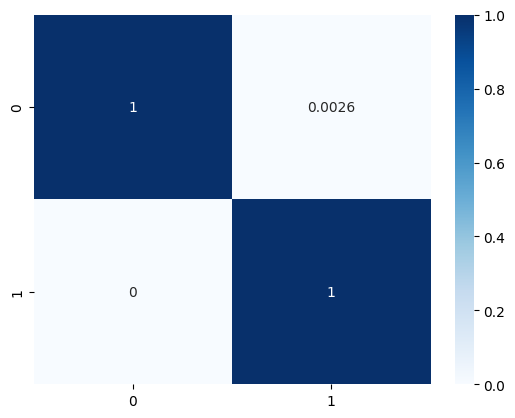

In [183]:
ngb = dp.ngboost(X_train, X_test, y_train, y_test)

ngb.fit()

The accuracy score is 0.9998875685399478
 The recall score is 0.9988712256608033
 The f1 score is 0.9993882640816902
 The ROC AUC score is 0.9998957794286925

Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    105006
           1       1.00      1.00      1.00     10620

    accuracy                           1.00    115626
   macro avg       1.00      1.00      1.00    115626
weighted avg       1.00      1.00      1.00    115626


Cross validation score: [0.99968241 0.99984121 0.99952362 0.999206   1.         1.
 0.9995236  0.9993648  0.9985708  0.9993648 ]

Mean cross validation score: 0.9995077254001272



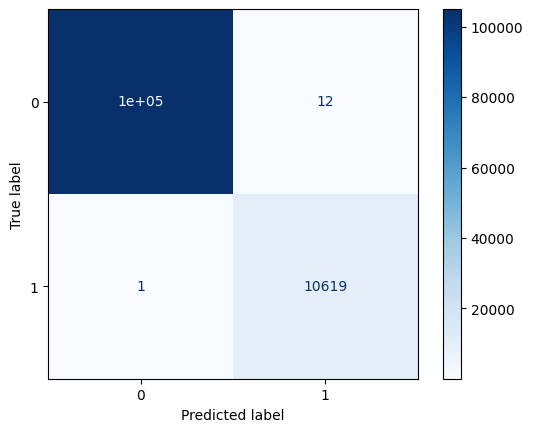

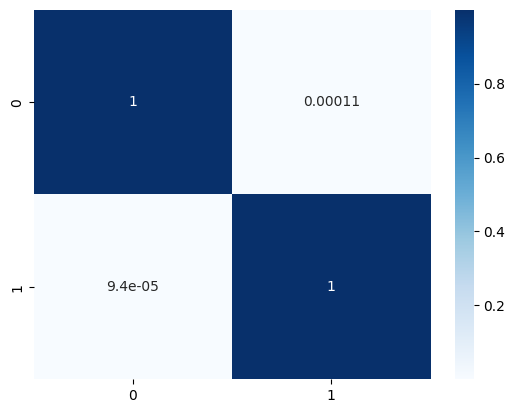

In [184]:
mlp = dp.ANN(X_train, X_test, y_train, y_test)

mlp.fit()

### Random Under Sample

In [185]:
# 18 feature Columns

df= pd.read_csv('C:\\Users\\LIR3060\\Desktop\\Patricio\\NEO\\NEO\\API_test\\CSV\\neo_data_copy1.csv')
df = dp.OverallProcessor(df).clean2()
df.shape

(578127, 19)

In [186]:
# 5 feature Columns
#df = dp.OverallProcessor(df).smote()
spt = dp.scalesplit(df)

X_train, X_test, y_train, y_test = spt.ttsplitrus()

X_train.shape

(85262, 18)

In [187]:
samplesize = 0.3


X_train, _, y_train, _, = train_test_split(X_train, y_train, train_size= samplesize, stratify=y_train, random_state=42)

print(len(X_train), len(y_train))

25578 25578


#### Models

c:\Users\LIR3060\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py:528: FitFailedWarning: 
1800 fits failed out of a total of 2880.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
191 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\LIR3060\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\LIR3060\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py", line 1382, in wrapper
    estimator._validate_params()
  File "c:\Users\LIR3060\AppData\Local\Programs\Python\Python312\Lib\site-packages\sk

Best parameters: {'C': 0.1, 'fit_intercept': True, 'n_jobs': 8, 'penalty': 'l2', 'random_state': 0, 'solver': 'newton-cholesky', 'warm_start': True}
Best Score: 0.9635621976785689
Best Estimator: LogisticRegression(C=0.1, n_jobs=8, random_state=0, solver='newton-cholesky',
                   warm_start=True) 
The accuracy score is 0.9440783214847872
 The recall score is 0.623660395332222
 The f1 score is 0.7641523198132477
 The ROC AUC score is 0.9630749779054864

Classification Report: 
               precision    recall  f1-score   support

           0       1.00      0.94      0.97    105006
           1       0.62      0.99      0.76     10620

    accuracy                           0.94    115626
   macro avg       0.81      0.96      0.87    115626
weighted avg       0.96      0.94      0.95    115626


Cross validation score: [0.848319   0.83580923 0.85301016 0.86551994 0.83737295 0.84206411
 0.85613761 0.88115715 0.84825966 0.86546732]

Mean cross validation score: 0.853311712

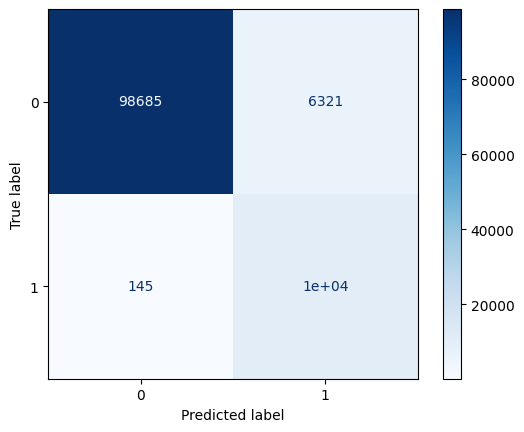

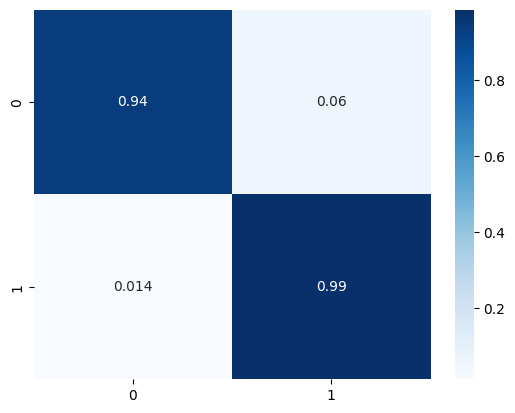

In [188]:
log_reg = dp.LogRegression(X_train, X_test, y_train, y_test)

log_reg.fit()

Fitting 5 folds for each of 270 candidates, totalling 1350 fits
Best parameters: {'alpha': 0.001, 'eta0': 0.01, 'learning_rate': 'adaptive', 'loss': 'log_loss', 'penalty': 'l1'}
Best Score: 0.9636794462315912
Best Estimator: SGDClassifier(alpha=0.001, eta0=0.01, learning_rate='adaptive', loss='log_loss',
              penalty='l1', random_state=42) 
The accuracy score is 0.9466123536228875
 The recall score is 0.634978449584168
 The f1 score is 0.772155169231905
 The ROC AUC score is 0.9638353460781525

Classification Report: 
               precision    recall  f1-score   support

           0       1.00      0.94      0.97    105006
           1       0.63      0.98      0.77     10620

    accuracy                           0.95    115626
   macro avg       0.82      0.96      0.87    115626
weighted avg       0.97      0.95      0.95    115626


Cross validation score: [0.84675528 0.84050039 0.85770133 0.86864738 0.83893667 0.84206411
 0.85301016 0.88584832 0.83887366 0.87016032]



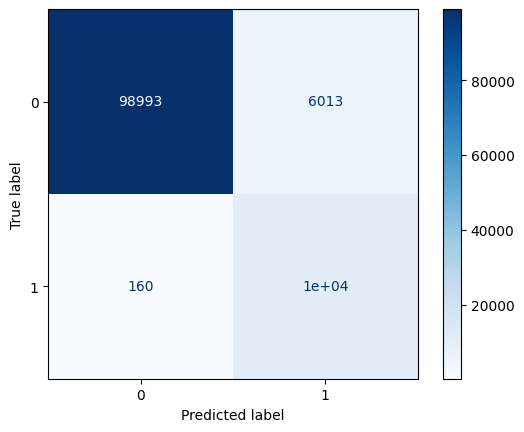

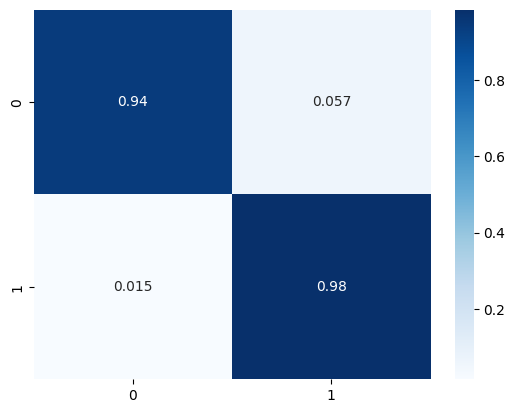

In [189]:
svm = dp.supportvm(X_train, X_test, y_train, y_test)

svm.fit()

Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters: {'bootstrap': False, 'criterion': 'gini', 'max_features': 'sqrt'}
Best Score: 0.9998436125485988
Best Estimator: RandomForestClassifier(bootstrap=False, random_state=42) 
The accuracy score is 0.9997837856537457
 The recall score is 0.9976514795678723
 The f1 score is 0.9988243592758053
 The ROC AUC score is 0.9998809591832848

Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    105006
           1       1.00      1.00      1.00     10620

    accuracy                           1.00    115626
   macro avg       1.00      1.00      1.00    115626
weighted avg       1.00      1.00      1.00    115626


Cross validation score: [0.99843628 1.         0.99843628 0.99843628 1.         1.
 1.         1.         1.         0.99843567]

Mean cross validation score: 0.9993744501585136



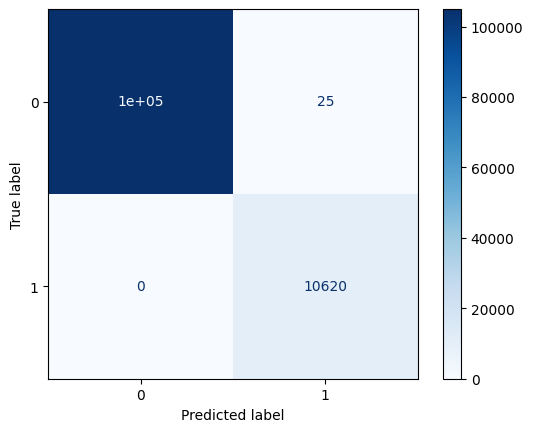

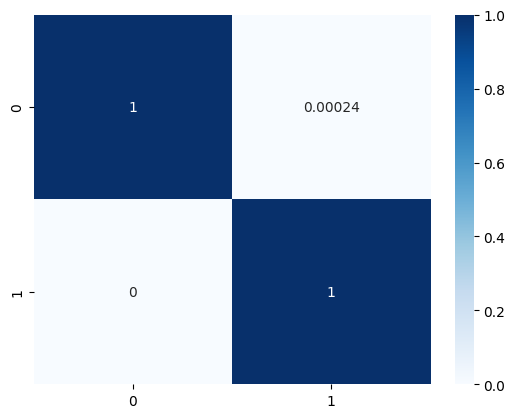

In [190]:
random_forest = dp.RandomForest(X_train, X_test, y_train, y_test)

random_forest.fit()

Fitting 5 folds for each of 243 candidates, totalling 1215 fits
Best parameters: {'gamma': 0, 'learning_rate': 0.2, 'max_depth': 3, 'min_child_weight': 3, 'n_estimators': 200}
Best Score: 0.9998827208756842
Best Estimator: XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.2, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=3, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=200, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...) 
The accuracy score is 0.9997664

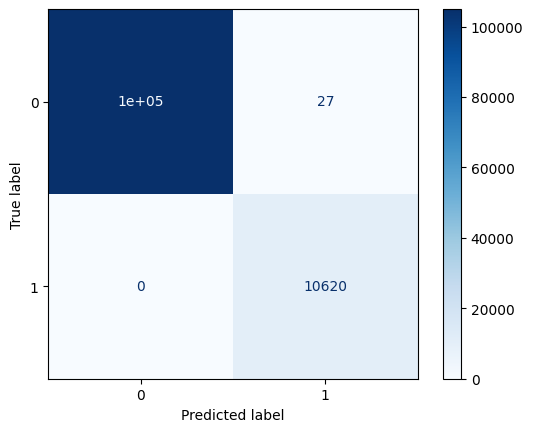

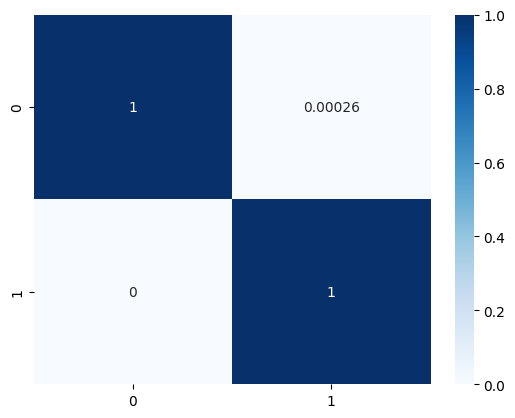

In [191]:
xgboost = dp.xgbClassifier(X_train, X_test, y_train, y_test)

xgboost.fit()

Fitting 5 folds for each of 81 candidates, totalling 405 fits
Best parameters: {'learning_rate': 0.1, 'max_depth': 5, 'max_features': 'sqrt', 'n_estimators': 100}
Best Score: 0.9998436125485988
Best Estimator: GradientBoostingClassifier(max_depth=5, max_features='sqrt', random_state=42) 
The accuracy score is 0.9999221628353484
 The recall score is 0.9991532599491956
 The f1 score is 0.9995764506565015
 The ROC AUC score is 0.9999571453059825

Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    105006
           1       1.00      1.00      1.00     10620

    accuracy                           1.00    115626
   macro avg       1.00      1.00      1.00    115626
weighted avg       1.00      1.00      1.00    115626


Cross validation score: [0.99843628 1.         0.99843628 0.99843628 1.         1.
 1.         1.         1.         0.99687133]

Mean cross validation score: 0.9992180168142903



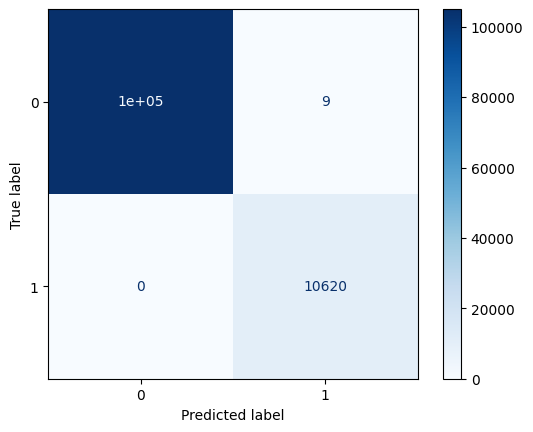

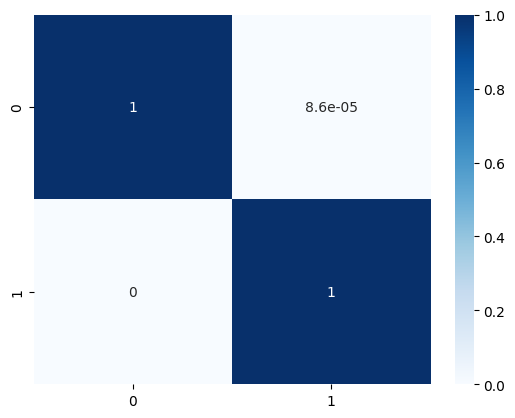

In [192]:
gb = dp.GradientBoost(X_train, X_test, y_train, y_test)

gb.fit()

Fitting 5 folds for each of 24 candidates, totalling 120 fits


c:\Users\LIR3060\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py:528: FitFailedWarning: 
60 fits failed out of a total of 120.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
60 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\LIR3060\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\LIR3060\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py", line 1382, in wrapper
    estimator._validate_params()
  File "c:\Users\LIR3060\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklear

Best parameters: {'algorithm': 'SAMME', 'learning_rate': 0.01, 'n_estimators': 50}
Best Score: 0.9998045118643368
Best Estimator: AdaBoostClassifier(algorithm='SAMME',
                   estimator=RandomForestClassifier(class_weight='balanced_subsample',
                                                    criterion='entropy',
                                                    random_state=42),
                   learning_rate=0.01, random_state=42) 


c:\Users\LIR3060\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The parameter 'algorithm' is deprecated in 1.6 and has no effect. It will be removed in version 1.8.
  warnings.warn(


The accuracy score is 0.9997405427844949
 The recall score is 0.9971830985915493
 The f1 score is 0.998589562764457
 The ROC AUC score is 0.9998571510199417

Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    105006
           1       1.00      1.00      1.00     10620

    accuracy                           1.00    115626
   macro avg       1.00      1.00      1.00    115626
weighted avg       1.00      1.00      1.00    115626




c:\Users\LIR3060\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The parameter 'algorithm' is deprecated in 1.6 and has no effect. It will be removed in version 1.8.
  warnings.warn(
c:\Users\LIR3060\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The parameter 'algorithm' is deprecated in 1.6 and has no effect. It will be removed in version 1.8.
  warnings.warn(
c:\Users\LIR3060\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The parameter 'algorithm' is deprecated in 1.6 and has no effect. It will be removed in version 1.8.
  warnings.warn(
c:\Users\LIR3060\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The parameter 'algorithm' is deprecated in 1.6 and has no effect. It will be removed in version 1.8.
  warnings.warn(


Cross validation score: [0.99843628 1.         0.99843628 0.99843628 1.         1.
 1.         1.         1.         0.99843567]

Mean cross validation score: 0.9993744501585136



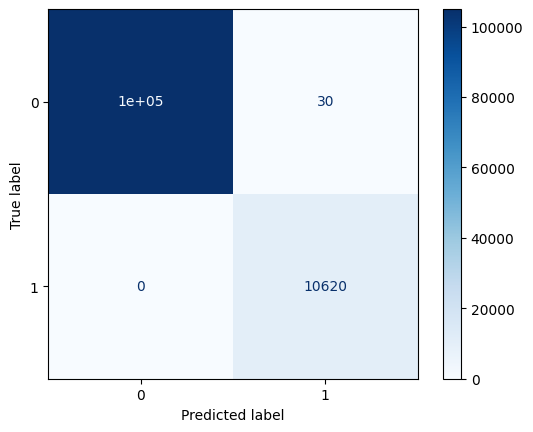

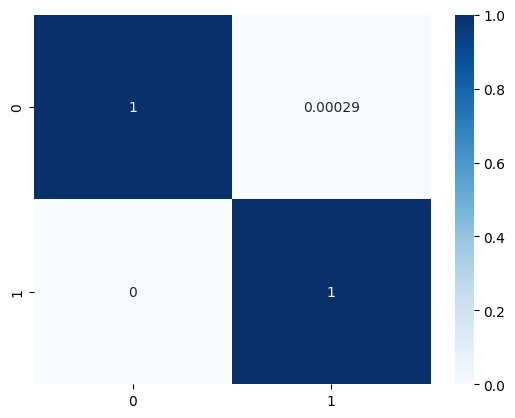

In [193]:
ada = dp.AdaBoost(X_train, X_test, y_train, y_test)

ada.fit()

#dump(ada, '/Volumes/Maestria/GitHub/NEO/NEO/Exports/API/best_model_18.sav' )

Fitting 5 folds for each of 81 candidates, totalling 405 fits


c:\Users\LIR3060\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py:528: FitFailedWarning: 
272 fits failed out of a total of 405.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
272 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\LIR3060\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\LIR3060\AppData\Local\Programs\Python\Python312\Lib\site-packages\ngboost\ngboost.py", line 254, in fit
    return self.partial_fit(
           ^^^^^^^^^^^^^^^^^
  File "c:\Users\LIR3060\AppData\Local\Programs\Python\Python312

[iter 0] loss=0.6931 val_loss=0.0000 scale=256.0000 norm=512.0000
Best parameters: {'learning_rate': 0.01, 'max_depth': 7, 'minibatch_frac': 1.0, 'n_estimators': 100}
Best Score: 0.005522041062205336
Best Estimator: NGBClassifier(n_estimators=100,
              random_state=RandomState(MT19937) at 0x132F1050140) 
[iter 0] loss=0.6931 val_loss=0.0000 scale=256.0000 norm=512.0000


c:\Users\LIR3060\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\LIR3060\AppData\Local\Programs\Python\Python312\Lib\site-packages\ngboost\distns\categorical.py:12: RuntimeWarning: divide by zero encountered in log
  return -np.log(self.probs[Y, range(len(Y))])
c:\Users\LIR3060\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\LIR3060\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


The accuracy score is 0.9987978482348261
 The recall score is 0.9873523667813633
 The f1 score is 0.9934964675057315
 The ROC AUC score is 0.9992111750192161

Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    105006
           1       0.99      1.00      0.99     10620

    accuracy                           1.00    115626
   macro avg       0.99      1.00      1.00    115626
weighted avg       1.00      1.00      1.00    115626


[iter 0] loss=0.6931 val_loss=0.0000 scale=256.0000 norm=512.0000


c:\Users\LIR3060\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\LIR3060\AppData\Local\Programs\Python\Python312\Lib\site-packages\ngboost\distns\categorical.py:12: RuntimeWarning: divide by zero encountered in log
  return -np.log(self.probs[Y, range(len(Y))])
c:\Users\LIR3060\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\LIR3060\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\LIR3060\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\deprecation.py:

[iter 0] loss=0.6931 val_loss=0.0000 scale=128.0000 norm=256.0000


c:\Users\LIR3060\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\LIR3060\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\LIR3060\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\LIR3060\AppData\Local\Programs\Python\Python312\Lib\site-packages\ngboost\distns\categorical.py:12: RuntimeWarning: divide by zero encountered in log
  return -np.log(self.probs[Y, range(len(Y))])


[iter 0] loss=0.6931 val_loss=0.0000 scale=256.0000 norm=512.0000


c:\Users\LIR3060\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\LIR3060\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\LIR3060\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\LIR3060\AppData\Local\Programs\Python\Python312\Lib\site-packages\ngboost\distns\categorical.py:12: RuntimeWarning: divide by zero encountered in log
  return -np.log(self.probs[Y, range(len(Y))])


[iter 0] loss=0.6931 val_loss=0.0000 scale=256.0000 norm=512.0000


c:\Users\LIR3060\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\LIR3060\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\LIR3060\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\LIR3060\AppData\Local\Programs\Python\Python312\Lib\site-packages\ngboost\distns\categorical.py:12: RuntimeWarning: divide by zero encountered in log
  return -np.log(self.probs[Y, range(len(Y))])


[iter 0] loss=0.6931 val_loss=0.0000 scale=256.0000 norm=512.0000


c:\Users\LIR3060\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\LIR3060\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\LIR3060\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\LIR3060\AppData\Local\Programs\Python\Python312\Lib\site-packages\ngboost\distns\categorical.py:12: RuntimeWarning: divide by zero encountered in log
  return -np.log(self.probs[Y, range(len(Y))])


[iter 0] loss=0.6931 val_loss=0.0000 scale=256.0000 norm=512.0000


c:\Users\LIR3060\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\LIR3060\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\LIR3060\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\LIR3060\AppData\Local\Programs\Python\Python312\Lib\site-packages\ngboost\distns\categorical.py:12: RuntimeWarning: divide by zero encountered in log
  return -np.log(self.probs[Y, range(len(Y))])


[iter 0] loss=0.6931 val_loss=0.0000 scale=256.0000 norm=512.0000


c:\Users\LIR3060\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\LIR3060\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\LIR3060\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\LIR3060\AppData\Local\Programs\Python\Python312\Lib\site-packages\ngboost\distns\categorical.py:12: RuntimeWarning: divide by zero encountered in log
  return -np.log(self.probs[Y, range(len(Y))])


[iter 0] loss=0.6931 val_loss=0.0000 scale=256.0000 norm=512.0000


c:\Users\LIR3060\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\LIR3060\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\LIR3060\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\LIR3060\AppData\Local\Programs\Python\Python312\Lib\site-packages\ngboost\distns\categorical.py:12: RuntimeWarning: divide by zero encountered in log
  return -np.log(self.probs[Y, range(len(Y))])


[iter 0] loss=0.6931 val_loss=0.0000 scale=256.0000 norm=512.0000


c:\Users\LIR3060\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\LIR3060\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\LIR3060\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\LIR3060\AppData\Local\Programs\Python\Python312\Lib\site-packages\ngboost\distns\categorical.py:12: RuntimeWarning: divide by zero encountered in log
  return -np.log(self.probs[Y, range(len(Y))])


[iter 0] loss=0.6931 val_loss=0.0000 scale=256.0000 norm=512.0000
Cross validation score: [0.99687256 0.99843628 0.99530884 0.99374511 0.99530884 0.99374511
 0.99687256 0.98905395 0.99217833 0.99374267]

Mean cross validation score: 0.9945264235923753



c:\Users\LIR3060\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\LIR3060\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


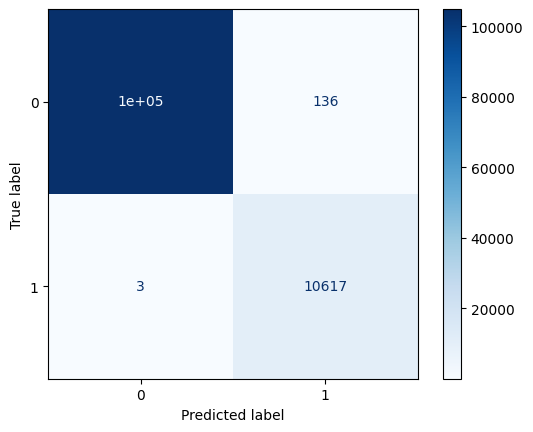

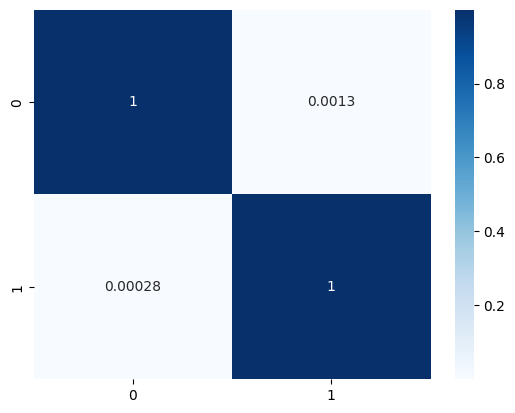

In [194]:
ngb = dp.ngboost(X_train, X_test, y_train, y_test)

ngb.fit()

The accuracy score is 0.9976302907650528
 The recall score is 0.9749357326478149
 The f1 score is 0.98726292301971
 The ROC AUC score is 0.9986529933021853

Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    105006
           1       0.97      1.00      0.99     10620

    accuracy                           1.00    115626
   macro avg       0.99      1.00      0.99    115626
weighted avg       1.00      1.00      1.00    115626


Cross validation score: [0.99687256 0.99687256 0.99530884 0.99374511 0.99061767 0.99061767
 0.99530884 0.99530884 0.99687133 0.990614  ]

Mean cross validation score: 0.9942137404393347



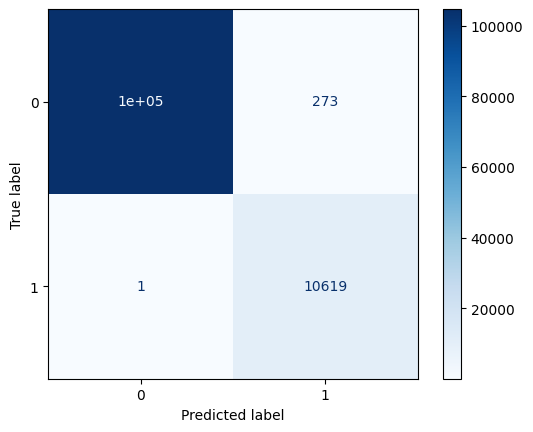

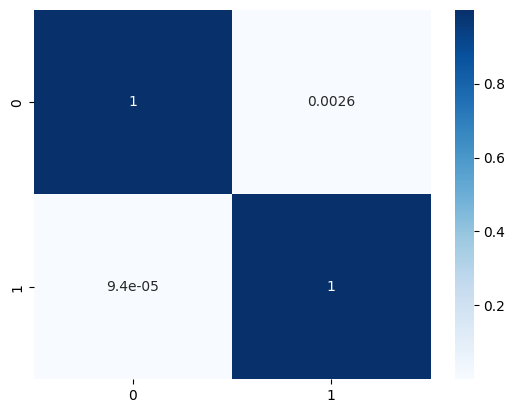

In [195]:
mlp = dp.ANN(X_train, X_test, y_train, y_test)

mlp.fit()

### Imbalanced

In [196]:
# 18 feature Columns

df= pd.read_csv('C:\\Users\\LIR3060\\Desktop\\Patricio\\NEO\\NEO\\API_test\\CSV\\neo_data_copy1.csv')
df = dp.OverallProcessor(df).clean2()
df.shape

(578127, 19)

In [197]:
# 5 feature Columns
#df = dp.OverallProcessor(df).smote()
spt = dp.scalesplit(df)

X_train, X_test, y_train, y_test = spt.ttsplitimbalance()

X_train

array([[-0.9260489 , -0.37053054, -0.43885269, ...,  0.08002784,
         0.08002784,  0.08002784],
       [ 0.38503235, -0.835229  , -0.85237111, ..., -0.23044022,
        -0.23044022, -0.23044022],
       [-0.50596085, -0.96812133, -0.10993791, ..., -0.08237192,
        -0.08237192, -0.08237192],
       ...,
       [ 0.08012974, -0.56744564,  0.60925711, ..., -0.19818311,
        -0.19818311, -0.19818311],
       [-0.28914121,  0.65282395, -0.73840767, ..., -0.13620257,
        -0.13620257, -0.13620257],
       [ 0.77463014, -0.80010776, -0.69589052, ..., -0.25626521,
        -0.25626521, -0.25626521]])

In [198]:
samplesize = 0.3


X_train, _, y_train, _, = train_test_split(X_train, y_train, train_size= samplesize, stratify=y_train, random_state=42)

print(len(X_train), len(y_train))

138750 138750


#### Models

c:\Users\LIR3060\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py:528: FitFailedWarning: 
1800 fits failed out of a total of 2880.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
166 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\LIR3060\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\LIR3060\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py", line 1382, in wrapper
    estimator._validate_params()
  File "c:\Users\LIR3060\AppData\Local\Programs\Python\Python312\Lib\site-packages\sk

Best parameters: {'C': 0.1, 'fit_intercept': True, 'n_jobs': 8, 'penalty': 'l1', 'random_state': 0, 'solver': 'liblinear', 'warm_start': True}
Best Score: 0.9667099099099101
Best Estimator: LogisticRegression(C=0.1, n_jobs=8, penalty='l1', random_state=0,
                   solver='liblinear', warm_start=True) 
The accuracy score is 0.9668240707107398
 The recall score is 0.8262793382070027
 The f1 score is 0.8174724019794443
 The ROC AUC score is 0.8958261034532222

Classification Report: 
               precision    recall  f1-score   support

           0       0.98      0.98      0.98    105006
           1       0.83      0.81      0.82     10620

    accuracy                           0.97    115626
   macro avg       0.90      0.90      0.90    115626
weighted avg       0.97      0.97      0.97    115626


Cross validation score: [0.60354597 0.58832197 0.59521198 0.61760451 0.60296324 0.58229321
 0.60985325 0.63138452 0.59348948 0.59865698]

Mean cross validation score: 0.602332

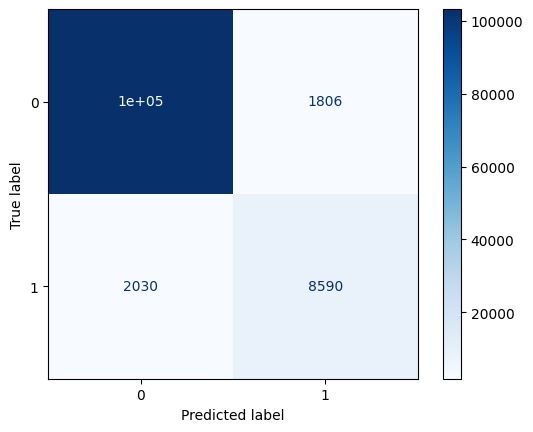

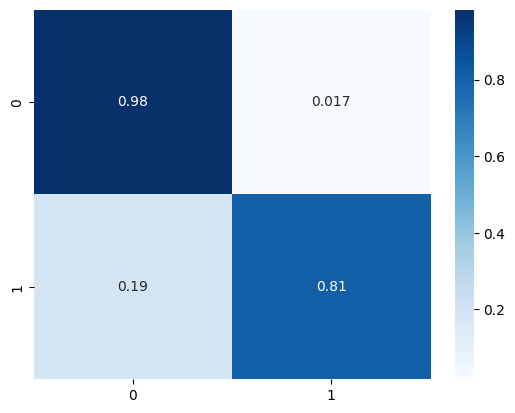

In [199]:
log_reg = dp.LogRegression(X_train, X_test, y_train, y_test)

log_reg.fit()

Fitting 5 folds for each of 270 candidates, totalling 1350 fits
Best parameters: {'alpha': 0.0001, 'eta0': 0.01, 'learning_rate': 'adaptive', 'loss': 'modified_huber', 'penalty': 'l1'}
Best Score: 0.9670198198198199
Best Estimator: SGDClassifier(eta0=0.01, learning_rate='adaptive', loss='modified_huber',
              penalty='l1', random_state=42) 
The accuracy score is 0.967135419369346
 The recall score is 0.8270042194092827
 The f1 score is 0.8194602812618776
 The ROC AUC score is 0.8974363800142279

Classification Report: 
               precision    recall  f1-score   support

           0       0.98      0.98      0.98    105006
           1       0.83      0.81      0.82     10620

    accuracy                           0.97    115626
   macro avg       0.90      0.90      0.90    115626
weighted avg       0.97      0.97      0.97    115626


Cross validation score: [0.60699339 0.58832197 0.59693448 0.61760451 0.60813074 0.58401571
 0.6141595  0.63138452 0.59004447 0.60037948]


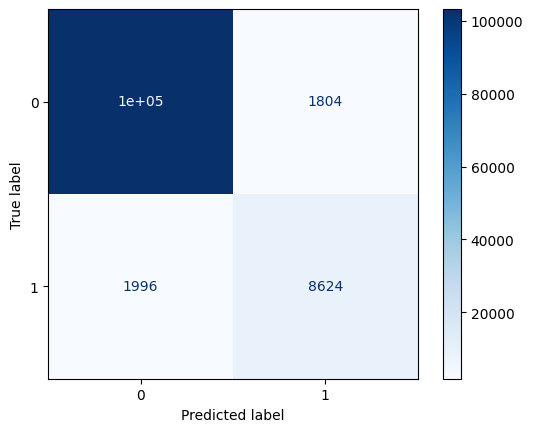

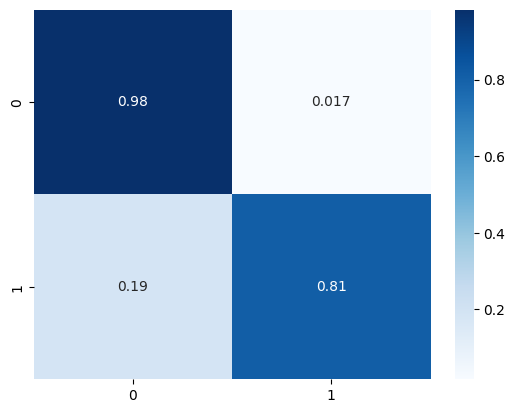

In [200]:
svm = dp.supportvm(X_train, X_test, y_train, y_test)

svm.fit()

Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters: {'bootstrap': False, 'criterion': 'entropy', 'max_features': 'sqrt'}
Best Score: 0.9999927927927927
Best Estimator: RandomForestClassifier(bootstrap=False, criterion='entropy', random_state=42) 
The accuracy score is 1.0
 The recall score is 1.0
 The f1 score is 1.0
 The ROC AUC score is 1.0

Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    105006
           1       1.00      1.00      1.00     10620

    accuracy                           1.00    115626
   macro avg       1.00      1.00      1.00    115626
weighted avg       1.00      1.00      1.00    115626


Cross validation score: [1.         1.         1.         1.         1.         1.
 1.         1.         1.         0.99913875]

Mean cross validation score: 0.9999138748888597



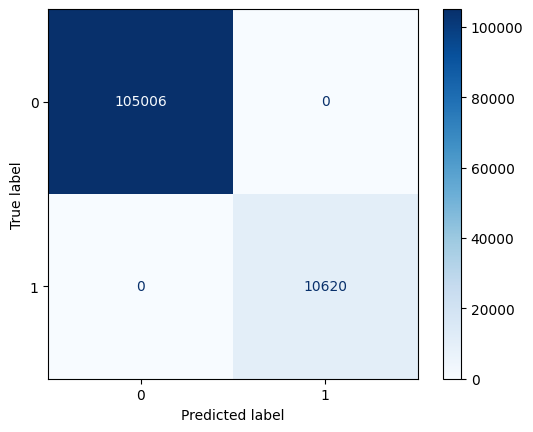

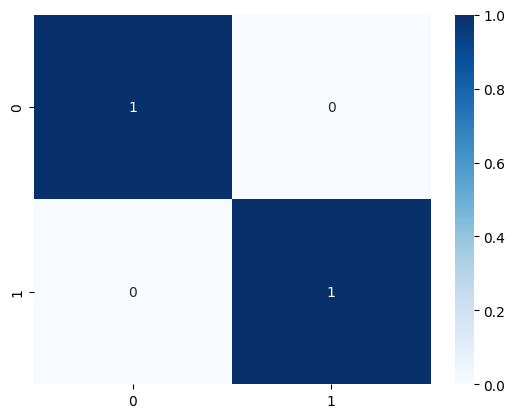

In [201]:
random_forest = dp.RandomForest(X_train, X_test, y_train, y_test)

random_forest.fit()

Fitting 5 folds for each of 243 candidates, totalling 1215 fits
Best parameters: {'gamma': 0, 'learning_rate': 0.2, 'max_depth': 3, 'min_child_weight': 1, 'n_estimators': 300}
Best Score: 0.9999927927927927
Best Estimator: XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.2, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=300, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...) 
The accuracy score is 1.0
 The 

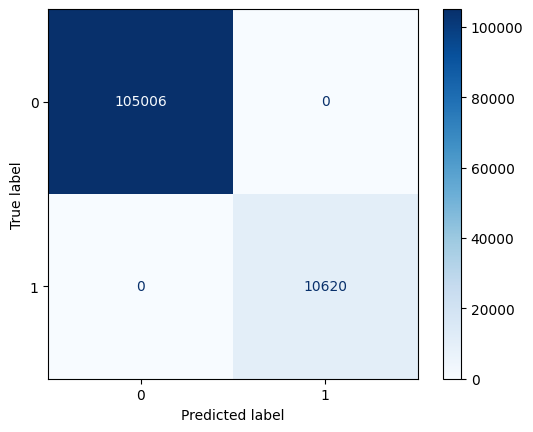

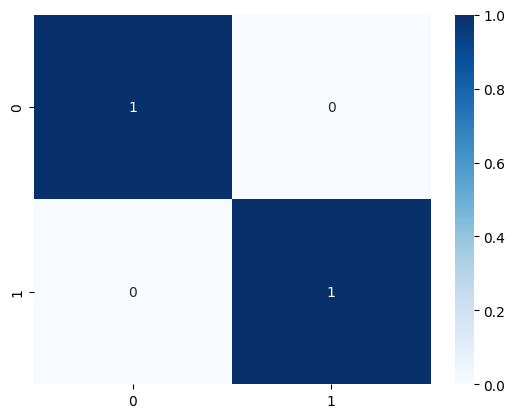

In [202]:
xgboost = dp.xgbClassifier(X_train, X_test, y_train, y_test)

xgboost.fit()

Fitting 5 folds for each of 81 candidates, totalling 405 fits
Best parameters: {'learning_rate': 0.1, 'max_depth': 5, 'max_features': None, 'n_estimators': 300}
Best Score: 0.9999927927927927
Best Estimator: GradientBoostingClassifier(max_depth=5, n_estimators=300, random_state=42) 
The accuracy score is 1.0
 The recall score is 1.0
 The f1 score is 1.0
 The ROC AUC score is 1.0

Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    105006
           1       1.00      1.00      1.00     10620

    accuracy                           1.00    115626
   macro avg       1.00      1.00      1.00    115626
weighted avg       1.00      1.00      1.00    115626


Cross validation score: [1.         1.         1.         1.         1.         1.
 1.         1.         1.         0.99913875]

Mean cross validation score: 0.9999138748888597



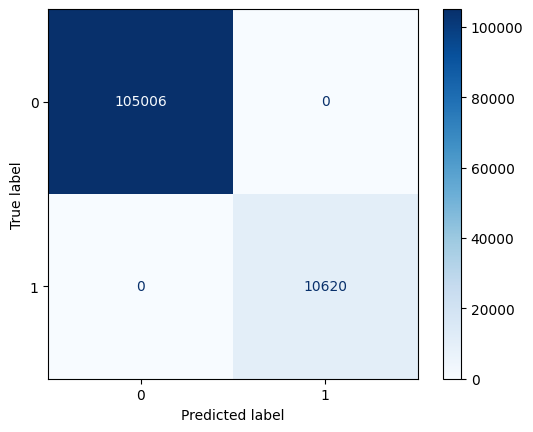

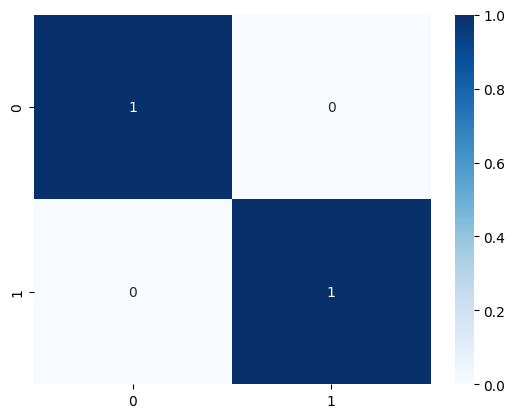

In [203]:
gb = dp.GradientBoost(X_train, X_test, y_train, y_test)

gb.fit()

Fitting 5 folds for each of 24 candidates, totalling 120 fits


c:\Users\LIR3060\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py:528: FitFailedWarning: 
60 fits failed out of a total of 120.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
60 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\LIR3060\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\LIR3060\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py", line 1382, in wrapper
    estimator._validate_params()
  File "c:\Users\LIR3060\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklear

Best parameters: {'algorithm': 'SAMME', 'learning_rate': 0.01, 'n_estimators': 50}
Best Score: 0.9999783783783783
Best Estimator: AdaBoostClassifier(algorithm='SAMME',
                   estimator=RandomForestClassifier(class_weight='balanced_subsample',
                                                    criterion='entropy',
                                                    random_state=42),
                   learning_rate=0.01, random_state=42) 


c:\Users\LIR3060\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The parameter 'algorithm' is deprecated in 1.6 and has no effect. It will be removed in version 1.8.
  warnings.warn(


The accuracy score is 1.0
 The recall score is 1.0
 The f1 score is 1.0
 The ROC AUC score is 1.0

Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    105006
           1       1.00      1.00      1.00     10620

    accuracy                           1.00    115626
   macro avg       1.00      1.00      1.00    115626
weighted avg       1.00      1.00      1.00    115626




c:\Users\LIR3060\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The parameter 'algorithm' is deprecated in 1.6 and has no effect. It will be removed in version 1.8.
  warnings.warn(
c:\Users\LIR3060\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The parameter 'algorithm' is deprecated in 1.6 and has no effect. It will be removed in version 1.8.
  warnings.warn(
c:\Users\LIR3060\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The parameter 'algorithm' is deprecated in 1.6 and has no effect. It will be removed in version 1.8.
  warnings.warn(
c:\Users\LIR3060\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The parameter 'algorithm' is deprecated in 1.6 and has no effect. It will be removed in version 1.8.
  warnings.warn(


Cross validation score: [1.         1.         1.         1.         1.         1.
 1.         1.         1.         0.99913875]

Mean cross validation score: 0.9999138748888597



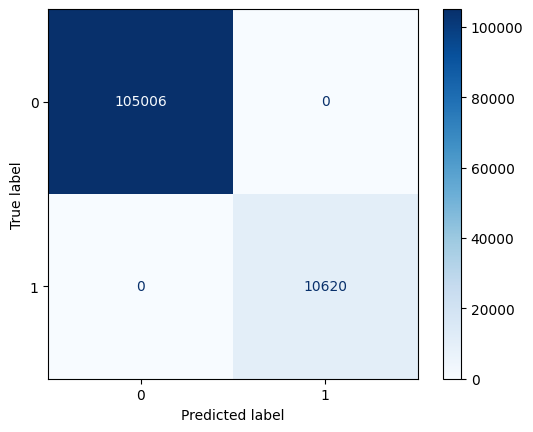

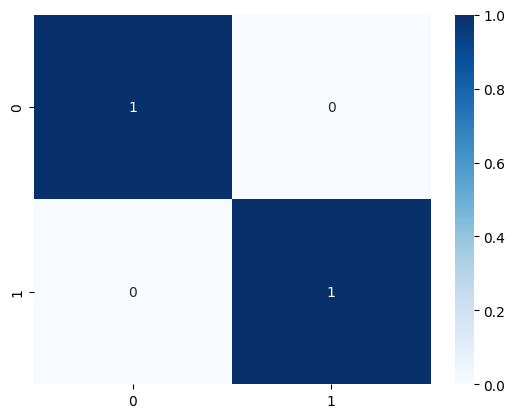

In [204]:
ada = dp.AdaBoost(X_train, X_test, y_train, y_test)

ada.fit()

Fitting 5 folds for each of 81 candidates, totalling 405 fits


c:\Users\LIR3060\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py:528: FitFailedWarning: 
297 fits failed out of a total of 405.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
297 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\LIR3060\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\LIR3060\AppData\Local\Programs\Python\Python312\Lib\site-packages\ngboost\ngboost.py", line 254, in fit
    return self.partial_fit(
           ^^^^^^^^^^^^^^^^^
  File "c:\Users\LIR3060\AppData\Local\Programs\Python\Python312

[iter 0] loss=0.3075 val_loss=0.0000 scale=16.0000 norm=32.0000
[iter 100] loss=0.0027 val_loss=0.0000 scale=0.2500 norm=0.2517
[iter 200] loss=0.0027 val_loss=0.0000 scale=0.1250 norm=0.1259
Best parameters: {'learning_rate': 0.01, 'max_depth': 3, 'minibatch_frac': 1.0, 'n_estimators': 300}
Best Score: 0.002739601493084212
Best Estimator: NGBClassifier(n_estimators=300,
              random_state=RandomState(MT19937) at 0x132F1050140) 


c:\Users\LIR3060\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[iter 0] loss=0.3075 val_loss=0.0000 scale=16.0000 norm=32.0000
[iter 100] loss=0.0027 val_loss=0.0000 scale=0.2500 norm=0.2517
[iter 200] loss=0.0027 val_loss=0.0000 scale=0.1250 norm=0.1259


c:\Users\LIR3060\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\LIR3060\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


The accuracy score is 0.9991091968934322
 The recall score is 0.9929689697196963
 The f1 score is 0.995161366091981
 The ROC AUC score is 0.9983246101298919

Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    105006
           1       0.99      1.00      1.00     10620

    accuracy                           1.00    115626
   macro avg       1.00      1.00      1.00    115626
weighted avg       1.00      1.00      1.00    115626




c:\Users\LIR3060\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[iter 0] loss=0.3076 val_loss=0.0000 scale=16.0000 norm=32.0000


c:\Users\LIR3060\AppData\Local\Programs\Python\Python312\Lib\site-packages\ngboost\distns\categorical.py:12: RuntimeWarning: divide by zero encountered in log
  return -np.log(self.probs[Y, range(len(Y))])


[iter 100] loss=0.0027 val_loss=0.0000 scale=0.0001 norm=0.0001
[iter 200] loss=0.0027 val_loss=0.0000 scale=0.0001 norm=0.0001


c:\Users\LIR3060\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\LIR3060\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\LIR3060\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[iter 0] loss=0.3075 val_loss=0.0000 scale=16.0000 norm=32.0000
[iter 100] loss=0.0028 val_loss=0.0000 scale=0.2500 norm=0.2517
[iter 200] loss=0.0028 val_loss=0.0000 scale=0.5000 norm=0.5034


c:\Users\LIR3060\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\LIR3060\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\LIR3060\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[iter 0] loss=0.3075 val_loss=0.0000 scale=16.0000 norm=32.0000
[iter 100] loss=0.0024 val_loss=0.0000 scale=0.2500 norm=0.2516
[iter 200] loss=0.0024 val_loss=0.0000 scale=0.1250 norm=0.1258


c:\Users\LIR3060\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\LIR3060\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\LIR3060\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[iter 0] loss=0.3075 val_loss=0.0000 scale=16.0000 norm=32.0000
[iter 100] loss=0.0027 val_loss=0.0000 scale=1.0000 norm=1.0069
[iter 200] loss=0.0027 val_loss=0.0000 scale=0.2500 norm=0.2517


c:\Users\LIR3060\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\LIR3060\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\LIR3060\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[iter 0] loss=0.3075 val_loss=0.0000 scale=16.0000 norm=32.0000
[iter 100] loss=0.0027 val_loss=0.0000 scale=0.5000 norm=0.5035
[iter 200] loss=0.0027 val_loss=0.0000 scale=0.2500 norm=0.2517


c:\Users\LIR3060\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\LIR3060\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\LIR3060\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[iter 0] loss=0.3075 val_loss=0.0000 scale=16.0000 norm=32.0000


c:\Users\LIR3060\AppData\Local\Programs\Python\Python312\Lib\site-packages\ngboost\distns\categorical.py:12: RuntimeWarning: divide by zero encountered in log
  return -np.log(self.probs[Y, range(len(Y))])


[iter 100] loss=0.0025 val_loss=0.0000 scale=0.0001 norm=0.0001
[iter 200] loss=0.0025 val_loss=0.0000 scale=0.0001 norm=0.0001


c:\Users\LIR3060\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\LIR3060\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\LIR3060\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[iter 0] loss=0.3075 val_loss=0.0000 scale=16.0000 norm=32.0000
[iter 100] loss=0.0027 val_loss=0.0000 scale=1.0000 norm=1.0069
[iter 200] loss=0.0027 val_loss=0.0000 scale=0.5000 norm=0.5034


c:\Users\LIR3060\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\LIR3060\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\LIR3060\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[iter 0] loss=0.3075 val_loss=0.0000 scale=32.0000 norm=64.0000
[iter 100] loss=0.0026 val_loss=0.0000 scale=0.0001 norm=0.0001
[iter 200] loss=0.0026 val_loss=0.0000 scale=0.0001 norm=0.0001


c:\Users\LIR3060\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\LIR3060\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\LIR3060\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[iter 0] loss=0.3075 val_loss=0.0000 scale=16.0000 norm=32.0000


c:\Users\LIR3060\AppData\Local\Programs\Python\Python312\Lib\site-packages\ngboost\distns\categorical.py:12: RuntimeWarning: divide by zero encountered in log
  return -np.log(self.probs[Y, range(len(Y))])


[iter 100] loss=0.0025 val_loss=0.0000 scale=4.0000 norm=4.0255
[iter 200] loss=0.0025 val_loss=0.0000 scale=2.0000 norm=2.0128


c:\Users\LIR3060\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\LIR3060\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\LIR3060\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[iter 0] loss=0.3075 val_loss=0.0000 scale=16.0000 norm=32.0000
[iter 100] loss=0.0024 val_loss=0.0000 scale=8.0000 norm=8.0507
[iter 200] loss=0.0024 val_loss=0.0000 scale=4.0000 norm=4.0253


c:\Users\LIR3060\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\LIR3060\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Cross validation score: [0.98965772 0.99052624 0.98966499 0.98966499 0.99052624 0.98277498
 0.98880374 0.97588497 0.99569374 0.99052624]

Mean cross validation score: 0.9883723834172313



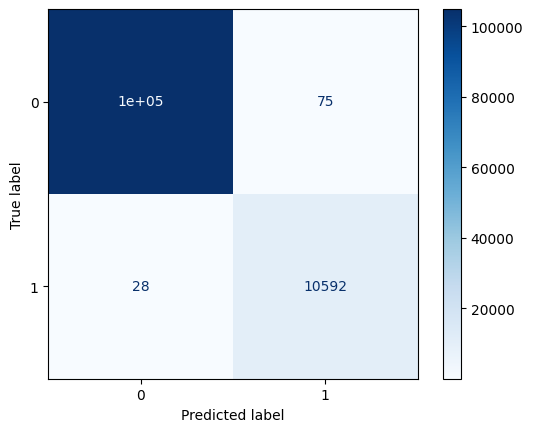

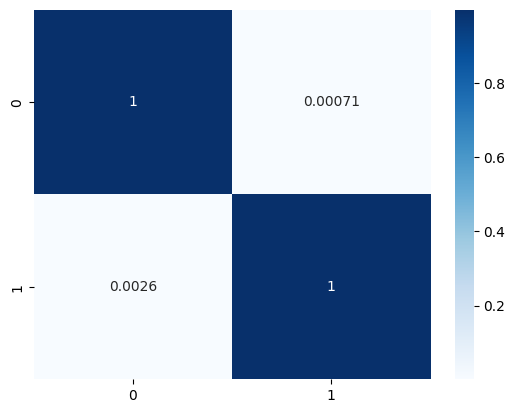

In [205]:
ngb = dp.ngboost(X_train, X_test, y_train, y_test)

ngb.fit()

The accuracy score is 0.9998875685399478
 The recall score is 0.9997173278055216
 The f1 score is 0.99938774549051
 The ROC AUC score is 0.9995149053091505

Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    105006
           1       1.00      1.00      1.00     10620

    accuracy                           1.00    115626
   macro avg       1.00      1.00      1.00    115626
weighted avg       1.00      1.00      1.00    115626


Cross validation score: [0.99741443 0.99741625 0.9982775  1.         0.9982775  0.99913875
 0.996555   0.99483249 0.996555   0.9982775 ]

Mean cross validation score: 0.9976744403545041



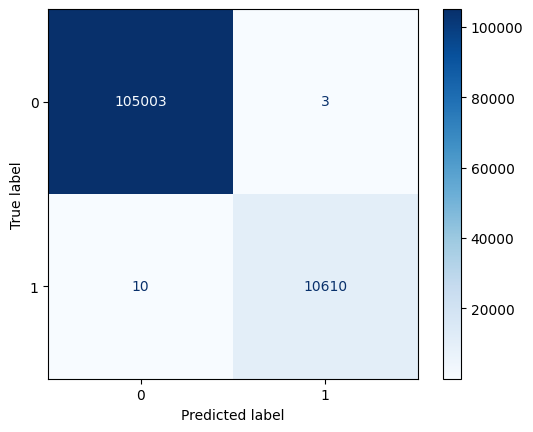

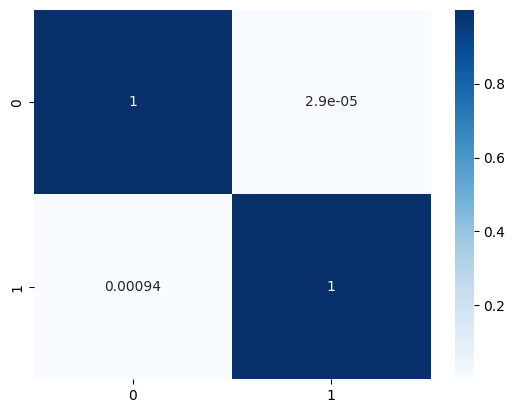

In [206]:
mlp = dp.ANN(X_train, X_test, y_train, y_test)

mlp.fit()